# __Budget Optimization: Market Mix Modelling for E-Commerce Client__

<font color="blue">The objective of this project is to create a market mix model for 3 product sub-categories - Camera accessory, Gaming accessory and Home Audio - to observe the actual impact of various marketing variables over one year (July 2015 to June 2016) and recommend the optimal budget allocation for different marketing levers for the next year.</font>

__Section A will have Data Reading, Data Understanding, Cleaning Data, Feature Engineering, Extracting Merging dataframes and EDA/Visualization__<br>
__Section B will have model building, comparison, evaluation, best fit equation and recommendations__<br>

## __Section A: Data Reading, Data Understanding, Cleaning Data, Feature Engineering, Extracting Merging dataframes and EDA/Visualization.__

## <span style="color:brown">Importing Libraries and Display Setting</span></strong>

In [508]:
# import require libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
import calendar
import datetime
import re

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#suppress warnings
import warnings
warnings.filterwarnings("ignore")

#Environment settings
pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

## <span style="color:brown">Read Data - Part 1</span></strong>

In [509]:
consumer_df = pd.read_csv('ConsumerElectronics.csv')

In [510]:
consumer_df.head()

fsn_id           order_date  Year  Month             order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10 3419300926147000.000   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10 1420830839915200.000   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10 2421912925714800.000   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10 4416592101738400.000   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10 4419525153426400.000   

         order_item_id   gmv  units deliverybdays deliverycdays  \
0 3419300926147000.000  6400      1            \N            \N   
1 1420830839915200.000  6900      1            \N            \N   
2 2421912925714800.000  1990      1            \N            \N   
3 4416592101738400.000  1690      1            \N            \N   
4 4419525153426400.000  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

__Looking at the first few rows, its evident lot of data cleaning will be required which will be done in next steps__

## <span style="color:brown">Understand & Clean Data</span></strong>

In [511]:
consumer_df.shape

(1648824, 20)

<font color="blue">consumer_df has 1648824 rows and 20 columns</font>

In [512]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

### Fix Data Types

order_date, Year, Month, order_id, order_item_id - needs to be corrected

In [513]:
# Float to Datetime

consumer_df[['order_id', 'order_item_id']] = consumer_df[['order_id', 'order_item_id']].astype(object)

In [514]:
# Integer to String

consumer_df[['Year','Month']] = consumer_df[['Year','Month']].astype(str)

In [515]:
# Object to Datetime

consumer_df['order_date'] =  pd.to_datetime(consumer_df['order_date'], format='%Y-%m-%d %H:%M:%S')

In [516]:
# String to int

consumer_df['gmv'] = pd.to_numeric(consumer_df['gmv'], errors='coerce')

### Handling Incorrect Values

<font color="blue">Imputing "\N" value in deliverybdays & deliverycdays by 0</font>

In [517]:
# Replace "\N" with 0 in 'deliverybdays' and 'deliverycdays' columns
consumer_df['deliverybdays'] = consumer_df['deliverybdays'].replace(r'\\N', 0, regex=True)
consumer_df['deliverycdays'] = consumer_df['deliverycdays'].replace(r'\\N', 0, regex=True)

# Convert columns to numeric
consumer_df['deliverybdays'] = pd.to_numeric(consumer_df['deliverybdays'])
consumer_df['deliverycdays'] = pd.to_numeric(consumer_df['deliverycdays'])

In [518]:
consumer_df.head()

fsn_id          order_date  Year Month             order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015    10 3419300926147000.000   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015    10 1420830839915200.000   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015    10 2421912925714800.000   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015    10 4416592101738400.000   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015    10 4419525153426400.000   

         order_item_id      gmv  units  deliverybdays  deliverycdays  \
0 3419300926147000.000 6400.000      1              0              0   
1 1420830839915200.000 6900.000      1              0              0   
2 2421912925714800.000 1990.000      1              0              0   
3 4416592101738400.000 1690.000      1              0              0   
4 4419525153426400.000 1618.000      1              0              0   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [519]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   fsn_id                           1648824 non-null  object        
 1   order_date                       1648824 non-null  datetime64[ns]
 2   Year                             1648824 non-null  object        
 3   Month                            1648824 non-null  object        
 4   order_id                         1648824 non-null  object        
 5   order_item_id                    1648824 non-null  object        
 6   gmv                              1643920 non-null  float64       
 7   units                            1648824 non-null  int64         
 8   deliverybdays                    1648824 non-null  int64         
 9   deliverycdays                    1648824 non-null  int64         
 10  s1_fact.order_payment_type    

In [520]:
consumer_df.nunique().sort_values()

product_analytic_super_category          1
Year                                     2
s1_fact.order_payment_type               2
product_analytic_category                5
Month                                   12
product_analytic_sub_category           14
product_procurement_sla                 17
units                                   27
sla                                     60
product_analytic_vertical               74
deliverybdays                          142
deliverycdays                          170
product_mrp                           1929
gmv                                  12523
pincode                              12973
fsn_id                               21219
order_date                         1155192
cust_id                            1253495
order_item_id                      1480765
order_id                           1501177
dtype: int64

### Handling Incorrect Values

#### Treating incorrect GMV values (where gmv > product-mrp * units) by imputing the faulty MRP values with GMV units

In [521]:
# Instances where GMV values are greater than MRP * units which is incorrect
incorrect_gmv_mask = consumer_df['product_mrp'] * consumer_df['units'] < consumer_df['gmv']
incorrect_gmv_df = consumer_df[incorrect_gmv_mask][['gmv', 'product_mrp', 'units']]

incorrect_gmv_count = incorrect_gmv_df.shape[0]
total_rows = consumer_df.shape[0]

incorrect_gmv_percentage = (incorrect_gmv_count / total_rows) * 100

print("Incorrect GMV Count:", incorrect_gmv_count)
print("Incorrect GMV Percentage:", round(incorrect_gmv_percentage, 2), "%")
print("\nFirst 5 rows of Incorrect GMV DataFrame:")
print(incorrect_gmv_df.head())

Incorrect GMV Count: 38569
Incorrect GMV Percentage: 2.34 %

First 5 rows of Incorrect GMV DataFrame:
          gmv  product_mrp  units
511 38839.000        34980      1
512 30155.000        24696      1
818   450.000          405      1
819   900.000          405      2
820   380.000          285      1


<font color="blue">
- Clearly you can see the cases where gmv > product of product_mrp & units <br> 
- Incorrect GMV Count: 38569 <br>
- Incorrect GMV Percentage: 2.34 %
</font>

__If the product_mrp value is less than gmv/units then lets update the product_mrp value with gmv/units. This will ensure that the 'product_mrp' values do not exceed the calculated value based on the given GMV and units.__ 

In [522]:
# imputing the faulty product_mrp values with gmv/units
# Update the 'product_mrp' column based on conditions

consumer_df['product_mrp'] = np.where(
    consumer_df['product_mrp'] < consumer_df['gmv'] / consumer_df['units'],
    consumer_df['gmv'] / consumer_df['units'],
    consumer_df['product_mrp']
)

Lets check if the imputation is successful

In [523]:
# Instances where GMV values are greater than MRP * units which is incorrect
incorrect_gmv_mask = consumer_df['product_mrp'] * consumer_df['units'] < consumer_df['gmv']
incorrect_gmv_df = consumer_df[incorrect_gmv_mask][['gmv', 'product_mrp', 'units']]

incorrect_gmv_count = incorrect_gmv_df.shape[0]
total_rows = consumer_df.shape[0]

incorrect_gmv_percentage = (incorrect_gmv_count / total_rows) * 100

print("Incorrect GMV Count:", incorrect_gmv_count)
print("Incorrect GMV Percentage:", round(incorrect_gmv_percentage, 2), "%")

Incorrect GMV Count: 0
Incorrect GMV Percentage: 0.0 %


<font color="blue"> - Imputation was successfull </font>

#### Checking for values that are gmv < 0, product_mrp < 0, units <= 0

In [524]:
print(consumer_df.loc[consumer_df['gmv'] < 0].shape[0])

0


In [525]:
print(consumer_df.loc[consumer_df['product_mrp'] < 0].shape[0])

0


In [526]:
print(consumer_df.loc[consumer_df['units'] <= 0].shape[0])

0


<font color="blue"> There are no invalid values </font>

#### Quick understanding of neagtive values in the dataframe

In [527]:
consumer_df.describe()

gmv       units  deliverybdays  deliverycdays         sla  \
count 1643920.000 1648824.000    1648824.000    1648824.000 1648824.000   
mean     2461.124       1.022          0.932          1.069       5.688   
std      5618.842       0.254          2.393          6.034       2.983   
min         0.000       1.000        -98.000      -5345.000       0.000   
25%       340.000       1.000          0.000          0.000       4.000   
50%       750.000       1.000          0.000          0.000       6.000   
75%      1999.000       1.000          0.000          0.000       7.000   
max    226947.000      50.000        238.000        278.000    1006.000   

       product_mrp  product_procurement_sla  
count  1648824.000              1648824.000  
mean      4126.594                    5.403  
std       8528.211                   53.466  
min          0.000                   -1.000  
25%        799.000                    1.000  
50%       1599.000                    2.000  
75%       3499.000                    3.000  
max     299999.000                 1000.000

<font color="blue"> There are negative values in df for deliverybdays, deliverycdays, product_procurement_sla <br>
This does not make sense and lets check them in detail for appropriate treatment<br>
Also NOTE that the max value for product_prodcurement_sla is very high. We will come to that after first treating the neg values
</font>

#### Handling Negative values for product_procurement_sla

In [528]:
# Calculate the count and percentage of rows where product_procurement_sla is less than 0
neg_prd_proc_sla_count = consumer_df.loc[consumer_df['product_procurement_sla'] < 0].shape[0]
total_rows = consumer_df.shape[0]

neg_prd_proc_sla_percentage = (neg_prd_proc_sla_count / total_rows) * 100

print("neg_prd_proc_sla Count:", neg_prd_proc_sla_count)
print("neg_prd_proc_sla Percentage:", round(neg_prd_proc_sla_percentage, 2), "%")


neg_prd_proc_sla Count: 75986
neg_prd_proc_sla Percentage: 4.61 %


<font color="blue"> 
- neg_prd_proc_sla Count: 75986 <br>
- neg_prd_proc_sla Percentage: 4.61 % <br>
- Lets drop the rows with negative values as they do not make business sense
</font>

In [529]:
# Dropping the negative valies from product_procurement_sla

consumer_df = consumer_df.loc[(consumer_df['product_procurement_sla'] >= 0)]
consumer_df.reset_index(drop=True, inplace=True)

#### Handling Negative values for deliverybdays, deliverycdays

In [530]:
# Calculate the count and percentage of rows where deliverybdays is less than 0
neg_deliverybdays_count = consumer_df.loc[consumer_df['deliverybdays'] < 0].shape[0]
total_rows = consumer_df.shape[0]

neg_deliverybdays_percentage = (neg_deliverybdays_count / total_rows) * 100

print("neg_deliverybdays Count:", neg_deliverybdays_count)
print("neg_deliverybdays Percentage:", round(neg_deliverybdays_percentage, 2), "%")


neg_deliverybdays Count: 38
neg_deliverybdays Percentage: 0.0 %


<font color="blue"> 
- neg_deliverybdays Count: 38 <br>
- Lets drop the rows with negative values as they do not make business sense
</font>

In [531]:
# Calculate the count and percentage of rows where deliverycdays is less than 0
neg_deliverycdays_count = consumer_df.loc[consumer_df['deliverycdays'] < 0].shape[0]
total_rows = consumer_df.shape[0]

neg_deliverycdays_percentage = (neg_deliverycdays_count / total_rows) * 100

print("neg_deliverycdays Count:", neg_deliverycdays_count)
print("neg_deliverycdays Percentage:", round(neg_deliverycdays_percentage, 2), "%")


neg_deliverycdays Count: 39
neg_deliverycdays Percentage: 0.0 %


<font color="blue"> 
- neg_deliverycdays Count: 39 <br>
- Lets drop the rows with negative values as they do not make business sense
</font>

__Negative number of business & calendar days between the placement of the order and the final delivery day does not make sense. They will be dropped.__

In [532]:
# Dropping neg values for deliverybdays and deliverycdays

consumer_df = consumer_df.loc[(consumer_df['deliverybdays'] >= 0) & (consumer_df['deliverycdays'] >= 0)]
consumer_df.reset_index(drop=True, inplace=True)

In [533]:
consumer_df.shape

(1572799, 20)

#### Investigating the high value in product_procurement_sla for appropriate treatment

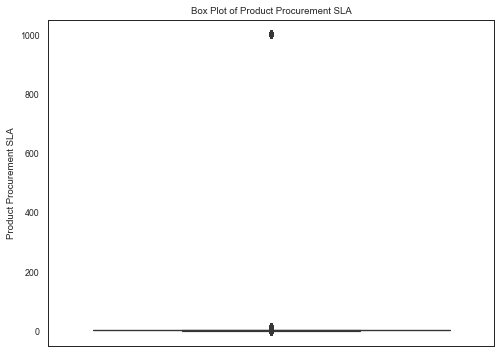

In [534]:
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create a box plot
sns.boxplot(data=consumer_df, y='product_procurement_sla')

# Add labels and title
plt.ylabel('Product Procurement SLA')
plt.title('Box Plot of Product Procurement SLA')

# Show the box plot
plt.show()

In [535]:
consumer_df.product_procurement_sla.unique()

array([   0,    3,    5,    1,    6,    2,    7,    4,   13,   14,   10,
          9,   12,    8,   15, 1000], dtype=int64)

__A value of 1000 for time typically taken to procure the product does not make sense.__

Lets find the count and % of such cases

In [536]:
# Calculate the count and percentage of rows where product_procurement_sla is greater than 1000
large_product_procurement_sla_count = consumer_df.loc[consumer_df['product_procurement_sla'] >= 1000].shape[0]
total_rows = consumer_df.shape[0]

large_product_procurement_sla_percentage = (large_product_procurement_sla_count / total_rows) * 100

print("large_product_procurement_sla Count:", large_product_procurement_sla_count)
print("large_product_procurement_sla Percentage:", round(large_product_procurement_sla_percentage, 2), "%")

large_product_procurement_sla Count: 4745
large_product_procurement_sla Percentage: 0.3 %


<font color="blue"> There are 0.3% records with SLA greater than 1000. All such records will be dropped.</font>

In [537]:
#Retaining rows where the sla is less than 1000

consumer_df = consumer_df.loc[(consumer_df['product_procurement_sla'] < 1000)]

Lets re run and check if records >= 1000 have been dropped.

In [538]:
# Calculate the count and percentage of rows where product_procurement_sla is greater than 1000
large_product_procurement_sla_count = consumer_df.loc[consumer_df['product_procurement_sla'] >= 1000].shape[0]
total_rows = consumer_df.shape[0]

large_product_procurement_sla_percentage = (large_product_procurement_sla_count / total_rows) * 100

print("large_product_procurement_sla Count:", large_product_procurement_sla_count)
print("large_product_procurement_sla Percentage:", round(large_product_procurement_sla_percentage, 2), "%")

large_product_procurement_sla Count: 0
large_product_procurement_sla Percentage: 0.0 %


All records > = 1000 have been successfully dropped.

In [539]:
consumer_df.shape

(1568054, 20)

consumer_df now has 1568054 rows and 20 columns

In [540]:
print(list(consumer_df.columns))

['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'deliverybdays', 'deliverycdays', 's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode', 'product_analytic_super_category', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_mrp', 'product_procurement_sla']


In [541]:
consumer_df.head()

fsn_id          order_date  Year Month             order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015    10 3419300926147000.000   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015    10 1420830839915200.000   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015    10 2421912925714800.000   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015    10 4416592101738400.000   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015    10 4419525153426400.000   

         order_item_id      gmv  units  deliverybdays  deliverycdays  \
0 3419300926147000.000 6400.000      1              0              0   
1 1420830839915200.000 6900.000      1              0              0   
2 2421912925714800.000 1990.000      1              0              0   
3 4416592101738400.000 1690.000      1              0              0   
4 4419525153426400.000 1618.000      1              0              0   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod     7190.000                        0  
1              CameraTripod     7190.000                        0  
2              CameraTripod     2099.000                        3  
3              CameraTripod     2099.000                        3  
4              CameraTripod     2099.000                        3

#### Converting all the string values in columns to lower case

In [542]:
# Convert all string values to lowercase
consumer_df = consumer_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [543]:
consumer_df.head()

fsn_id          order_date  Year Month             order_id  \
0  acccx3s58g7b5f6p 2015-10-17 15:11:54  2015    10 3419300926147000.000   
1  acccx3s58g7b5f6p 2015-10-19 10:07:22  2015    10 1420830839915200.000   
2  acccx3s5ahmf55fv 2015-10-20 15:45:56  2015    10 2421912925714800.000   
3  acccx3s5ahmf55fv 2015-10-14 12:05:15  2015    10 4416592101738400.000   
4  acccx3s5ahmf55fv 2015-10-17 21:25:03  2015    10 4419525153426400.000   

         order_item_id      gmv  units  deliverybdays  deliverycdays  \
0 3419300926147000.000 6400.000      1              0              0   
1 1420830839915200.000 6900.000      1              0              0   
2 2421912925714800.000 1990.000      1              0              0   
3 4416592101738400.000 1690.000      1              0              0   
4 4419525153426400.000 1618.000      1              0              0   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        cod    5  -1.01299130778588e+018   
1                        cod    7  -8.99032457905512e+018   
2                        cod   10   -1.0404429420466e+018   
3                    prepaid    4  -7.60496084352714e+018   
4                    prepaid    6    2.8945572083453e+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735e+018                              ce   
1   7.33541149097431e+018                              ce   
2  -7.47768776228657e+018                              ce   
3  -5.83593163877661e+018                              ce   
4   5.34735360997242e+017                              ce   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   
2           cameraaccessory               cameraaccessory   
3           cameraaccessory               cameraaccessory   
4           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              cameratripod     7190.000                        0  
1              cameratripod     7190.000                        0  
2              cameratripod     2099.000                        3  
3              cameratripod     2099.000                        3  
4              cameratripod     2099.000                        3

### Check for Duplicate rows & Drop if found

In [544]:
# Count and percentage of duplicate rows
duplicate_count = consumer_df.duplicated().sum()
total_rows = consumer_df.shape[0]
duplicate_percentage = (duplicate_count / total_rows) * 100

print("Duplicate Rows Count:", duplicate_count)
print("Duplicate Rows Percentage:", round(duplicate_percentage, 2), "%")

Duplicate Rows Count: 99283
Duplicate Rows Percentage: 6.33 %


<font color="blue"> There are 99283 rows with duplicate values amounting to 6.33%. </font>

In [545]:
# Drop duplicates and keep the first occurance

consumer_df.drop_duplicates(keep='first', inplace=True)

In [546]:
consumer_df.shape

(1468771, 20)

<font color="blue"> Post dropping duplicate rows the df is left with 1468771 rows and 20 columns </font>

### Check for Null values and white spaces

In [547]:
# Count whitespace and null values in the DataFrame

whitespace_count = (consumer_df.applymap(lambda x: isinstance(x, str) and x.isspace())).sum().sum()
null_count = consumer_df.isnull().sum().sum()

print("Whitespace Count:", whitespace_count)
print("Null Value Count:", null_count)

Whitespace Count: 7410
Null Value Count: 3705


<font color="blue"> There are 7410 white spaces & 3705 Nulls. Lets find out which columns have them by modifying the above code. </font>

In [548]:
# Count whitespace and null values in each column
whitespace_counts = (consumer_df.applymap(lambda x: isinstance(x, str) and x.isspace())).sum()
null_counts = consumer_df.isnull().sum()

# Print columns with whitespace or null values
for column in consumer_df.columns:
    if whitespace_counts[column] > 0 or null_counts[column] > 0:
        print("Column:", column)
        print("Whitespace Count:", whitespace_counts[column])
        print("Null Value Count:", null_counts[column])
        print("=" * 40)

Column: gmv
Whitespace Count: 0
Null Value Count: 3705
Column: cust_id
Whitespace Count: 3705
Null Value Count: 0
Column: pincode
Whitespace Count: 3705
Null Value Count: 0


__Converting white spaces into NaNs__

In [549]:
# convert white spaces into NaNs
consumer_df.replace(' ', np.nan, inplace=True)

In [550]:
# Count whitespace and null values in each column
whitespace_counts = (consumer_df.applymap(lambda x: isinstance(x, str) and x.isspace())).sum()
null_counts = consumer_df.isnull().sum()

# Print columns with whitespace or null values
for column in consumer_df.columns:
    if whitespace_counts[column] > 0 or null_counts[column] > 0:
        print("Column:", column)
        print("Whitespace Count:", whitespace_counts[column])
        print("Null Value Count:", null_counts[column])
        print("=" * 40)

Column: gmv
Whitespace Count: 0
Null Value Count: 3705
Column: cust_id
Whitespace Count: 0
Null Value Count: 3705
Column: pincode
Whitespace Count: 0
Null Value Count: 3705


__Dropping Null values__

In [551]:
consumer_df = consumer_df[~pd.isnull(consumer_df['gmv'])]

Re run the code to check if dropping was successfull

In [552]:
# Count whitespace and null values in each column
whitespace_counts = (consumer_df.applymap(lambda x: isinstance(x, str) and x.isspace())).sum()
null_counts = consumer_df.isnull().sum()

# Print columns with whitespace or null values
for column in consumer_df.columns:
    if whitespace_counts[column] > 0 or null_counts[column] > 0:
        print("Column:", column)
        print("Whitespace Count:", whitespace_counts[column])
        print("Null Value Count:", null_counts[column])
        print("=" * 40)

<font color="blue"> Since there is no output, it means there are no more null values and we can continue to next steps. </font>

### Dropping Insignificant Columns

__- Dropping Columns with Single Unique Value (as it does not add any value to the project analysis/objective)__<br>
__- Dropping some of the ID columns which are also not useful__

In [553]:
consumer_df.nunique().sort_values()

product_analytic_super_category          1
Year                                     2
s1_fact.order_payment_type               2
product_analytic_category                5
Month                                   12
product_analytic_sub_category           14
product_procurement_sla                 15
units                                   27
sla                                     55
product_analytic_vertical               73
deliverybdays                          118
deliverycdays                          133
product_mrp                           2760
gmv                                  11827
pincode                              12879
fsn_id                               20617
order_date                         1111313
cust_id                            1199713
order_item_id                      1407064
order_id                           1426574
dtype: int64

In [554]:
# Drop the 'product_analytic_super_category' column
consumer_df.drop('product_analytic_super_category', axis=1, inplace=True)

In [555]:
consumer_df.shape

(1465066, 19)

In [556]:
# Dropping ID Columns which are not useful

drop_cols = ['fsn_id', 'order_id', 'order_item_id', 'cust_id']
consumer_df.drop(drop_cols, axis=1, inplace=True)

In [557]:
consumer_df.shape

(1465066, 15)

<font color="blue"> The dataframe is now left with 1465066 rows with 15 columns. </font>

### Preparing dataframe for one year data and week column as per business requirement

#### Carving out data for 1 year

__The business objective is to analyse the impact of variables over one year (July 2015 to June 2016)__ <br>
__So, we will remove all the data which is lying outside the required data range__

In [558]:
# Confirming if the order_date is with correct dtype
consumer_df.dtypes

order_date                       datetime64[ns]
Year                                     object
Month                                    object
gmv                                     float64
units                                     int64
deliverybdays                             int64
deliverycdays                             int64
s1_fact.order_payment_type               object
sla                                       int64
pincode                                  object
product_analytic_category                object
product_analytic_sub_category            object
product_analytic_vertical                object
product_mrp                             float64
product_procurement_sla                   int64
dtype: object

In [559]:
# Define the analysis period
start_date = pd.Timestamp('2015-07-01')
end_date = pd.Timestamp('2016-07-01')

# Filter and keep only rows within the analysis period
consumer_df = consumer_df[(consumer_df['order_date'] >= start_date) & (consumer_df['order_date'] < end_date)]

In [560]:
# Print the first and last dates in the filtered DataFrame
print("Start Date:", consumer_df['order_date'].min())
print("End Date:", consumer_df['order_date'].max())

Start Date: 2015-07-01 00:36:11
End Date: 2016-06-30 23:59:26


<font color="blue"> The dataframe is now left with data between the time frame of July 2015 to June 2016. </font>

#### Insert Week column

In [561]:
# Insert a new 'Week' column after the 'Month' column
consumer_df.insert(consumer_df.columns.get_loc('Month') + 1, 'Week', consumer_df['order_date'].dt.strftime("%V"))

# Convert the 'Year' column to string data type
consumer_df['Year'] = consumer_df['Year'].astype(str)

In [562]:
consumer_df.head()

order_date  Year Month Week      gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10   42 6400.000      1              0   
1 2015-10-19 10:07:22  2015    10   43 6900.000      1              0   
2 2015-10-20 15:45:56  2015    10   43 1990.000      1              0   
3 2015-10-14 12:05:15  2015    10   42 1690.000      1              0   
4 2015-10-17 21:25:03  2015    10   42 1618.000      1              0   

   deliverycdays s1_fact.order_payment_type  sla                 pincode  \
0              0                        cod    5  -7.79175582905735e+018   
1              0                        cod    7   7.33541149097431e+018   
2              0                        cod   10  -7.47768776228657e+018   
3              0                    prepaid    4  -5.83593163877661e+018   
4              0                    prepaid    6   5.34735360997242e+017   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   
2           cameraaccessory               cameraaccessory   
3           cameraaccessory               cameraaccessory   
4           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              cameratripod     7190.000                        0  
1              cameratripod     7190.000                        0  
2              cameratripod     2099.000                        3  
3              cameratripod     2099.000                        3  
4              cameratripod     2099.000                        3

In [563]:
# Grouping by 'Year' and 'Week' and calculating the count of 'Month'
grouped = consumer_df.groupby(['Year', 'Week'])['Month'].count().reset_index()

print(grouped)

    Year Week   Month
0   2015   27     284
1   2015   28   22168
2   2015   29   22480
3   2015   30   23461
4   2015   31   15256
5   2015   32      26
6   2015   33      11
7   2015   34       8
8   2015   35      12
9   2015   36   21699
10  2015   37   22862
11  2015   38   20627
12  2015   39   22974
13  2015   40   22280
14  2015   41   19620
15  2015   42  106456
16  2015   43   22940
17  2015   44   30343
18  2015   45   34121
19  2015   46   29492
20  2015   47   20920
21  2015   48   22926
22  2015   49   25409
23  2015   50   34954
24  2015   51   26785
25  2015   52   44972
26  2015   53   16742
27  2016   01   32388
28  2016   02   26514
29  2016   03   39103
30  2016   04   28014
31  2016   05   32148
32  2016   06   29921
33  2016   07   38557
34  2016   08   35146
35  2016   09   33053
36  2016   10   45205
37  2016   11   31427
38  2016   12   29084
39  2016   13   29738
40  2016   14   30099
41  2016   15   24874
42  2016   16   14761
43  2016   17   52832
44  2016  

__Data transformation and cleaning to ensure that the 'Year' and 'Month' values are consistent and accurate across different weeks and years__

Updating the year as 2015 for the week whose week numer is 53 but belongs to 2016 <br>
Updating the month as 12 for the above rows <br>
Dropping rows (less in number) with week number 27 as it belongs to the weeks in June 2015 <br>

In [564]:
consumer_df.loc[(consumer_df.Year == '2016') & (consumer_df.Week == '53'), 'Year'] = '2015'
consumer_df.loc[(consumer_df.Year == '2015') & (consumer_df.Week == '53'), 'Month'] = 12
consumer_df.drop(consumer_df[consumer_df['Week'] == '27'].index, inplace = True)

In [565]:
# Grouping by 'Year' and 'Week' and calculating the count of 'Month'
grouped = consumer_df.groupby(['Year', 'Week'])['Month'].count().reset_index()

print(grouped)

    Year Week   Month
0   2015   28   22168
1   2015   29   22480
2   2015   30   23461
3   2015   31   15256
4   2015   32      26
5   2015   33      11
6   2015   34       8
7   2015   35      12
8   2015   36   21699
9   2015   37   22862
10  2015   38   20627
11  2015   39   22974
12  2015   40   22280
13  2015   41   19620
14  2015   42  106456
15  2015   43   22940
16  2015   44   30343
17  2015   45   34121
18  2015   46   29492
19  2015   47   20920
20  2015   48   22926
21  2015   49   25409
22  2015   50   34954
23  2015   51   26785
24  2015   52   44972
25  2015   53   29915
26  2016   01   32388
27  2016   02   26514
28  2016   03   39103
29  2016   04   28014
30  2016   05   32148
31  2016   06   29921
32  2016   07   38557
33  2016   08   35146
34  2016   09   33053
35  2016   10   45205
36  2016   11   31427
37  2016   12   29084
38  2016   13   29738
39  2016   14   30099
40  2016   15   24874
41  2016   16   14761
42  2016   17   52832
43  2016   18   31270
44  2016  

### Outlier Analysis & Treatment

In [566]:
consumer_df.describe(include=[object]).T

count    unique                      top  \
Year                              1464190         2                     2016   
Month                             1464190        13                       10   
Week                              1464190        52                       42   
s1_fact.order_payment_type        1464190         2                      cod   
pincode                       1464190.000 12877.000 -9031043207091489792.000   
product_analytic_category         1464190         5       entertainmentsmall   
product_analytic_sub_category     1464190        14                  speaker   
product_analytic_vertical         1464190        73            mobilespeaker   

                                  freq  
Year                            821473  
Month                           187636  
Week                            106456  
s1_fact.order_payment_type     1053934  
pincode                       7512.000  
product_analytic_category       834380  
product_analytic_sub_category   468310  
product_analytic_vertical       235677

In [567]:
consumer_df.describe().T

count     mean      std    min     25%      50%  \
gmv                     1464190.000 2483.958 5622.335  0.000 349.000  790.000   
units                   1464190.000    1.022    0.256  1.000   1.000    1.000   
deliverybdays           1464190.000    1.032    2.478  0.000   0.000    0.000   
deliverycdays           1464190.000    1.202    2.885  0.000   0.000    0.000   
sla                     1464190.000    5.761    2.993  0.000   4.000    6.000   
product_mrp             1464190.000 4223.001 8653.349 49.000 849.000 1699.000   
product_procurement_sla 1464190.000    2.701    1.786  0.000   2.000    2.000   

                             75%        max  
gmv                     1999.000 226947.000  
units                      1.000     50.000  
deliverybdays              0.000    238.000  
deliverycdays              0.000    278.000  
sla                        7.000   1006.000  
product_mrp             3499.000 299999.000  
product_procurement_sla    3.000     15.000

<font color="blue"> For some of the variables the standard deviation seems to be high and spread. Understanding the distribution and making box plots will provide a better picture and direction for capping in case of outliers. </font>

__Using box plot to visualize the data within numeric columns__

In [568]:
# Filter and save numeric columns
num_cols = consumer_df.select_dtypes("number").columns

In [569]:
num_cols

Index(['gmv', 'units', 'deliverybdays', 'deliverycdays', 'sla', 'product_mrp',
       'product_procurement_sla'],
      dtype='object')

In [570]:
# UDF for Outlier Identification using Box Plot

def Check_Outliers(data, columnList):
    num_cols = len(columnList)
    num_rows = (num_cols + 4) // 5  # To handle odd number of columns
    plt.figure(figsize=[15, 4 * num_rows])

    for i, j in enumerate(columnList):
        plt.subplot(num_rows, 5, i+1)

        sns.boxplot(y=data[j], whis=1.5)  # Adjusting the individual box plot size

        plt.ylabel(None)
        plt.title(j, fontsize=12, color='brown')  # Adjust title fontsize

    plt.tight_layout()
    plt.show()

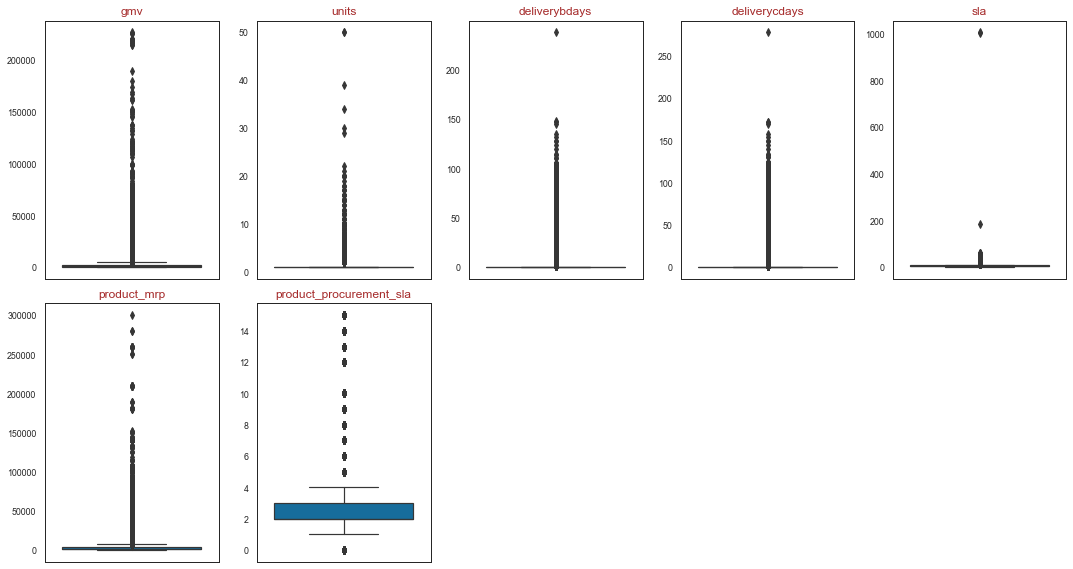

In [571]:
Check_Outliers(consumer_df,num_cols)

<font color="blue"> There seems to be lot of outliers in all the columns. However, it wont be prudent to just get rid of them right away. Lets do more deep dive and check at 99 percentile, etc. </font>

In [572]:
# UDF for Outlier Identification using Distplot with wider plots and 3 subplots per row
def Check_Outliers_Distplot(data, columnList):
    num_cols = len(columnList)
    num_rows = (num_cols + 2) // 3  # To handle up to 3 subplots in one line
    plt.figure(figsize=[18, 4 * num_rows])

    for i, j in enumerate(columnList):
        plt.subplot(num_rows, 3, i+1)

        sns.distplot(data[j], kde=True)  # Using distplot to visualize the distribution

        plt.ylabel(None)
        plt.title(j, fontsize=12, color='brown')  # Adjust title fontsize

    plt.tight_layout()
    plt.show()

In [573]:
# Check_Outliers_Distplot(consumer_df, num_cols)

In [574]:
# Calculate custom percentiles using the describe method

consumer_df[num_cols].describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

count     mean      std    min     25%      50%  \
gmv                     1464190.000 2483.958 5622.335  0.000 349.000  790.000   
units                   1464190.000    1.022    0.256  1.000   1.000    1.000   
deliverybdays           1464190.000    1.032    2.478  0.000   0.000    0.000   
deliverycdays           1464190.000    1.202    2.885  0.000   0.000    0.000   
sla                     1464190.000    5.761    2.993  0.000   4.000    6.000   
product_mrp             1464190.000 4223.001 8653.349 49.000 849.000 1699.000   
product_procurement_sla 1464190.000    2.701    1.786  0.000   2.000    2.000   

                             75%      90%       95%       99%        max  
gmv                     1999.000 4300.000 11170.000 30499.000 226947.000  
units                      1.000    1.000     1.000     2.000     50.000  
deliverybdays              0.000    5.000     6.000     8.000    238.000  
deliverycdays              0.000    5.000     7.000    10.000    278.000  
sla                        7.000    9.000    10.000    13.000   1006.000  
product_mrp             3499.000 7150.000 17995.000 45990.000 299999.000  
product_procurement_sla    3.000    5.000     5.000     7.000     15.000

<font color="blue">
    - 'gmv' & 'product_mrp' can potentially have high values or outliers due to premium, expensive, limited edition, etc products sold or or it may be also due to pure manual error. In either case, we will not take action on these variables. <br>
    - 'deliverybdays', 'deliverycdays' and 'sla' are realted to operational effectiveness of delivery and high values or variation indication of operational inefficiencies which should be fixed.<br>
    - It will be a advisable/practical to cap 'deliverybdays', 'deliverycdays' and 'sla' than 'gmv', 'product_mrp' because the latter may cause to lose important insight towards the business objective right now at hand.<br>
    - However, it is strongly recommended that the management initiates process improvement projects to check and improve delivery efficiencies.
</font>

In [575]:
# Calculate the 99th percentile threshold for'deliverybdays', 'deliverycdays', and 'sla'

thresholds = consumer_df[['deliverybdays', 'deliverycdays','sla']].quantile(0.99)
print('99th Percentile Thresholds:')
print(thresholds)

99th Percentile Thresholds:
deliverybdays    8.000
deliverycdays   10.000
sla             13.000
Name: 0.99, dtype: float64


<font color="blue"> Lets cap values for 'deliverybdays', 'deliverycdays', 'sla' at 99 percentile . </font>

In [576]:
consumer_df.shape

(1464190, 16)

Before capping we had 1464190 rows

In [577]:
# Define the 99th percentile thresholds
percentile_thresholds = {'deliverybdays': 8.0, 'deliverycdays': 10.0, 'sla': 13.0}

# Drop rows where values exceed the thresholds
for column, threshold in percentile_thresholds.items():
    consumer_df = consumer_df[consumer_df[column] <= threshold]

In [578]:
consumer_df.shape

(1439613, 16)

After capping 1439613 rows are left (appx 1.68% rows dropped)

In [579]:
# Calculate custom percentiles using the describe method

consumer_df[num_cols].describe().T

count     mean      std    min     25%      50%  \
gmv                     1439613.000 2496.948 5642.511  0.000 350.000  797.000   
units                   1439613.000    1.022    0.256  1.000   1.000    1.000   
deliverybdays           1439613.000    0.936    1.964  0.000   0.000    0.000   
deliverycdays           1439613.000    1.091    2.287  0.000   0.000    0.000   
sla                     1439613.000    5.658    2.588  0.000   4.000    6.000   
product_mrp             1439613.000 4246.414 8689.519 49.000 849.000 1699.000   
product_procurement_sla 1439613.000    2.701    1.787  0.000   2.000    2.000   

                             75%        max  
gmv                     1999.000 226947.000  
units                      1.000     50.000  
deliverybdays              0.000      8.000  
deliverycdays              0.000     10.000  
sla                        7.000     13.000  
product_mrp             3499.000 299999.000  
product_procurement_sla    3.000     15.000

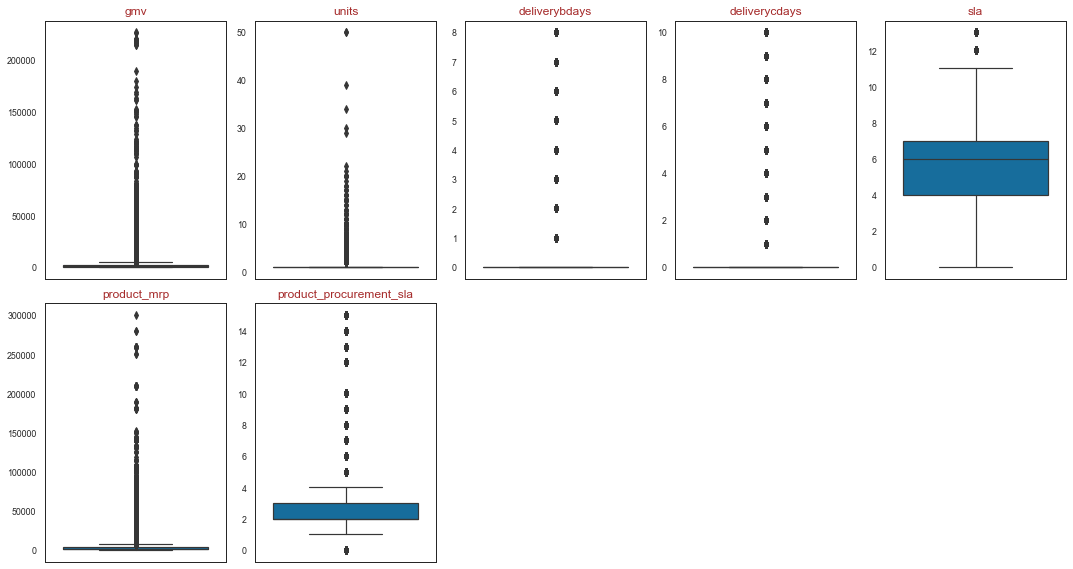

In [580]:
Check_Outliers(consumer_df,num_cols)

__Lets check the categorical columns for spread__

In [581]:
cat_cols = consumer_df.select_dtypes('object').columns

In [582]:
cat_cols

Index(['Year', 'Month', 'Week', 's1_fact.order_payment_type', 'pincode',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical'],
      dtype='object')

In [583]:
consumer_df[cat_cols].describe().T

count    unique                      top  \
Year                              1439613         2                     2016   
Month                             1439613        13                       10   
Week                              1439613        52                       42   
s1_fact.order_payment_type        1439613         2                      cod   
pincode                       1439613.000 12665.000 -9031043207091489792.000   
product_analytic_category         1439613         5       entertainmentsmall   
product_analytic_sub_category     1439613        14                  speaker   
product_analytic_vertical         1439613        73            mobilespeaker   

                                  freq  
Year                            803715  
Month                           186097  
Week                            105841  
s1_fact.order_payment_type     1036896  
pincode                       7467.000  
product_analytic_category       820728  
product_analytic_sub_category   461567  
product_analytic_vertical       232090

## Feature Engineering

In [584]:
consumer_df.dtypes

order_date                       datetime64[ns]
Year                                     object
Month                                    object
Week                                     object
gmv                                     float64
units                                     int64
deliverybdays                             int64
deliverycdays                             int64
s1_fact.order_payment_type               object
sla                                       int64
pincode                                  object
product_analytic_category                object
product_analytic_sub_category            object
product_analytic_vertical                object
product_mrp                             float64
product_procurement_sla                   int64
dtype: object

#### ListPrice = gmv*units

In [585]:
# Creating a feature called list price as product of gmv and units.
consumer_df['listed_price'] = consumer_df['gmv'] / consumer_df['units']

In [586]:
# Check if any records with ListPrice > MRP
print(any(consumer_df['listed_price'] > consumer_df['product_mrp']))

False


#### Discount = (product_mrp - listed_price)/product_mrp

In [587]:
# Create feature discount = (product_mrp - listed_price)/product_mrp

consumer_df['discount%'] = round(100*((consumer_df['product_mrp'] - consumer_df['listed_price'])/consumer_df['product_mrp']),2)

### Product_type: Premium and Mass

<font color="blue"> Use gmv to check and define product category as premium and mass product. Higher the gmv, the product will be more premium and less affordable to common concumer as defined by the data.</font>

In [588]:
# Let's check the percentiles of MRP in the dataset to define the threshold for premium products.
pd.set_option('display.float_format', '{:.2f}'.format)
consumer_df['gmv'].describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

count   1439613.00
mean       2496.95
std        5642.51
min           0.00
25%         350.00
50%         797.00
75%        1999.00
80%        2459.00
90%        4380.00
95%       11500.00
99%       30971.88
max      226947.00
Name: gmv, dtype: float64

In [589]:
# Reset the option to default
pd.reset_option('display.float_format')

<font color="blue"> Lets consider gmv value beyond 80 percentile as premium else mass product. </font>

In [590]:
# Creating a feature product type based on gmv value
threshold = consumer_df['product_mrp'].quantile(0.8)
consumer_df['product_type'] = consumer_df['product_mrp'].apply(lambda x: 'premium' if x >= threshold else 'mass')

In [591]:
consumer_df.head()

order_date  Year Month Week     gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      1              0   
1 2015-10-19 10:07:22  2015    10   43  6900.0      1              0   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1              0   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1              0   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1              0   

   deliverycdays s1_fact.order_payment_type  sla                 pincode  \
0              0                        cod    5  -7.79175582905735e+018   
1              0                        cod    7   7.33541149097431e+018   
2              0                        cod   10  -7.47768776228657e+018   
3              0                    prepaid    4  -5.83593163877661e+018   
4              0                    prepaid    6   5.34735360997242e+017   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   
2           cameraaccessory               cameraaccessory   
3           cameraaccessory               cameraaccessory   
4           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              cameratripod       7190.0                        0   
1              cameratripod       7190.0                        0   
2              cameratripod       2099.0                        3   
3              cameratripod       2099.0                        3   
4              cameratripod       2099.0                        3   

   listed_price  discount% product_type  
0        6400.0       11.0      premium  
1        6900.0        4.0      premium  
2        1990.0        5.2         mass  
3        1690.0       19.5         mass  
4        1618.0       22.9         mass

### Payday

<font color="blue"> If a day is closer to salary date then we will flag it as 1 else 0 <br>
In Ontario the salary happens twice a month, mostly around start and mid of the week. However, we cannot ignore the possibility of some consumers getting monthly salary. Hence, we will consider following dates for flag 1 : 14, 15, 16, 30, 31, 1, 2.  </font>

In [592]:
# Creating payday flag
payday_days = ['14', '15', '16', '30', '31', '1', '2']
consumer_df['payday'] = consumer_df['order_date'].dt.strftime('%d').isin(payday_days).astype(int)

In [593]:
consumer_df.head()

order_date  Year Month Week     gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      1              0   
1 2015-10-19 10:07:22  2015    10   43  6900.0      1              0   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1              0   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1              0   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1              0   

   deliverycdays s1_fact.order_payment_type  sla                 pincode  \
0              0                        cod    5  -7.79175582905735e+018   
1              0                        cod    7   7.33541149097431e+018   
2              0                        cod   10  -7.47768776228657e+018   
3              0                    prepaid    4  -5.83593163877661e+018   
4              0                    prepaid    6   5.34735360997242e+017   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   
2           cameraaccessory               cameraaccessory   
3           cameraaccessory               cameraaccessory   
4           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              cameratripod       7190.0                        0   
1              cameratripod       7190.0                        0   
2              cameratripod       2099.0                        3   
3              cameratripod       2099.0                        3   
4              cameratripod       2099.0                        3   

   listed_price  discount% product_type  payday  
0        6400.0       11.0      premium       0  
1        6900.0        4.0      premium       0  
2        1990.0        5.2         mass       0  
3        1690.0       19.5         mass       1  
4        1618.0       22.9         mass       0

### Holiday Flag

<font color="blue"> Based on the statutory holidays in Ontario during 2015 and 2016, we will flag the date as 1 if holiday else 0 <br>
The list of holidays will be considered from the Ontario Official site <br>
We will create a UDF for holidayflag and then apply it to our dataframe</font>

In [594]:
# Create a UDF for holiday flag

def holidayflag(ord_date):
    holidays = {
        '2015': {'07-01', '08-03', '09-07', '10-12', '10-31', '11-11', '12-25', '12-26'},
        'default': {'01-01', '02-15', '02-14', '02-29', '03-17', '03-25', '03-28', '05-08', '05-23', '06-19', '06-21', '06-24'}
    }
    
    year = ord_date.strftime('%Y')
    month_day = ord_date.strftime('%m-%d')
    
    return 1 if month_day in holidays.get(year, holidays['default']) else 0

In [595]:
consumer_df['holiday'] = consumer_df['order_date'].apply(lambda x:holidayflag(x))

### Mapping Months and Weeks

<font color="blue"> Creating a UDF for mapping months and weeks </font>

In [596]:
# UDF to get weeks from year

def WeekYear(year):
    WEEKDAYS = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
    MONTHS = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']

    year = int(year)
    day = WEEKDAYS.index('MONDAY')

    month_number_week = {i: [] for i in range(1, 13)}
    month_name_week = {abbr: [] for abbr in calendar.month_abbr if abbr}

    for month in range(1, 13):
        dt = datetime.date(year, month, 1)
        while dt.weekday() != day:
            dt += datetime.timedelta(days=1)
        while dt.month == month:
            week_number = dt.isocalendar()[1]
            month_number_week[month].append(week_number)
            month_name = calendar.month_abbr[month]
            month_name_week[month_name].append(week_number)
            dt += datetime.timedelta(days=7)

    return month_number_week, month_name_week

In [597]:
wk_number_2015, month_name_2015 = WeekYear(2015)
print(wk_number_2015)
print()
print(month_name_2015)

print()

wk_number_2016, month_name_2016 = WeekYear(2016)
print(wk_number_2016)
print()
print(month_name_2016)

{1: [2, 3, 4, 5], 2: [6, 7, 8, 9], 3: [10, 11, 12, 13, 14], 4: [15, 16, 17, 18], 5: [19, 20, 21, 22], 6: [23, 24, 25, 26, 27], 7: [28, 29, 30, 31], 8: [32, 33, 34, 35, 36], 9: [37, 38, 39, 40], 10: [41, 42, 43, 44], 11: [45, 46, 47, 48, 49], 12: [50, 51, 52, 53]}

{'Jan': [2, 3, 4, 5], 'Feb': [6, 7, 8, 9], 'Mar': [10, 11, 12, 13, 14], 'Apr': [15, 16, 17, 18], 'May': [19, 20, 21, 22], 'Jun': [23, 24, 25, 26, 27], 'Jul': [28, 29, 30, 31], 'Aug': [32, 33, 34, 35, 36], 'Sep': [37, 38, 39, 40], 'Oct': [41, 42, 43, 44], 'Nov': [45, 46, 47, 48, 49], 'Dec': [50, 51, 52, 53]}

{1: [1, 2, 3, 4], 2: [5, 6, 7, 8, 9], 3: [10, 11, 12, 13], 4: [14, 15, 16, 17], 5: [18, 19, 20, 21, 22], 6: [23, 24, 25, 26], 7: [27, 28, 29, 30], 8: [31, 32, 33, 34, 35], 9: [36, 37, 38, 39], 10: [40, 41, 42, 43, 44], 11: [45, 46, 47, 48], 12: [49, 50, 51, 52]}

{'Jan': [1, 2, 3, 4], 'Feb': [5, 6, 7, 8, 9], 'Mar': [10, 11, 12, 13], 'Apr': [14, 15, 16, 17], 'May': [18, 19, 20, 21, 22], 'Jun': [23, 24, 25, 26], 'Jul': [27,

In [598]:
consumer_df.head()

order_date  Year Month Week     gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      1              0   
1 2015-10-19 10:07:22  2015    10   43  6900.0      1              0   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1              0   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1              0   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1              0   

   deliverycdays s1_fact.order_payment_type  sla                 pincode  \
0              0                        cod    5  -7.79175582905735e+018   
1              0                        cod    7   7.33541149097431e+018   
2              0                        cod   10  -7.47768776228657e+018   
3              0                    prepaid    4  -5.83593163877661e+018   
4              0                    prepaid    6   5.34735360997242e+017   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   
2           cameraaccessory               cameraaccessory   
3           cameraaccessory               cameraaccessory   
4           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              cameratripod       7190.0                        0   
1              cameratripod       7190.0                        0   
2              cameratripod       2099.0                        3   
3              cameratripod       2099.0                        3   
4              cameratripod       2099.0                        3   

   listed_price  discount% product_type  payday  holiday  
0        6400.0       11.0      premium       0        0  
1        6900.0        4.0      premium       0        0  
2        1990.0        5.2         mass       0        0  
3        1690.0       19.5         mass       1        0  
4        1618.0       22.9         mass       0        0

## <span style="color:brown">Read Data - Part 2</span></strong>

#### Read 'Product List' from 'Media data and other information.xlsx' into Dataframe

In [599]:
# Read tab product list from the xlx into prod_list_df 

prod_list_df = pd.read_excel('Media data and other information.xlsx', sheet_name='Product List', header=1)
prod_list_df.rename(columns={prod_list_df.columns[1]: 'product_analytic_vertical'}, inplace=True)
prod_list_df.drop(prod_list_df.columns[0], axis=1, inplace=True)

In [600]:
prod_list_df.head()

product_analytic_vertical  Frequency  Percent
0                        \N     5828.0      0.4
1         AmplifierReceiver     4056.0      0.2
2            AudioMP3Player   112892.0      6.8
3                Binoculars    14599.0      0.9
4                   BoomBox     2879.0      0.2

#### Read 'Media Investment' from 'Media data and other information.xlsx' into Dataframe

In [601]:
# Read tab Media Investment from xlsx into media_inv_df

media_inv_df = pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment', skiprows=2)
media_inv_df.drop(media_inv_df.head().columns[0], axis=1, inplace = True)

In [602]:
media_inv_df.head()

Year  Month  Total Investment       TV  Digital  Sponsorship  \
0  2015.0    7.0              17.1  2.2e-01      2.5          7.4   
1  2015.0    8.0               5.1  6.4e-03      1.3          1.1   
2  2015.0    9.0              96.3  3.9e+00      1.4         62.8   
3  2015.0   10.0             170.2  6.1e+00     12.6         84.7   
4  2015.0   11.0              51.2  4.2e+00      1.3         14.2   

   Content Marketing  Online marketing   Affiliates   SEM  Radio  Other  
0            9.3e-04               1.3      5.5e-01   5.0    NaN    NaN  
1            6.3e-06               0.1      7.4e-02   2.5    NaN    NaN  
2            6.1e-01              16.4      5.0e+00   6.2    NaN    NaN  
3            3.4e+00              24.4      7.0e+00  31.9    NaN    NaN  
4            1.7e-01              19.6      6.6e+00   5.2    NaN    NaN

#### Read 'Special Sales Calendar' from 'Media data and other information.xlsx' into Dataframe

In [603]:
# Read Special Sales Calendar from xlxs into sp_sales_cal_df

sp_sales_cal_df = pd.read_excel('Media data and other information.xlsx', sheet_name='Special Sale Calendar', skipfooter=2)
sp_sales_cal_df.drop(sp_sales_cal_df.columns[0], axis=1, inplace = True)
sp_sales_cal_df

Unnamed: 1               Sales Calendar
0      2015.0               (18-19th July)
1         NaN                (15-17th Aug)
2         NaN                (28-30th Aug)
3         NaN                (15-17th Oct)
4         NaN                 (7-14th Nov)
5         NaN   (25th Dec'15 - 3rd Jan'16)
6      2016.0                  (20-22 Jan)
7         NaN                    (1-2 Feb)
8         NaN                  (20-21 Feb)
9         NaN                  (14-15 Feb)

<font color="blue"> We will use the fillna method in Pandas to forward-fill the missing values in the 'Unnamed: 1' column. This will ensure that the 'Unnamed: 1' column will be filled with the same year value for consecutive rows, as seen in the excel sheet provided. </font>

In [604]:
# Read the 'Special Sale Calendar' sheet from the Excel file
sp_sales_cal_df = pd.read_excel('Media data and other information.xlsx', sheet_name='Special Sale Calendar')

# Forward-fill the missing values in the 'Unnamed: 1' column
sp_sales_cal_df['Unnamed: 1'].fillna(method='ffill', inplace=True)

# Drop the first column
sp_sales_cal_df.drop(sp_sales_cal_df.columns[0], axis=1, inplace=True)
sp_sales_cal_df

Unnamed: 1               Sales Calendar
0       2015.0               (18-19th July)
1       2015.0                (15-17th Aug)
2       2015.0                (28-30th Aug)
3       2015.0                (15-17th Oct)
4       2015.0                 (7-14th Nov)
5       2015.0   (25th Dec'15 - 3rd Jan'16)
6       2016.0                  (20-22 Jan)
7       2016.0                    (1-2 Feb)
8       2016.0                  (20-21 Feb)
9       2016.0                  (14-15 Feb)
10      2016.0                    (7-9 Mar)
11      2016.0                  (25-27 May)

#### Read 'Monthyl NPS Score' from 'Media data and other information.xlsx' into Dataframe

In [605]:
nps_df = pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score')
nps_df.columns.values[0]='score'
nps_df

score  July'15  Aug'15  Sept'15  Oct'15  Nov'15  Dec'15  Jan'16  \
0          NPS     54.6    60.0     46.9    44.4    47.0    45.8    47.1   
1  Stock Index   1177.0  1206.0   1101.0  1210.0  1233.0  1038.0  1052.0   

   Feb'16  Mar'16  Apr'16  May'16  June'16  
0    50.3    49.0    51.8    47.3     50.5  
1  1222.0  1015.0  1242.0  1228.0   1194.0

#### Create df from the table in Product Details.docx

In [606]:
from docx import Document

# Load the Word document
doc = Document('Product Details.docx')

# Access the first table in the document
table = doc.tables[0]

# Initialize empty lists to store data
data = []

# Iterate through rows in the table
for row in table.rows:
    # Extract text from each cell and append to the row list
    row_data = [cell.text.strip() for cell in row.cells]
    data.append(row_data)

# Create a DataFrame from the extracted data with specific column names
column_names = ['super_category', 'category', 'sub_category', 'vertical']
product_details_df = pd.DataFrame(data, columns=column_names)

# Skip the first row if it contains column headers (use header=0 if needed)
product_details_df = product_details_df.iloc[1:]

# Reset the DataFrame index
product_details_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
product_details_df

super_category        category     sub_category               vertical
0              CE          Camera           Camera             Camcorders
1              CE          Camera           Camera                   DSLR
2              CE          Camera           Camera        Instant Cameras
3              CE          Camera           Camera          Point & Shoot
4              CE          Camera           Camera        SportsAndAction
..            ...             ...              ...                    ...
69             CE  GamingHardware  GamingAccessory    JoystickGamingWheel
70             CE  GamingHardware  GamingAccessory       MotionController
71             CE  GamingHardware  GamingAccessory    TVOutCableAccessory
72             CE  GamingHardware    GamingConsole          GamingConsole
73             CE  GamingHardware    GamingConsole  HandheldGamingConsole

[74 rows x 4 columns]

<font color="blue"> The first column 'super_category' has only one value CE. We can drop this column. </font>

In [607]:
# Dropping the first column called 'super category'

product_details_df.drop(product_details_df.columns[0], axis=1, inplace=True)
product_details_df.head()

category sub_category         vertical
0   Camera       Camera       Camcorders
1   Camera       Camera             DSLR
2   Camera       Camera  Instant Cameras
3   Camera       Camera    Point & Shoot
4   Camera       Camera  SportsAndAction

#### Read Climate 2015

In [608]:
# First 24 rows has unwanted info for reading data in df, this will be skipped while reading the xlsx file

climate_2015_df = pd.read_excel('ONTARIO-2015.xlsx', skiprows=24, engine='openpyxl')
climate_2015_df.head()

Date/Time    Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2015-01-01  2015.0    1.0  1.0            †            0.0           NaN   
1 2015-01-02  2015.0    1.0  2.0            †            3.0           NaN   
2 2015-01-03  2015.0    1.0  3.0            †            2.5           NaN   
3 2015-01-04  2015.0    1.0  4.0            †            2.5           NaN   
4 2015-01-05  2015.0    1.0  5.0            †          -10.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0           -8.5           NaN            -4.3            NaN   
1           -3.0           NaN             0.0            NaN   
2           -4.0           NaN            -0.8            NaN   
3            0.0           NaN             1.3            NaN   
4          -13.5           NaN           -11.8            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0                22.3                NaN                 0.0   
1                18.0                NaN                 0.0   
2                18.8                NaN                 0.0   
3                16.7                NaN                 0.0   
4                29.8                NaN                 0.0   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              0.0             NaN              0.0   
1                NaN              0.0             NaN              0.0   
2                NaN             24.0             NaN              0.0   
3                NaN              0.0             NaN              1.0   
4                NaN              0.0             NaN              3.0   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                0.0               NaN                0.0   
1             NaN                0.0               NaN                0.0   
2             NaN               24.0               NaN                0.0   
3             NaN                1.0               NaN                0.0   
4             NaN                3.0               NaN                1.0   

  Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0               NaN                        NaN                   NaN   
1               NaN                        NaN                   NaN   
2               NaN                        NaN                   NaN   
3               NaN                        NaN                   NaN   
4               NaN                        NaN                   NaN   

   Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     NaN                   NaN  
1                     NaN                   NaN  
2                     NaN                   NaN  
3                     NaN                   NaN  
4                     NaN                   NaN

#### Read Climate 2016

In [609]:
# First 24 rows has unwanted info for reading data in df, this will be skipped while reading the xlsx file

climate_2016_df = pd.read_excel('ONTARIO-2016.xlsx', skiprows=24, engine='openpyxl')
climate_2016_df.head()

Date/Time    Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2016-01-01  2016.0    1.0  1.0          NaN            NaN           NaN   
1 2016-01-02  2016.0    1.0  2.0          NaN            NaN           NaN   
2 2016-01-03  2016.0    1.0  3.0          NaN            NaN           NaN   
3 2016-01-04  2016.0    1.0  4.0          NaN            NaN           NaN   
4 2016-01-05  2016.0    1.0  5.0          NaN            NaN           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0            NaN           NaN             NaN            NaN   
1            NaN           NaN             NaN            NaN   
2            NaN           NaN             NaN            NaN   
3            NaN           NaN             NaN            NaN   
4            NaN           NaN             NaN            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0                 NaN                NaN                 NaN   
1                 NaN                NaN                 NaN   
2                 NaN                NaN                 NaN   
3                 NaN                NaN                 NaN   
4                 NaN                NaN                 NaN   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              NaN             NaN              NaN   
1                NaN              NaN             NaN              NaN   
2                NaN              NaN             NaN              NaN   
3                NaN              NaN             NaN              NaN   
4                NaN              NaN             NaN              NaN   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                NaN               NaN                NaN   
1             NaN                NaN               NaN                NaN   
2             NaN                NaN               NaN                NaN   
3             NaN                NaN               NaN                NaN   
4             NaN                NaN               NaN                NaN   

  Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0               NaN                        NaN                   NaN   
1               NaN                        NaN                   NaN   
2               NaN                        NaN                   NaN   
3               NaN                        NaN                   NaN   
4               NaN                        NaN                   NaN   

   Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     NaN                   NaN  
1                     NaN                   NaN  
2                     NaN                   NaN  
3                     NaN                   NaN  
4                     NaN                   NaN

## <span style="color:brown"> Feature Engineering - Contd</span></strong>

### Media Investment

In [610]:
media_inv_df.head()

Year  Month  Total Investment       TV  Digital  Sponsorship  \
0  2015.0    7.0              17.1  2.2e-01      2.5          7.4   
1  2015.0    8.0               5.1  6.4e-03      1.3          1.1   
2  2015.0    9.0              96.3  3.9e+00      1.4         62.8   
3  2015.0   10.0             170.2  6.1e+00     12.6         84.7   
4  2015.0   11.0              51.2  4.2e+00      1.3         14.2   

   Content Marketing  Online marketing   Affiliates   SEM  Radio  Other  
0            9.3e-04               1.3      5.5e-01   5.0    NaN    NaN  
1            6.3e-06               0.1      7.4e-02   2.5    NaN    NaN  
2            6.1e-01              16.4      5.0e+00   6.2    NaN    NaN  
3            3.4e+00              24.4      7.0e+00  31.9    NaN    NaN  
4            1.7e-01              19.6      6.6e+00   5.2    NaN    NaN

<font color="blue"> Columns Radio and Other are having NaNs. Lets handle that first. </font>

In [611]:
percentage_missing_values = (media_inv_df.Radio.isna().mean() * 100).round(2)
percentage_null_values = (media_inv_df.Other.isnull().mean() * 100).round(2)

print("Percentage of Missing Values:\n", percentage_missing_values)
print("Percentage of Null Values:\n", percentage_null_values)

Percentage of Missing Values:
 81.25
Percentage of Null Values:
 81.25


<font color="blue"> Cant drop such a huge number of rows. NaN to be imputed by 0. </font>

In [612]:
# Imputing NaN with 0

media_inv_df['Radio'].fillna(value=0, inplace=True)
media_inv_df['Other'].fillna(value=0, inplace=True)

media_inv_df

Year  Month  Total Investment       TV  Digital  Sponsorship  \
0   2015.0    7.0              17.1  2.2e-01      2.5          7.4   
1   2015.0    8.0               5.1  6.4e-03      1.3          1.1   
2   2015.0    9.0              96.3  3.9e+00      1.4         62.8   
3   2015.0   10.0             170.2  6.1e+00     12.6         84.7   
4   2015.0   11.0              51.2  4.2e+00      1.3         14.2   
5   2015.0   12.0             106.7  5.4e+00      3.1         56.7   
6   2016.0    1.0              74.2  4.4e+00      0.5          4.2   
7   2016.0    2.0              48.1  2.6e+00      1.9         11.7   
8   2016.0    3.0             100.0  9.3e+00      2.1         41.6   
9   2016.0    4.0              56.8  5.2e+00      0.9         24.3   
10  2016.0    5.0              78.1  1.4e+00      0.8         31.7   
11  2016.0    6.0              42.8  1.7e+00      1.4         25.0   
12     NaN    NaN               NaN      NaN      NaN          NaN   
13     NaN    NaN               NaN      NaN      NaN          NaN   
14     NaN    NaN               NaN      NaN      NaN          NaN   
15     NaN    NaN               NaN  1.9e+01      NaN          NaN   

    Content Marketing  Online marketing   Affiliates   SEM  Radio  Other  
0             9.3e-04               1.3      5.5e-01   5.0    0.0    0.0  
1             6.3e-06               0.1      7.4e-02   2.5    0.0    0.0  
2             6.1e-01              16.4      5.0e+00   6.2    0.0    0.0  
3             3.4e+00              24.4      7.0e+00  31.9    0.0    0.0  
4             1.7e-01              19.6      6.6e+00   5.2    0.0    0.0  
5             1.1e+00              22.5      6.8e+00  11.2    0.0    0.0  
6             9.0e-01              22.9      7.4e+00   4.2    2.7   27.1  
7             6.0e-01              19.9      6.5e+00   4.9    0.0    0.0  
8             3.7e-01              18.4      6.2e+00   5.2    0.9   15.9  
9             3.5e-02              16.5      5.7e+00   4.2    0.0    0.0  
10            7.9e-01              23.6      6.8e+00   6.9    1.1    5.0  
11            4.5e-02               8.0      2.8e+00   3.7    0.0    0.0  
12                NaN               NaN          NaN   NaN    0.0    0.0  
13                NaN               NaN          NaN   NaN    0.0    0.0  
14                NaN               NaN          NaN   NaN    0.0    0.0  
15                NaN               NaN          NaN   NaN    0.0    0.0

<font color="blue"> __As per the objective, weekly data is needed.__ </font>

In [613]:
# Temp DataFrame
total_weeks = 52
temp_media_investment = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'])

temp_media_investment.head()

Year Month Week Total Investment   TV Digital Sponsorship Content Marketing  \
0  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
1  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
2  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
3  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
4  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   

  Online marketing Affiliates  SEM Radio Other  
0              NaN        NaN  NaN   NaN   NaN  
1              NaN        NaN  NaN   NaN   NaN  
2              NaN        NaN  NaN   NaN   NaN  
3              NaN        NaN  NaN   NaN   NaN  
4              NaN        NaN  NaN   NaN   NaN

In [614]:
i = 0

for index, row in media_inv_df.iterrows():
    year = row['Year']
    month = row['Month']

    # Check if 'Year' and 'Month' are not NaN
    if not pd.isna(year) and not pd.isna(month):
        num_weeks = len(wk_number_2015[month]) if year == 2015 else len(wk_number_2016[month])
        
        if year in [2015, 2016]:
            for week in (wk_number_2015[month] if year == 2015 else wk_number_2016[month]):
                temp_media_investment.at[i, 'Year'] = year
                temp_media_investment.at[i, 'Month'] = month
                temp_media_investment.at[i, 'Week'] = week
                for col in ['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']:  # Note the space before ' Affiliates'
                    temp_media_investment.at[i, col.strip()] = round(row[col] / num_weeks, 3)  # Strip spaces from column name
                i += 1

temp_media_investment.head()

Year Month Week Total Investment   TV Digital Sponsorship  \
0  2015.0   7.0   28              4.3  0.1     0.6         1.9   
1  2015.0   7.0   29              4.3  0.1     0.6         1.9   
2  2015.0   7.0   30              4.3  0.1     0.6         1.9   
3  2015.0   7.0   31              4.3  0.1     0.6         1.9   
4  2015.0   8.0   32              1.0  0.0     0.3         0.2   

  Content Marketing Online marketing Affiliates  SEM Radio Other  
0               0.0              0.3        0.1  1.3   0.0   0.0  
1               0.0              0.3        0.1  1.3   0.0   0.0  
2               0.0              0.3        0.1  1.3   0.0   0.0  
3               0.0              0.3        0.1  1.3   0.0   0.0  
4               0.0              0.0        0.0  0.5   0.0   0.0

In [615]:
media_inv_df = temp_media_investment

In [616]:
media_inv_df.head()

Year Month Week Total Investment   TV Digital Sponsorship  \
0  2015.0   7.0   28              4.3  0.1     0.6         1.9   
1  2015.0   7.0   29              4.3  0.1     0.6         1.9   
2  2015.0   7.0   30              4.3  0.1     0.6         1.9   
3  2015.0   7.0   31              4.3  0.1     0.6         1.9   
4  2015.0   8.0   32              1.0  0.0     0.3         0.2   

  Content Marketing Online marketing Affiliates  SEM Radio Other  
0               0.0              0.3        0.1  1.3   0.0   0.0  
1               0.0              0.3        0.1  1.3   0.0   0.0  
2               0.0              0.3        0.1  1.3   0.0   0.0  
3               0.0              0.3        0.1  1.3   0.0   0.0  
4               0.0              0.0        0.0  0.5   0.0   0.0

In [617]:
media_inv_df['Week'] = media_inv_df['Week'].astype(str)

In [618]:
media_inv_df.Week.value_counts().sum()

52

<font color="blue"> Perfect. We have 52 weeks. </font>

In [619]:
# Lets check if any null values
media_inv_df.isnull().values.any()

False

<font color="blue"> No nulls and no missing values. </font>

In [620]:
# Lets now drop Year and Month as it is not needed for analysis

media_inv_df.drop(['Year', 'Month'], axis = 1, inplace=True)
media_inv_df.head()

Week Total Investment   TV Digital Sponsorship Content Marketing  \
0   28              4.3  0.1     0.6         1.9               0.0   
1   29              4.3  0.1     0.6         1.9               0.0   
2   30              4.3  0.1     0.6         1.9               0.0   
3   31              4.3  0.1     0.6         1.9               0.0   
4   32              1.0  0.0     0.3         0.2               0.0   

  Online marketing Affiliates  SEM Radio Other  
0              0.3        0.1  1.3   0.0   0.0  
1              0.3        0.1  1.3   0.0   0.0  
2              0.3        0.1  1.3   0.0   0.0  
3              0.3        0.1  1.3   0.0   0.0  
4              0.0        0.0  0.5   0.0   0.0

#### Exponential Moving Avg for all adv channels - 8 weeks

In [621]:
# Get all column names in a variable
cols_media_inv = media_inv_df.columns[1:]
cols_media_inv

Index(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],
      dtype='object')

In [622]:
n = 8  # EMA span

ema_cols = media_inv_df[cols_media_inv].ewm(span=n, adjust=False).mean()
ema_cols.columns = [f'{col}_EMA_{n}' for col in cols_media_inv]

media_inv_df = pd.concat([media_inv_df, ema_cols], axis=1)

media_inv_df.head()

Week Total Investment   TV Digital Sponsorship Content Marketing  \
0   28              4.3  0.1     0.6         1.9               0.0   
1   29              4.3  0.1     0.6         1.9               0.0   
2   30              4.3  0.1     0.6         1.9               0.0   
3   31              4.3  0.1     0.6         1.9               0.0   
4   32              1.0  0.0     0.3         0.2               0.0   

  Online marketing Affiliates  SEM Radio Other  Total Investment_EMA_8  \
0              0.3        0.1  1.3   0.0   0.0                     4.3   
1              0.3        0.1  1.3   0.0   0.0                     4.3   
2              0.3        0.1  1.3   0.0   0.0                     4.3   
3              0.3        0.1  1.3   0.0   0.0                     4.3   
4              0.0        0.0  0.5   0.0   0.0                     3.5   

   TV_EMA_8  Digital_EMA_8  Sponsorship_EMA_8  Content Marketing_EMA_8  \
0   5.4e-02            0.6                1.9                      0.0   
1   5.4e-02            0.6                1.9                      0.0   
2   5.4e-02            0.6                1.9                      0.0   
3   5.4e-02            0.6                1.9                      0.0   
4   4.2e-02            0.5                1.5                      0.0   

   Online marketing_EMA_8  Affiliates_EMA_8  SEM_EMA_8  Radio_EMA_8  \
0                     0.3               0.1        1.3          0.0   
1                     0.3               0.1        1.3          0.0   
2                     0.3               0.1        1.3          0.0   
3                     0.3               0.1        1.3          0.0   
4                     0.3               0.1        1.1          0.0   

   Other_EMA_8  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

#### Simple Moving Avg for all adv channels - 5 weeks

In [623]:
n = 5  # SMA window

sma_cols = media_inv_df[cols_media_inv].rolling(window=n).mean()
sma_cols.columns = [f'{col}_SMA_{n}' for col in cols_media_inv]

media_inv_df = pd.concat([media_inv_df, sma_cols], axis=1)

media_inv_df.head()

Week Total Investment   TV Digital Sponsorship Content Marketing  \
0   28              4.3  0.1     0.6         1.9               0.0   
1   29              4.3  0.1     0.6         1.9               0.0   
2   30              4.3  0.1     0.6         1.9               0.0   
3   31              4.3  0.1     0.6         1.9               0.0   
4   32              1.0  0.0     0.3         0.2               0.0   

  Online marketing Affiliates  SEM Radio Other  Total Investment_EMA_8  \
0              0.3        0.1  1.3   0.0   0.0                     4.3   
1              0.3        0.1  1.3   0.0   0.0                     4.3   
2              0.3        0.1  1.3   0.0   0.0                     4.3   
3              0.3        0.1  1.3   0.0   0.0                     4.3   
4              0.0        0.0  0.5   0.0   0.0                     3.5   

   TV_EMA_8  Digital_EMA_8  Sponsorship_EMA_8  Content Marketing_EMA_8  \
0   5.4e-02            0.6                1.9                      0.0   
1   5.4e-02            0.6                1.9                      0.0   
2   5.4e-02            0.6                1.9                      0.0   
3   5.4e-02            0.6                1.9                      0.0   
4   4.2e-02            0.5                1.5                      0.0   

   Online marketing_EMA_8  Affiliates_EMA_8  SEM_EMA_8  Radio_EMA_8  \
0                     0.3               0.1        1.3          0.0   
1                     0.3               0.1        1.3          0.0   
2                     0.3               0.1        1.3          0.0   
3                     0.3               0.1        1.3          0.0   
4                     0.3               0.1        1.1          0.0   

   Other_EMA_8  Total Investment_SMA_5  TV_SMA_5  Digital_SMA_5  \
0          0.0                     NaN       NaN            NaN   
1          0.0                     NaN       NaN            NaN   
2          0.0                     NaN       NaN            NaN   
3          0.0                     NaN       NaN            NaN   
4          0.0                     3.6   4.3e-02            0.6   

   Sponsorship_SMA_5  Content Marketing_SMA_5  Online marketing_SMA_5  \
0                NaN                      NaN                     NaN   
1                NaN                      NaN                     NaN   
2                NaN                      NaN                     NaN   
3                NaN                      NaN                     NaN   
4                1.5                      0.0                     0.3   

   Affiliates_SMA_5  SEM_SMA_5  Radio_SMA_5  Other_SMA_5  
0               NaN        NaN          NaN          NaN  
1               NaN        NaN          NaN          NaN  
2               NaN        NaN          NaN          NaN  
3               NaN        NaN          NaN          NaN  
4               0.1        1.1          0.0          0.0

#### Simple Moving Avg for all adv channels - 3 weeks

In [624]:
n = 3  # SMA window

sma_cols = media_inv_df[cols_media_inv].rolling(window=n).mean()
sma_cols.columns = [f'{col}_SMA_{n}' for col in cols_media_inv]

media_inv_df = pd.concat([media_inv_df, sma_cols], axis=1)

media_inv_df.head()

Week Total Investment   TV Digital Sponsorship Content Marketing  \
0   28              4.3  0.1     0.6         1.9               0.0   
1   29              4.3  0.1     0.6         1.9               0.0   
2   30              4.3  0.1     0.6         1.9               0.0   
3   31              4.3  0.1     0.6         1.9               0.0   
4   32              1.0  0.0     0.3         0.2               0.0   

  Online marketing Affiliates  SEM Radio Other  Total Investment_EMA_8  \
0              0.3        0.1  1.3   0.0   0.0                     4.3   
1              0.3        0.1  1.3   0.0   0.0                     4.3   
2              0.3        0.1  1.3   0.0   0.0                     4.3   
3              0.3        0.1  1.3   0.0   0.0                     4.3   
4              0.0        0.0  0.5   0.0   0.0                     3.5   

   TV_EMA_8  Digital_EMA_8  Sponsorship_EMA_8  Content Marketing_EMA_8  \
0   5.4e-02            0.6                1.9                      0.0   
1   5.4e-02            0.6                1.9                      0.0   
2   5.4e-02            0.6                1.9                      0.0   
3   5.4e-02            0.6                1.9                      0.0   
4   4.2e-02            0.5                1.5                      0.0   

   Online marketing_EMA_8  Affiliates_EMA_8  SEM_EMA_8  Radio_EMA_8  \
0                     0.3               0.1        1.3          0.0   
1                     0.3               0.1        1.3          0.0   
2                     0.3               0.1        1.3          0.0   
3                     0.3               0.1        1.3          0.0   
4                     0.3               0.1        1.1          0.0   

   Other_EMA_8  Total Investment_SMA_5  TV_SMA_5  Digital_SMA_5  \
0          0.0                     NaN       NaN            NaN   
1          0.0                     NaN       NaN            NaN   
2          0.0                     NaN       NaN            NaN   
3          0.0                     NaN       NaN            NaN   
4          0.0                     3.6   4.3e-02            0.6   

   Sponsorship_SMA_5  Content Marketing_SMA_5  Online marketing_SMA_5  \
0                NaN                      NaN                     NaN   
1                NaN                      NaN                     NaN   
2                NaN                      NaN                     NaN   
3                NaN                      NaN                     NaN   
4                1.5                      0.0                     0.3   

   Affiliates_SMA_5  SEM_SMA_5  Radio_SMA_5  Other_SMA_5  \
0               NaN        NaN          NaN          NaN   
1               NaN        NaN          NaN          NaN   
2               NaN        NaN          NaN          NaN   
3               NaN        NaN          NaN          NaN   
4               0.1        1.1          0.0          0.0   

   Total Investment_SMA_3  TV_SMA_3  Digital_SMA_3  Sponsorship_SMA_3  \
0                     NaN       NaN            NaN                NaN   
1                     NaN       NaN            NaN                NaN   
2                     4.3   5.4e-02            0.6                1.9   
3                     4.3   5.4e-02            0.6                1.9   
4                     3.2   3.6e-02            0.5                1.3   

   Content Marketing_SMA_3  Online marketing_SMA_3  Affiliates_SMA_3  \
0                      NaN                     NaN               NaN   
1                      NaN                     NaN               NaN   
2                      0.0                     0.3           1.4e-01   
3                      0.0                     0.3           1.4e-01   
4                      0.0                     0.2           9.6e-02   

   SEM_SMA_3  Radio_SMA_3  Other_SMA_3  
0        NaN          NaN          NaN  
1        NaN          NaN          NaN  
2        1.3          0.0          0.0  
3        1.3          0.0

#### Deriving AdStock values for all adv channels

In [625]:
def cal_adstock(data, engagement_factor):
        
    ad_stock_vectors = {}
    
    for col in cols_media_inv:
        ad_stock_value = 0
        ad_stock_vector = []
        
        for _, row in data.iterrows():
            ad_stock_value = row[col] + engagement_factor * ad_stock_value
            ad_stock_vector.append(ad_stock_value)
        
        ad_stock_vectors[f'{col}_Ad_Stock'] = ad_stock_vector
    
    for col_name, ad_stock_vector in ad_stock_vectors.items():
        loc_index = data.columns.get_loc(f'{col_name.split("_")[0]}_EMA_8') + 1
        data.insert(loc=loc_index, column=col_name, value=ad_stock_vector)
    
    return data

<font color="blue"> __Lets consider engagement_factor as 60%__ </font>

In [626]:
media_inv_df = cal_adstock(data=media_inv_df, engagement_factor=0.6)

In [627]:
media_inv_df.head(15)

Week Total Investment   TV Digital Sponsorship Content Marketing  \
0    28              4.3  0.1     0.6         1.9               0.0   
1    29              4.3  0.1     0.6         1.9               0.0   
2    30              4.3  0.1     0.6         1.9               0.0   
3    31              4.3  0.1     0.6         1.9               0.0   
4    32              1.0  0.0     0.3         0.2               0.0   
5    33              1.0  0.0     0.3         0.2               0.0   
6    34              1.0  0.0     0.3         0.2               0.0   
7    35              1.0  0.0     0.3         0.2               0.0   
8    36              1.0  0.0     0.3         0.2               0.0   
9    37             24.1  1.0     0.3        15.7               0.2   
10   38             24.1  1.0     0.3        15.7               0.2   
11   39             24.1  1.0     0.3        15.7               0.2   
12   40             24.1  1.0     0.3        15.7               0.2   
13   41             42.5  1.5     3.2        21.2               0.9   
14   42             42.5  1.5     3.2        21.2               0.9   

   Online marketing Affiliates  SEM Radio Other  Total Investment_EMA_8  \
0               0.3        0.1  1.3   0.0   0.0                     4.3   
1               0.3        0.1  1.3   0.0   0.0                     4.3   
2               0.3        0.1  1.3   0.0   0.0                     4.3   
3               0.3        0.1  1.3   0.0   0.0                     4.3   
4               0.0        0.0  0.5   0.0   0.0                     3.5   
5               0.0        0.0  0.5   0.0   0.0                     3.0   
6               0.0        0.0  0.5   0.0   0.0                     2.5   
7               0.0        0.0  0.5   0.0   0.0                     2.2   
8               0.0        0.0  0.5   0.0   0.0                     1.9   
9               4.1        1.3  1.6   0.0   0.0                     6.9   
10              4.1        1.3  1.6   0.0   0.0                    10.7   
11              4.1        1.3  1.6   0.0   0.0                    13.7   
12              4.1        1.3  1.6   0.0   0.0                    16.0   
13              6.1        1.7  8.0   0.0   0.0                    21.9   
14              6.1        1.7  8.0   0.0   0.0                    26.5   

    Total Investment_Ad_Stock  TV_EMA_8  TV_Ad_Stock  Digital_EMA_8  \
0                         4.3   5.4e-02      5.4e-02            0.6   
1                         6.8   5.4e-02      8.6e-02            0.6   
2                         8.4   5.4e-02      1.1e-01            0.6   
3                         9.3   5.4e-02      1.2e-01            0.6   
4                         6.6   4.2e-02      7.2e-02            0.5   
5                         5.0   3.3e-02      4.4e-02            0.5   
6                         4.0   2.6e-02      2.7e-02            0.4   
7                         3.4   2.0e-02      1.7e-02            0.4   
8                         3.1   1.6e-02      1.1e-02            0.4   
9                        25.9   2.3e-01      9.8e-01            0.4   
10                       39.6   3.9e-01      1.6e+00            0.4   
11                       47.8   5.2e-01      1.9e+00            0.4   
12                       52.8   6.2e-01      2.1e+00            0.3   
13                       74.2   8.2e-01      2.8e+00            1.0   
14                       87.1   9.8e-01      3.2e+00            1.5   

    Digital_Ad_Stock  Sponsorship_EMA_8  Sponsorship_Ad_Stock  \
0                0.6                1.9                   1.9   
1                1.0                1.9                   3.0   
2                1.2                1.9                   3.6   
3                1.4                1.9                   4.0   
4                1.1                1.5                   2.6   
5                0.9                1.2                   1.8   
6                0.8                1.0                   1.3   
7       

<font color="blue"> There are few NaNs, imputing them with 0 </font>

In [628]:
media_inv_df.fillna(value=0, inplace=True)
media_inv_df.head()

Week  Total Investment       TV  Digital  Sponsorship  Content Marketing  \
0   28               4.3  5.4e-02      0.6          1.9                0.0   
1   29               4.3  5.4e-02      0.6          1.9                0.0   
2   30               4.3  5.4e-02      0.6          1.9                0.0   
3   31               4.3  5.4e-02      0.6          1.9                0.0   
4   32               1.0  1.0e-03      0.3          0.2                0.0   

   Online marketing  Affiliates  SEM  Radio  Other  Total Investment_EMA_8  \
0           3.3e-01     1.4e-01  1.3    0.0    0.0                     4.3   
1           3.3e-01     1.4e-01  1.3    0.0    0.0                     4.3   
2           3.3e-01     1.4e-01  1.3    0.0    0.0                     4.3   
3           3.3e-01     1.4e-01  1.3    0.0    0.0                     4.3   
4           2.6e-02     1.5e-02  0.5    0.0    0.0                     3.5   

   Total Investment_Ad_Stock  TV_EMA_8  TV_Ad_Stock  Digital_EMA_8  \
0                        4.3   5.4e-02      5.4e-02            0.6   
1                        6.8   5.4e-02      8.6e-02            0.6   
2                        8.4   5.4e-02      1.1e-01            0.6   
3                        9.3   5.4e-02      1.2e-01            0.6   
4                        6.6   4.2e-02      7.2e-02            0.5   

   Digital_Ad_Stock  Sponsorship_EMA_8  Sponsorship_Ad_Stock  \
0               0.6                1.9                   1.9   
1               1.0                1.9                   3.0   
2               1.2                1.9                   3.6   
3               1.4                1.9                   4.0   
4               1.1                1.5                   2.6   

   Content Marketing_EMA_8  Content Marketing_Ad_Stock  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   

   Online marketing_EMA_8  Online marketing_Ad_Stock  Affiliates_EMA_8  \
0                     0.3                        0.3               0.1   
1                     0.3                        0.5               0.1   
2                     0.3                        0.7               0.1   
3                     0.3                        0.7               0.1   
4                     0.3                        0.5               0.1   

   Affiliates_Ad_Stock  SEM_EMA_8  SEM_Ad_Stock  Radio_EMA_8  Radio_Ad_Stock  \
0                  0.1        1.3           1.3          0.0             0.0   
1                  0.2        1.3           2.0          0.0             0.0   
2                  0.3        1.3           2.5          0.0             0.0   
3                  0.3        1.3           2.7          0.0             0.0   
4                  0.2        1.1           2.1          0.0             0.0   

   Other_EMA_8  Other_Ad_Stock  Total Investment_SMA_5  TV_SMA_5  \
0          0.0             0.0                     0.0   0.0e+00   
1          0.0             0.0                     0.0   0.0e+00   
2          0.0             0.0                     0.0   0.0e+00   
3          0.0             0.0                     0.0   0.0e+00   
4          0.0             0.0                     3.6   4.3e-02   

   Digital_SMA_5  Sponsorship_SMA_5  Content Marketing_SMA_5  \
0            0.0                0.0                      0.0   
1            0.0                0.0                      0.0   
2            0.0                0.0                      0.0   
3            0.0                0.0                      0.0   
4            0.6                1.5                      0.0   

   Online marketing_SMA_5  Affiliates_SMA_5  SEM_SMA_5  Radio_SMA_5  \
0                     0.0               0.0        0.0          0.0   
1                     0.0               0.0    

Lets check the shape of the dataframe at hand now

In [629]:
media_inv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Week                        52 non-null     object 
 1   Total Investment            52 non-null     float64
 2   TV                          52 non-null     float64
 3   Digital                     52 non-null     float64
 4   Sponsorship                 52 non-null     float64
 5   Content Marketing           52 non-null     float64
 6   Online marketing            52 non-null     float64
 7   Affiliates                  52 non-null     float64
 8   SEM                         52 non-null     float64
 9   Radio                       52 non-null     float64
 10  Other                       52 non-null     float64
 11  Total Investment_EMA_8      52 non-null     float64
 12  Total Investment_Ad_Stock   52 non-null     float64
 13  TV_EMA_8                    52 non-nu

<font color="blue"> media_inv_df now has 52 rows and 51 columns </font>

### NPS

In [630]:
nps_df.head()

score  July'15  Aug'15  Sept'15  Oct'15  Nov'15  Dec'15  Jan'16  \
0          NPS     54.6    60.0     46.9    44.4    47.0    45.8    47.1   
1  Stock Index   1177.0  1206.0   1101.0  1210.0  1233.0  1038.0  1052.0   

   Feb'16  Mar'16  Apr'16  May'16  June'16  
0    50.3    49.0    51.8    47.3     50.5  
1  1222.0  1015.0  1242.0  1228.0   1194.0

In [631]:
# Reset the index
nps_df.reset_index(drop=True, inplace=True)

# Transposing the dataframe
nps_df = nps_df.T

# Reset the index
nps_df.reset_index(drop=False, inplace=True)

# Rename columns
nps_df.columns = ['Month', 'NPS', 'Stock Index']
nps_df.drop(nps_df.index[0], inplace=True)
nps_df

Month   NPS Stock Index
1   July'15  54.6      1177.0
2    Aug'15  60.0      1206.0
3   Sept'15  46.9      1101.0
4    Oct'15  44.4      1210.0
5    Nov'15  47.0      1233.0
6    Dec'15  45.8      1038.0
7    Jan'16  47.1      1052.0
8    Feb'16  50.3      1222.0
9    Mar'16  49.0      1015.0
10   Apr'16  51.8      1242.0
11   May'16  47.3      1228.0
12  June'16  50.5      1194.0

In [632]:
# Creating temp_nps DataFrame
total_weeks = 52
temp_nps = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'NPS', 'Stock Index'])
temp_nps.head()

Year Month Week  NPS Stock Index
0  NaN   NaN  NaN  NaN         NaN
1  NaN   NaN  NaN  NaN         NaN
2  NaN   NaN  NaN  NaN         NaN
3  NaN   NaN  NaN  NaN         NaN
4  NaN   NaN  NaN  NaN         NaN

In [633]:
i = 0
for index, row in nps_df.iterrows():
    if '15' in row['Month']:
        month = re.split("[']", row['Month'])[0][0:3]
        for week in month_name_2015[month]:        
            temp_nps.iloc[i].Year = 2015
            temp_nps.iloc[i].Month = month
            temp_nps.iloc[i].Week = week
            temp_nps.iloc[i].NPS = row['NPS']
            temp_nps.iloc[i]['Stock Index'] = row['Stock Index']
            i+=1
        
    elif '16' in row['Month']:
        month = re.split("[']", row['Month'])[0][0:3]
        for week in month_name_2016[month]:        
            temp_nps.iloc[i].Year = 2016
            temp_nps.iloc[i].Month = month
            temp_nps.iloc[i].Week = week
            temp_nps.iloc[i].NPS = row['NPS']
            temp_nps.iloc[i]['Stock Index'] = row['Stock Index']
            i+=1

temp_nps

Year Month Week   NPS Stock Index
0   2015   Jul   28  54.6      1177.0
1   2015   Jul   29  54.6      1177.0
2   2015   Jul   30  54.6      1177.0
3   2015   Jul   31  54.6      1177.0
4   2015   Aug   32  60.0      1206.0
5   2015   Aug   33  60.0      1206.0
6   2015   Aug   34  60.0      1206.0
7   2015   Aug   35  60.0      1206.0
8   2015   Aug   36  60.0      1206.0
9   2015   Sep   37  46.9      1101.0
10  2015   Sep   38  46.9      1101.0
11  2015   Sep   39  46.9      1101.0
12  2015   Sep   40  46.9      1101.0
13  2015   Oct   41  44.4      1210.0
14  2015   Oct   42  44.4      1210.0
15  2015   Oct   43  44.4      1210.0
16  2015   Oct   44  44.4      1210.0
17  2015   Nov   45  47.0      1233.0
18  2015   Nov   46  47.0      1233.0
19  2015   Nov   47  47.0      1233.0
20  2015   Nov   48  47.0      1233.0
21  2015   Nov   49  47.0      1233.0
22  2015   Dec   50  45.8      1038.0
23  2015   Dec   51  45.8      1038.0
24  2015   Dec   52  45.8      1038.0
25  2015   Dec   53  45.8      1038.0
26  2016   Jan    1  47.1      1052.0
27  2016   Jan    2  47.1      1052.0
28  2016   Jan    3  47.1      1052.0
29  2016   Jan    4  47.1      1052.0
30  2016   Feb    5  50.3      1222.0
31  2016   Feb    6  50.3      1222.0
32  2016   Feb    7  50.3      1222.0
33  2016   Feb    8  50.3      1222.0
34  2016   Feb    9  50.3      1222.0
35  2016   Mar   10  49.0      1015.0
36  2016   Mar   11  49.0      1015.0
37  2016   Mar   12  49.0      1015.0
38  2016   Mar   13  49.0      1015.0
39  2016   Apr   14  51.8      1242.0
40  2016   Apr   15  51.8      1242.0
41  2016   Apr   16  51.8      1242.0
42  2016   Apr   17  51.8      1242.0
43  2016   May   18  47.3      1228.0
44  2016   May   19  47.3      1228.0
45  2016   May   20  47.3      1228.0
46  2016   May   21  47.3      1228.0
47  2016   May   22  47.3      1228.0
48  2016   Jun   23  50.5      1194.0
49  2016   Jun   24  50.5      1194.0
50  2016   Jun   25  50.5      1194.0
51  2016   Jun   26  50.5      1194.0

In [634]:
nps_df = temp_nps
nps_df['Week'] = nps_df['Week'].astype('str')

In [635]:
nps_df.head()

Year Month Week   NPS Stock Index
0  2015   Jul   28  54.6      1177.0
1  2015   Jul   29  54.6      1177.0
2  2015   Jul   30  54.6      1177.0
3  2015   Jul   31  54.6      1177.0
4  2015   Aug   32  60.0      1206.0

In [636]:
# Lets now drop Year and Month as it is not needed for analysis

nps_df.drop(['Year', 'Month'], axis = 1, inplace=True)
nps_df.head()

Week   NPS Stock Index
0   28  54.6      1177.0
1   29  54.6      1177.0
2   30  54.6      1177.0
3   31  54.6      1177.0
4   32  60.0      1206.0

In [637]:
nps_df.isnull().values.any()

False

#### Exponential Moving Avg for NPS & Stock Index - 8 weeks

In [638]:
# n = 8  # EMA span

# ema_cols = nps_df[cols_nps].ewm(span=n, adjust=False).mean()
# ema_cols.columns = [f'{col}_EMA_{n}' for col in cols_nps]

# nps_df = pd.concat([nps_df, ema_cols], axis=1)

# nps_df.head()

In [639]:
# nps_df.shape

#### Simple Moving Avg for NPS & Stock Index - 5 weeks

In [640]:
# Get all column names in a variable
cols_nps = nps_df.columns[1:]
cols_nps

Index(['NPS', 'Stock Index'], dtype='object')

In [641]:
n = 5  # SMA window

sma_cols = nps_df[cols_nps].rolling(window=n).mean()
sma_cols.columns = [f'{col}_SMA_{n}' for col in cols_nps]

nps_df = pd.concat([nps_df, sma_cols], axis=1)

nps_df.head()

Week   NPS Stock Index  NPS_SMA_5  Stock Index_SMA_5
0   28  54.6      1177.0        NaN                NaN
1   29  54.6      1177.0        NaN                NaN
2   30  54.6      1177.0        NaN                NaN
3   31  54.6      1177.0        NaN                NaN
4   32  60.0      1206.0       55.7             1182.8

In [642]:
nps_df.shape

(52, 5)

#### Simple Moving Avg for NPS & Stock Index - 3 weeks

In [643]:
n = 3  # SMA window

sma_cols = nps_df[cols_nps].rolling(window=n).mean()
sma_cols.columns = [f'{col}_SMA_{n}' for col in cols_nps]

nps_df = pd.concat([nps_df, sma_cols], axis=1)

nps_df.head()

Week   NPS Stock Index  NPS_SMA_5  Stock Index_SMA_5  NPS_SMA_3  \
0   28  54.6      1177.0        NaN                NaN        NaN   
1   29  54.6      1177.0        NaN                NaN        NaN   
2   30  54.6      1177.0        NaN                NaN       54.6   
3   31  54.6      1177.0        NaN                NaN       54.6   
4   32  60.0      1206.0       55.7             1182.8       56.4   

   Stock Index_SMA_3  
0                NaN  
1                NaN  
2             1177.0  
3             1177.0  
4             1186.7

In [644]:
nps_df.shape

(52, 7)

In [645]:
nps_df.fillna(value=0, inplace=True)
nps_df.head()

Week   NPS  Stock Index  NPS_SMA_5  Stock Index_SMA_5  NPS_SMA_3  \
0   28  54.6       1177.0        0.0                0.0        0.0   
1   29  54.6       1177.0        0.0                0.0        0.0   
2   30  54.6       1177.0        0.0                0.0       54.6   
3   31  54.6       1177.0        0.0                0.0       54.6   
4   32  60.0       1206.0       55.7             1182.8       56.4   

   Stock Index_SMA_3  
0                0.0  
1                0.0  
2             1177.0  
3             1177.0  
4             1186.7

### Special Sales Calendar

In [646]:
sp_sales_cal_df

Unnamed: 1               Sales Calendar
0       2015.0               (18-19th July)
1       2015.0                (15-17th Aug)
2       2015.0                (28-30th Aug)
3       2015.0                (15-17th Oct)
4       2015.0                 (7-14th Nov)
5       2015.0   (25th Dec'15 - 3rd Jan'16)
6       2016.0                  (20-22 Jan)
7       2016.0                    (1-2 Feb)
8       2016.0                  (20-21 Feb)
9       2016.0                  (14-15 Feb)
10      2016.0                    (7-9 Mar)
11      2016.0                  (25-27 May)

In [647]:
# Getting the data into required format

sp_sales_cal_df.columns = ['Year', 'Sale']

sp_sales_cal_df.Year = sp_sales_cal_df.Year.apply(lambda x: int(x))
sp_sales_cal_df.Sale = sp_sales_cal_df.Sale.apply(lambda x: x.replace('th','').strip())
sp_sales_cal_df.Sale = sp_sales_cal_df.Sale.apply(lambda x: x.replace('rd','').strip())
sp_sales_cal_df.Sale = sp_sales_cal_df.Sale.apply(lambda x: x.replace('(','').strip())
sp_sales_cal_df.Sale = sp_sales_cal_df.Sale.apply(lambda x: x.replace(')','').strip())

sp_sales_cal_df.iloc[5, sp_sales_cal_df.columns.get_loc('Sale')] = '25-31 Dec'
sp_sales_cal_df = sp_sales_cal_df.append({'Year' : 2016 , 'Sale' : '1-3 Jan'} , ignore_index=True)

sp_sales_cal_df.sort_values(by=['Year'], ascending = True, inplace = True)

sp_sales_cal_df

Year        Sale
0   2015  18-19 July
1   2015   15-17 Aug
2   2015   28-30 Aug
3   2015   15-17 Oct
4   2015    7-14 Nov
5   2015   25-31 Dec
6   2016   20-22 Jan
7   2016     1-2 Feb
8   2016   20-21 Feb
9   2016   14-15 Feb
10  2016     7-9 Mar
11  2016   25-27 May
12  2016     1-3 Jan

In [648]:
# Entry at index 3 seems to be error.. dropping '17-15 Oct' entry

sp_sales_cal_df.drop(sp_sales_cal_df.index[3], inplace=True)
sp_sales_cal_df

Year        Sale
0   2015  18-19 July
1   2015   15-17 Aug
2   2015   28-30 Aug
4   2015    7-14 Nov
5   2015   25-31 Dec
6   2016   20-22 Jan
7   2016     1-2 Feb
8   2016   20-21 Feb
9   2016   14-15 Feb
10  2016     7-9 Mar
11  2016   25-27 May
12  2016     1-3 Jan

In [649]:
# Creating a temp df 

total_weeks = 52
temp_sp_sales_cal = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Sale'])
temp_sp_sales_cal.head()

Year Month Week Sale
0  NaN   NaN  NaN  NaN
1  NaN   NaN  NaN  NaN
2  NaN   NaN  NaN  NaN
3  NaN   NaN  NaN  NaN
4  NaN   NaN  NaN  NaN

In [650]:
i = 0
for index, row in sp_sales_cal_df.iterrows():
    week_list = []
    month_list = []
    year_list = []

    date1, date2, month = re.split("[- ]", row.Sale)
    month = month[0:3] # Taking only the first 3 character of the month name
    year = row.Year
    
    date = int(date1)
    
    while date <= int(date2):
        # Extracting the week numbers of the range of dates in each month
        week = datetime.datetime.strptime('{}-{}-{}'.format(date, month, year), "%d-%b-%Y").strftime("%V")
        week_list.append(int(week))
        date+=1
    
    week_dict = dict.fromkeys(week_list, 0) # Generating a week list dictionary with default value as 0

    for j in week_list:
        week_dict[j] = week_dict[j] + 1

    for key, value in week_dict.items():
        temp_sp_sales_cal.iloc[i].Year = year
        temp_sp_sales_cal.iloc[i].Month = month
        temp_sp_sales_cal.iloc[i].Week = key
        temp_sp_sales_cal.iloc[i].Sale = value
        
        i+=1

temp_sp_sales_cal

Year Month Week Sale
0   2015   Jul   29    2
1   2015   Aug   33    2
2   2015   Aug   34    1
3   2015   Aug   35    3
4   2015   Nov   45    2
5   2015   Nov   46    6
6   2015   Dec   52    3
7   2015   Dec   53    4
8   2016   Jan    3    3
9   2016   Feb    5    2
10  2016   Feb    7    2
11  2016   Feb    6    1
12  2016   Feb    7    1
13  2016   Mar   10    3
14  2016   May   21    3
15  2016   Jan   53    3
16   NaN   NaN  NaN  NaN
17   NaN   NaN  NaN  NaN
18   NaN   NaN  NaN  NaN
19   NaN   NaN  NaN  NaN
20   NaN   NaN  NaN  NaN
21   NaN   NaN  NaN  NaN
22   NaN   NaN  NaN  NaN
23   NaN   NaN  NaN  NaN
24   NaN   NaN  NaN  NaN
25   NaN   NaN  NaN  NaN
26   NaN   NaN  NaN  NaN
27   NaN   NaN  NaN  NaN
28   NaN   NaN  NaN  NaN
29   NaN   NaN  NaN  NaN
30   NaN   NaN  NaN  NaN
31   NaN   NaN  NaN  NaN
32   NaN   NaN  NaN  NaN
33   NaN   NaN  NaN  NaN
34   NaN   NaN  NaN  NaN
35   NaN   NaN  NaN  NaN
36   NaN   NaN  NaN  NaN
37   NaN   NaN  NaN  NaN
38   NaN   NaN  NaN  NaN
39   NaN   NaN  NaN  NaN
40   NaN   NaN  NaN  NaN
41   NaN   NaN  NaN  NaN
42   NaN   NaN  NaN  NaN
43   NaN   NaN  NaN  NaN
44   NaN   NaN  NaN  NaN
45   NaN   NaN  NaN  NaN
46   NaN   NaN  NaN  NaN
47   NaN   NaN  NaN  NaN
48   NaN   NaN  NaN  NaN
49   NaN   NaN  NaN  NaN
50   NaN   NaN  NaN  NaN
51   NaN   NaN  NaN  NaN

In [651]:
# Drop all the NaNs
temp_sp_sales_cal.dropna(axis=0, how='all', inplace=True)
temp_sp_sales_cal.sort_values(by=['Week'], ascending = True, inplace = True)

In [652]:
# 53 and 7 week numbers are appearing twice
temp_sp_sales_cal.loc[temp_sp_sales_cal['Week'] == 53, 'Sale'] = temp_sp_sales_cal.loc[temp_sp_sales_cal['Week'] == 53, 'Sale'].sum()
temp_sp_sales_cal.loc[temp_sp_sales_cal['Week'] == 7, 'Sale'] = temp_sp_sales_cal.loc[temp_sp_sales_cal['Week'] == 7, 'Sale'].sum()

In [653]:
temp_sp_sales_cal

Year Month Week Sale
8   2016   Jan    3    3
9   2016   Feb    5    2
11  2016   Feb    6    1
10  2016   Feb    7    3
12  2016   Feb    7    3
13  2016   Mar   10    3
14  2016   May   21    3
0   2015   Jul   29    2
1   2015   Aug   33    2
2   2015   Aug   34    1
3   2015   Aug   35    3
4   2015   Nov   45    2
5   2015   Nov   46    6
6   2015   Dec   52    3
7   2015   Dec   53    7
15  2016   Jan   53    7

In [654]:
# Dropping the redundant 53 and 7 week numbers
temp_sp_sales_cal.drop_duplicates(subset=['Week'], keep='first', inplace=True)
temp_sp_sales_cal.reset_index(drop=True, inplace=True)
temp_sp_sales_cal.head()

Year Month Week Sale
0  2016   Jan    3    3
1  2016   Feb    5    2
2  2016   Feb    6    1
3  2016   Feb    7    3
4  2016   Mar   10    3

In [655]:
temp_sp_sales_cal['Week'] = temp_sp_sales_cal['Week'].astype('str')

In [656]:
sp_sales_cal_df = temp_sp_sales_cal
sp_sales_cal_df.head()

Year Month Week Sale
0  2016   Jan    3    3
1  2016   Feb    5    2
2  2016   Feb    6    1
3  2016   Feb    7    3
4  2016   Mar   10    3

In [657]:
# Lets now drop Year and Month as it is not needed for analysis

sp_sales_cal_df.drop(['Year', 'Month'], axis = 1, inplace=True)
sp_sales_cal_df.head()

Week Sale
0    3    3
1    5    2
2    6    1
3    7    3
4   10    3

### Climate 2015

In [658]:
climate_2015_df.head()

Date/Time    Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2015-01-01  2015.0    1.0  1.0            †            0.0           NaN   
1 2015-01-02  2015.0    1.0  2.0            †            3.0           NaN   
2 2015-01-03  2015.0    1.0  3.0            †            2.5           NaN   
3 2015-01-04  2015.0    1.0  4.0            †            2.5           NaN   
4 2015-01-05  2015.0    1.0  5.0            †          -10.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0           -8.5           NaN            -4.3            NaN   
1           -3.0           NaN             0.0            NaN   
2           -4.0           NaN            -0.8            NaN   
3            0.0           NaN             1.3            NaN   
4          -13.5           NaN           -11.8            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0                22.3                NaN                 0.0   
1                18.0                NaN                 0.0   
2                18.8                NaN                 0.0   
3                16.7                NaN                 0.0   
4                29.8                NaN                 0.0   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              0.0             NaN              0.0   
1                NaN              0.0             NaN              0.0   
2                NaN             24.0             NaN              0.0   
3                NaN              0.0             NaN              1.0   
4                NaN              0.0             NaN              3.0   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                0.0               NaN                0.0   
1             NaN                0.0               NaN                0.0   
2             NaN               24.0               NaN                0.0   
3             NaN                1.0               NaN                0.0   
4             NaN                3.0               NaN                1.0   

  Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0               NaN                        NaN                   NaN   
1               NaN                        NaN                   NaN   
2               NaN                        NaN                   NaN   
3               NaN                        NaN                   NaN   
4               NaN                        NaN                   NaN   

   Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     NaN                   NaN  
1                     NaN                   NaN  
2                     NaN                   NaN  
3                     NaN                   NaN  
4                     NaN                   NaN

<font color="blue"> climate_2015_df has lot of columns. So lets check if we can reduce the number of variables in this df </font>

In [659]:
# Calculate and print the percentage of NaN values in each column
print(((climate_2015_df.isnull().sum() / len(climate_2015_df)) * 100).sort_values(ascending=False))

Spd of Max Gust Flag         100.0
Spd of Max Gust (km/h)       100.0
Dir of Max Gust Flag         100.0
Dir of Max Gust (10s deg)    100.0
Snow on Grnd Flag             99.5
Total Rain Flag               98.1
Total Snow Flag               97.5
Total Precip Flag             96.7
Max Temp Flag                 96.4
Cool Deg Days Flag            89.3
Min Temp Flag                 89.3
Mean Temp Flag                89.3
Heat Deg Days Flag            89.3
Cool Deg Days (°C)            47.9
Heat Deg Days (°C)            47.9
Mean Temp (°C)                47.9
Min Temp (°C)                 47.9
Max Temp (°C)                 40.8
Total Rain (mm)               37.3
Total Snow (cm)               37.3
Total Precip (mm)             37.3
Snow on Grnd (cm)             37.3
Data Quality                  37.3
Year                           0.0
Day                            0.0
Month                          0.0
Date/Time                      0.0
dtype: float64


In [660]:
climate_2015_df.shape

(365, 27)

In [661]:
climate_2015_df.nunique().sort_values(ascending=False)

Date/Time                    365
Mean Temp (°C)               101
Max Temp (°C)                 75
Heat Deg Days (°C)            69
Min Temp (°C)                 67
Total Precip (mm)             50
Total Rain (mm)               50
Cool Deg Days (°C)            33
Day                           31
Snow on Grnd (cm)             13
Month                         12
Total Snow (cm)                7
Max Temp Flag                  1
Snow on Grnd Flag              1
Total Precip Flag              1
Total Snow Flag                1
Min Temp Flag                  1
Total Rain Flag                1
Cool Deg Days Flag             1
Year                           1
Heat Deg Days Flag             1
Data Quality                   1
Mean Temp Flag                 1
Dir of Max Gust (10s deg)      0
Dir of Max Gust Flag           0
Spd of Max Gust (km/h)         0
Spd of Max Gust Flag           0
dtype: int64

In [662]:
climate_2015_df.reset_index(drop=True, inplace=True)

<font color="blue"> Cleaning climate_2015_df </font>

In [663]:
# Lets drop columns with less use
columns_to_drop = ['Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag']
climate_2015_df.drop(columns=columns_to_drop, inplace=True)

In [664]:
climate_2015_df.shape

(365, 23)

In [665]:
# Drop columns with only one unique value
columns_to_drop = ['Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag']
climate_2015_df.drop(columns=columns_to_drop, inplace=True)

In [666]:
climate_2015_df.shape

(365, 13)

In [667]:
climate_2015_df.head()

Date/Time    Year  Month  Day  Max Temp (°C)  Min Temp (°C)  \
0 2015-01-01  2015.0    1.0  1.0            0.0           -8.5   
1 2015-01-02  2015.0    1.0  2.0            3.0           -3.0   
2 2015-01-03  2015.0    1.0  3.0            2.5           -4.0   
3 2015-01-04  2015.0    1.0  4.0            2.5            0.0   
4 2015-01-05  2015.0    1.0  5.0          -10.0          -13.5   

   Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  \
0            -4.3                22.3                 0.0              0.0   
1             0.0                18.0                 0.0              0.0   
2            -0.8                18.8                 0.0             24.0   
3             1.3                16.7                 0.0              0.0   
4           -11.8                29.8                 0.0              0.0   

   Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0              0.0                0.0                0.0  
1              0.0                0.0                0.0  
2              0.0               24.0                0.0  
3              1.0                1.0                0.0  
4              3.0                3.0                1.0

In [668]:
# Calculate and print the percentage of NaN values in each column
print(((climate_2015_df.isnull().sum() / len(climate_2015_df)) * 100).sort_values(ascending=False))

Min Temp (°C)         47.9
Mean Temp (°C)        47.9
Heat Deg Days (°C)    47.9
Cool Deg Days (°C)    47.9
Max Temp (°C)         40.8
Total Rain (mm)       37.3
Total Snow (cm)       37.3
Total Precip (mm)     37.3
Snow on Grnd (cm)     37.3
Date/Time              0.0
Year                   0.0
Month                  0.0
Day                    0.0
dtype: float64


In [669]:
# Dropping rows with missing values
climate_2015_df.dropna(inplace=True)

In [670]:
climate_2015_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 362
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           190 non-null    datetime64[ns]
 1   Year                190 non-null    float64       
 2   Month               190 non-null    float64       
 3   Day                 190 non-null    float64       
 4   Max Temp (°C)       190 non-null    float64       
 5   Min Temp (°C)       190 non-null    float64       
 6   Mean Temp (°C)      190 non-null    float64       
 7   Heat Deg Days (°C)  190 non-null    float64       
 8   Cool Deg Days (°C)  190 non-null    float64       
 9   Total Rain (mm)     190 non-null    float64       
 10  Total Snow (cm)     190 non-null    float64       
 11  Total Precip (mm)   190 non-null    float64       
 12  Snow on Grnd (cm)   190 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 20

In [671]:
# Making the column names simpler by getting rid of °C

climate_2015_df.columns = [col.replace(' (°C)','').strip() for col in climate_2015_df.columns]

<font color="blue"> The dataframe is now clean. Lets derive week number, weekly data, etc as done for the previous dataframes </font>

In [672]:
# Extracting week number from the column 'Date/Time'

climate_2015_df['Week'] = pd.to_datetime(climate_2015_df['Date/Time'], format='%Y-%m-%d').dt.strftime('%V').str.lstrip('0')

In [673]:
climate_2015_df.head()

Date/Time    Year  Month  Day  Max Temp  Min Temp  Mean Temp  \
0 2015-01-01  2015.0    1.0  1.0       0.0      -8.5       -4.3   
1 2015-01-02  2015.0    1.0  2.0       3.0      -3.0        0.0   
2 2015-01-03  2015.0    1.0  3.0       2.5      -4.0       -0.8   
3 2015-01-04  2015.0    1.0  4.0       2.5       0.0        1.3   
4 2015-01-05  2015.0    1.0  5.0     -10.0     -13.5      -11.8   

   Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  \
0           22.3            0.0              0.0              0.0   
1           18.0            0.0              0.0              0.0   
2           18.8            0.0             24.0              0.0   
3           16.7            0.0              0.0              1.0   
4           29.8            0.0              0.0              3.0   

   Total Precip (mm)  Snow on Grnd (cm) Week  
0                0.0                0.0    1  
1                0.0                0.0    1  
2               24.0                0.0    1  
3                1.0                0.0    1  
4                3.0                1.0    2

<font color="blue"> The business objective requires to analyze data over a period of July 2015 to June 2016 </font>

In [674]:
# Getting the range of dates

min_date = climate_2015_df['Date/Time'].min()
max_date = climate_2015_df['Date/Time'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2015-01-01 00:00:00
Maximum Date: 2015-12-29 00:00:00


In [675]:
# Keeping only the data between July and Dec 2015

climate_2015_df = climate_2015_df[climate_2015_df['Month'].between(7, 12)].reset_index(drop=True)

In [676]:
# Getting the range of dates

min_date = climate_2015_df['Date/Time'].min()
max_date = climate_2015_df['Date/Time'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2015-07-01 00:00:00
Maximum Date: 2015-12-29 00:00:00


In [677]:
climate_2015_df.head()

Date/Time    Year  Month  Day  Max Temp  Min Temp  Mean Temp  \
0 2015-07-01  2015.0    7.0  1.0      24.5      17.0       20.8   
1 2015-07-02  2015.0    7.0  2.0      24.0      14.0       19.0   
2 2015-07-03  2015.0    7.0  3.0      25.0      10.0       17.5   
3 2015-07-04  2015.0    7.0  4.0      26.0      11.0       18.5   
4 2015-07-05  2015.0    7.0  5.0      28.0      14.0       21.0   

   Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  \
0            0.0            2.8              0.0              0.0   
1            0.0            1.0              0.0              0.0   
2            0.5            0.0              0.0              0.0   
3            0.0            0.5              0.0              0.0   
4            0.0            3.0              0.0              0.0   

   Total Precip (mm)  Snow on Grnd (cm) Week  
0                0.0                0.0   27  
1                0.0                0.0   27  
2                0.0                0.0   27  
3                0.0                0.0   27  
4                0.0                0.0   27

In [678]:
# Sorting by week number
climate_2015_df.sort_values(by=['Week'], ascending = True, inplace = True)

In [679]:
climate_2015_df.shape

(98, 14)

<font color="blue"> Lets aggregate and summarize the daily climate data into weekly data for the year 2015. </font>

In [680]:
# Deriving weekly data by aggregating daily data

climate_2015_df = climate_2015_df.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

In [681]:
climate_2015_df.shape

(27, 10)

In [682]:
# 27th week belongs to June 2015, so drop it

climate_2015_df.drop(climate_2015_df[climate_2015_df['Week'] == '27'].index, inplace = True)

In [683]:
climate_2015_df.head()

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
1   28      28.0      12.5       20.1            0.3            2.4   
2   29      33.0      11.0       23.2            0.0            5.2   
3   30      31.5      14.5       23.1            0.0            5.1   
4   31      33.5      16.0       24.6            0.0            6.6   
5   32      28.5      15.0       21.6            0.0            3.6   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
1              4.4              0.0                4.4                0.0  
2              1.4              0.0                1.4                0.0  
3              1.1              0.0                1.1                0.0  
4              4.6              0.0                4.6                0.0  
5              0.3              0.0                0.3                0.0

In [684]:
climate_2015_df.duplicated().any()

False

### Climate 2016

In [685]:
climate_2016_df.head()

Date/Time    Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2016-01-01  2016.0    1.0  1.0          NaN            NaN           NaN   
1 2016-01-02  2016.0    1.0  2.0          NaN            NaN           NaN   
2 2016-01-03  2016.0    1.0  3.0          NaN            NaN           NaN   
3 2016-01-04  2016.0    1.0  4.0          NaN            NaN           NaN   
4 2016-01-05  2016.0    1.0  5.0          NaN            NaN           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0            NaN           NaN             NaN            NaN   
1            NaN           NaN             NaN            NaN   
2            NaN           NaN             NaN            NaN   
3            NaN           NaN             NaN            NaN   
4            NaN           NaN             NaN            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0                 NaN                NaN                 NaN   
1                 NaN                NaN                 NaN   
2                 NaN                NaN                 NaN   
3                 NaN                NaN                 NaN   
4                 NaN                NaN                 NaN   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              NaN             NaN              NaN   
1                NaN              NaN             NaN              NaN   
2                NaN              NaN             NaN              NaN   
3                NaN              NaN             NaN              NaN   
4                NaN              NaN             NaN              NaN   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                NaN               NaN                NaN   
1             NaN                NaN               NaN                NaN   
2             NaN                NaN               NaN                NaN   
3             NaN                NaN               NaN                NaN   
4             NaN                NaN               NaN                NaN   

  Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0               NaN                        NaN                   NaN   
1               NaN                        NaN                   NaN   
2               NaN                        NaN                   NaN   
3               NaN                        NaN                   NaN   
4               NaN                        NaN                   NaN   

   Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     NaN                   NaN  
1                     NaN                   NaN  
2                     NaN                   NaN  
3                     NaN                   NaN  
4                     NaN                   NaN

<font color="blue"> climate_2016_df has lot of columns. So lets check if we can reduce the number of variables in this df </font>

In [686]:
# Calculate and print the percentage of NaN values in each column
print(((climate_2016_df.isnull().sum() / len(climate_2016_df)) * 100).sort_values(ascending=False))

Spd of Max Gust Flag         100.0
Spd of Max Gust (km/h)       100.0
Dir of Max Gust Flag         100.0
Dir of Max Gust (10s deg)    100.0
Max Temp Flag                 99.7
Total Rain Flag               99.2
Snow on Grnd Flag             98.4
Total Precip Flag             98.1
Total Snow Flag               98.1
Cool Deg Days Flag            97.8
Min Temp Flag                 97.8
Mean Temp Flag                97.8
Heat Deg Days Flag            97.8
Cool Deg Days (°C)            40.2
Heat Deg Days (°C)            40.2
Mean Temp (°C)                40.2
Min Temp (°C)                 40.2
Max Temp (°C)                 38.3
Total Rain (mm)               38.0
Total Snow (cm)               38.0
Total Precip (mm)             38.0
Snow on Grnd (cm)             38.0
Data Quality                  38.0
Year                           0.0
Day                            0.0
Month                          0.0
Date/Time                      0.0
dtype: float64


In [687]:
climate_2016_df.shape

(366, 27)

In [688]:
climate_2016_df.nunique().sort_values(ascending=False)

Date/Time                    366
Mean Temp (°C)               112
Max Temp (°C)                 76
Heat Deg Days (°C)            75
Min Temp (°C)                 71
Total Precip (mm)             54
Total Rain (mm)               54
Cool Deg Days (°C)            39
Day                           31
Snow on Grnd (cm)             15
Month                         12
Total Snow (cm)                9
Max Temp Flag                  1
Snow on Grnd Flag              1
Total Precip Flag              1
Total Snow Flag                1
Min Temp Flag                  1
Total Rain Flag                1
Cool Deg Days Flag             1
Year                           1
Heat Deg Days Flag             1
Data Quality                   1
Mean Temp Flag                 1
Dir of Max Gust (10s deg)      0
Dir of Max Gust Flag           0
Spd of Max Gust (km/h)         0
Spd of Max Gust Flag           0
dtype: int64

In [689]:
climate_2016_df.reset_index(drop=True, inplace=True)

<font color="blue"> Cleaning climate_2016_df </font>

In [690]:
# Lets drop columns with less use
columns_to_drop = ['Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag']
climate_2016_df.drop(columns=columns_to_drop, inplace=True)

In [691]:
climate_2016_df.shape

(366, 23)

In [692]:
# Drop columns with only one unique value
columns_to_drop = ['Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag']
climate_2016_df.drop(columns=columns_to_drop, inplace=True)

In [693]:
climate_2016_df.shape

(366, 13)

In [694]:
climate_2016_df.head()

Date/Time    Year  Month  Day  Max Temp (°C)  Min Temp (°C)  \
0 2016-01-01  2016.0    1.0  1.0            NaN            NaN   
1 2016-01-02  2016.0    1.0  2.0            NaN            NaN   
2 2016-01-03  2016.0    1.0  3.0            NaN            NaN   
3 2016-01-04  2016.0    1.0  4.0            NaN            NaN   
4 2016-01-05  2016.0    1.0  5.0            NaN            NaN   

   Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  \
0             NaN                 NaN                 NaN              NaN   
1             NaN                 NaN                 NaN              NaN   
2             NaN                 NaN                 NaN              NaN   
3             NaN                 NaN                 NaN              NaN   
4             NaN                 NaN                 NaN              NaN   

   Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0              NaN                NaN                NaN  
1              NaN                NaN                NaN  
2              NaN                NaN                NaN  
3              NaN                NaN                NaN  
4              NaN                NaN                NaN

In [695]:
# Calculate and print the percentage of NaN values in each column
print(((climate_2016_df.isnull().sum() / len(climate_2016_df)) * 100).sort_values(ascending=False))

Min Temp (°C)         40.2
Mean Temp (°C)        40.2
Heat Deg Days (°C)    40.2
Cool Deg Days (°C)    40.2
Max Temp (°C)         38.3
Total Rain (mm)       38.0
Total Snow (cm)       38.0
Total Precip (mm)     38.0
Snow on Grnd (cm)     38.0
Date/Time              0.0
Year                   0.0
Month                  0.0
Day                    0.0
dtype: float64


In [696]:
# Dropping rows with missing values
climate_2016_df.dropna(inplace=True)

In [697]:
climate_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 7 to 365
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           219 non-null    datetime64[ns]
 1   Year                219 non-null    float64       
 2   Month               219 non-null    float64       
 3   Day                 219 non-null    float64       
 4   Max Temp (°C)       219 non-null    float64       
 5   Min Temp (°C)       219 non-null    float64       
 6   Mean Temp (°C)      219 non-null    float64       
 7   Heat Deg Days (°C)  219 non-null    float64       
 8   Cool Deg Days (°C)  219 non-null    float64       
 9   Total Rain (mm)     219 non-null    float64       
 10  Total Snow (cm)     219 non-null    float64       
 11  Total Precip (mm)   219 non-null    float64       
 12  Snow on Grnd (cm)   219 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 24

In [698]:
# Making the column names simpler by getting rid of °C

climate_2016_df.columns = [col.replace(' (°C)','').strip() for col in climate_2016_df.columns]

<font color="blue"> The dataframe is now clean. Lets derive week number, weekly data, etc as done for the previous dataframes </font>

In [699]:
# Extracting week number from the column 'Date/Time'

climate_2016_df['Week'] = pd.to_datetime(climate_2016_df['Date/Time'], format='%Y-%m-%d').dt.strftime('%V').str.lstrip('0')

In [700]:
climate_2016_df.head()

Date/Time    Year  Month   Day  Max Temp  Min Temp  Mean Temp  \
7  2016-01-08  2016.0    1.0   8.0       7.0     -14.0       -3.5   
8  2016-01-09  2016.0    1.0   9.0      11.0       3.0        7.0   
9  2016-01-10  2016.0    1.0  10.0      -1.5      -5.0       -3.3   
11 2016-01-12  2016.0    1.0  12.0      -5.0     -12.0       -8.5   
13 2016-01-14  2016.0    1.0  14.0       2.5     -10.5       -4.0   

    Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  \
7            21.5            0.0              9.0              0.0   
8            11.0            0.0             14.6              0.0   
9            21.3            0.0              0.0              7.0   
11           26.5            0.0              0.0              0.0   
13           22.0            0.0              0.0              0.0   

    Total Precip (mm)  Snow on Grnd (cm) Week  
7                 9.0                0.0    1  
8                14.6                0.0    1  
9                 7.0                0.0    1  
11                0.0               12.0    2  
13                0.0               11.0    2

<font color="blue"> The business objective requires to analyze data over a period of July 2015 to June 2016 </font>

In [701]:
# Getting the range of dates

min_date = climate_2016_df['Date/Time'].min()
max_date = climate_2016_df['Date/Time'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2016-01-08 00:00:00
Maximum Date: 2016-12-31 00:00:00


In [702]:
# Filter data for Jan to June months in 2016
climate_2016_df = climate_2016_df[(climate_2016_df['Month'] >= 1) & (climate_2016_df['Month'] <= 6)]
climate_2016_df.reset_index(drop=True, inplace=True)

In [703]:
# Getting the range of dates

min_date = climate_2016_df['Date/Time'].min()
max_date = climate_2016_df['Date/Time'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2016-01-08 00:00:00
Maximum Date: 2016-06-30 00:00:00


In [704]:
# Display the first few rows
climate_2016_df.head()

Date/Time    Year  Month   Day  Max Temp  Min Temp  Mean Temp  \
0 2016-01-08  2016.0    1.0   8.0       7.0     -14.0       -3.5   
1 2016-01-09  2016.0    1.0   9.0      11.0       3.0        7.0   
2 2016-01-10  2016.0    1.0  10.0      -1.5      -5.0       -3.3   
3 2016-01-12  2016.0    1.0  12.0      -5.0     -12.0       -8.5   
4 2016-01-14  2016.0    1.0  14.0       2.5     -10.5       -4.0   

   Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  \
0           21.5            0.0              9.0              0.0   
1           11.0            0.0             14.6              0.0   
2           21.3            0.0              0.0              7.0   
3           26.5            0.0              0.0              0.0   
4           22.0            0.0              0.0              0.0   

   Total Precip (mm)  Snow on Grnd (cm) Week  
0                9.0                0.0    1  
1               14.6                0.0    1  
2                7.0                0.0    1  
3                0.0               12.0    2  
4                0.0               11.0    2

In [705]:
# Sorting by week number
climate_2016_df.sort_values(by=['Week'], ascending = True, inplace = True)

In [706]:
climate_2016_df.shape

(93, 14)

<font color="blue"> Lets aggregate and summarize the daily climate data into weekly data for the year 2016. </font>

In [707]:
# Deriving weekly data by aggregating daily data

climate_2016_df = climate_2016_df.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

In [708]:
climate_2016_df.shape

(25, 10)

In [709]:
climate_2016_df.head()

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0    1      11.0     -14.0    6.7e-02           17.9            0.0   
1   10      20.0      -2.0    1.0e+01            7.8            0.0   
2   11      16.0      -2.5    8.9e+00            9.1            0.0   
3   12      20.5      -3.5    5.7e+00           12.3            0.0   
4   13      16.0      -5.0    6.9e+00           11.1            0.0   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0              7.9              2.3               10.2                0.0  
1              9.0              0.0                9.0                0.0  
2              0.5              0.0                0.5                0.0  
3             12.8              0.0               12.8                0.0  
4              2.8              0.5                3.4                0.0

In [710]:
climate_2016_df.duplicated().any()

False

#### Merging Climate 2015 & 2016

In [711]:
climate_info_df = pd.concat([climate_2015_df, climate_2016_df], axis = 0)

In [712]:
climate_info_df.shape

(51, 10)

In [713]:
climate_info_df.head()

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
1   28      28.0      12.5       20.1            0.3            2.4   
2   29      33.0      11.0       23.2            0.0            5.2   
3   30      31.5      14.5       23.1            0.0            5.1   
4   31      33.5      16.0       24.6            0.0            6.6   
5   32      28.5      15.0       21.6            0.0            3.6   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
1              4.4              0.0                4.4                0.0  
2              1.4              0.0                1.4                0.0  
3              1.1              0.0                1.1                0.0  
4              4.6              0.0                4.6                0.0  
5              0.3              0.0                0.3                0.0

In [714]:
climate_info_df.tail()

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
20    5      13.0      -5.5        3.2           14.8            0.0   
21    6       5.0     -18.0       -7.3           25.3            0.0   
22    7      17.5     -12.0        5.2           12.8            0.0   
23    8       1.0      -3.5       -0.7           18.6            0.0   
24    9      10.5      -5.0        2.2           15.8            0.0   

    Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
20              3.4              0.0                3.4                0.0  
21              0.0              2.7                2.7                2.0  
22              0.0              0.0                0.0                1.3  
23             12.7              3.0               15.7                3.0  
24              1.0              2.3                3.3                2.7

### Extracting 3 seperate dataframes for product subcategories

<font color="blue"> __The project objective is to create market mix models for three product subcategories: Camera Accessory, Home Audio, and Gaming Accessory.__ </font>

In [715]:
consumer_df.shape

(1439613, 21)

consumer_df has 1439613 rows and 21 columns

In [716]:
consumer_df.head()

order_date  Year Month Week     gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      1              0   
1 2015-10-19 10:07:22  2015    10   43  6900.0      1              0   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1              0   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1              0   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1              0   

   deliverycdays s1_fact.order_payment_type  sla                 pincode  \
0              0                        cod    5  -7.79175582905735e+018   
1              0                        cod    7   7.33541149097431e+018   
2              0                        cod   10  -7.47768776228657e+018   
3              0                    prepaid    4  -5.83593163877661e+018   
4              0                    prepaid    6   5.34735360997242e+017   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   
2           cameraaccessory               cameraaccessory   
3           cameraaccessory               cameraaccessory   
4           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              cameratripod       7190.0                        0   
1              cameratripod       7190.0                        0   
2              cameratripod       2099.0                        3   
3              cameratripod       2099.0                        3   
4              cameratripod       2099.0                        3   

   listed_price  discount% product_type  payday  holiday  
0        6400.0       11.0      premium       0        0  
1        6900.0        4.0      premium       0        0  
2        1990.0        5.2         mass       0        0  
3        1690.0       19.5         mass       1        0  
4        1618.0       22.9         mass       0        0

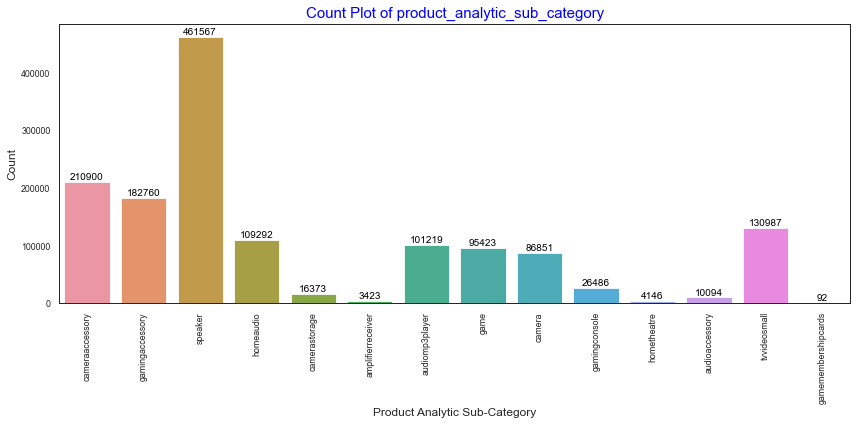

In [717]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='product_analytic_sub_category', data=consumer_df)
plt.xticks(rotation=90)

plt.title('Count Plot of product_analytic_sub_category', fontsize=15, color='blue', alpha=1)
plt.xlabel('Product Analytic Sub-Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [718]:
# Extracting the 3 dataframes 

camera_accessory_df = consumer_df[consumer_df['product_analytic_sub_category']=='cameraaccessory']
gaming_accessory_df = consumer_df[consumer_df['product_analytic_sub_category']=='gamingaccessory']
home_audio_df = consumer_df[consumer_df['product_analytic_sub_category']=='homeaudio']

In [719]:
camera_accessory_df.shape

(210900, 21)

In [720]:
gaming_accessory_df.shape

(182760, 21)

In [721]:
home_audio_df.shape

(109292, 21)

In [722]:
camera_accessory_df.head()

order_date  Year Month Week     gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      1              0   
1 2015-10-19 10:07:22  2015    10   43  6900.0      1              0   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1              0   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1              0   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1              0   

   deliverycdays s1_fact.order_payment_type  sla                 pincode  \
0              0                        cod    5  -7.79175582905735e+018   
1              0                        cod    7   7.33541149097431e+018   
2              0                        cod   10  -7.47768776228657e+018   
3              0                    prepaid    4  -5.83593163877661e+018   
4              0                    prepaid    6   5.34735360997242e+017   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   
2           cameraaccessory               cameraaccessory   
3           cameraaccessory               cameraaccessory   
4           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              cameratripod       7190.0                        0   
1              cameratripod       7190.0                        0   
2              cameratripod       2099.0                        3   
3              cameratripod       2099.0                        3   
4              cameratripod       2099.0                        3   

   listed_price  discount% product_type  payday  holiday  
0        6400.0       11.0      premium       0        0  
1        6900.0        4.0      premium       0        0  
2        1990.0        5.2         mass       0        0  
3        1690.0       19.5         mass       1        0  
4        1618.0       22.9         mass       0        0

In [723]:
# Find columns with only two distinct values and print them in a single line
binary_columns = [col for col in consumer_df.columns if consumer_df[col].nunique() == 2]
print("Binary Columns:", binary_columns)

Binary Columns: ['Year', 's1_fact.order_payment_type', 'product_type', 'payday', 'holiday']


#### Binary encoding

<font color="blue"> for categorical variables that have only two distinct categories </font>

In [724]:
# Create a UDF for binary encoding of categorical variables

def create_binary_column(df, column_name, target_value):
    df[column_name] = df[column_name].apply(lambda x: 1 if x == target_value else 0)

In [725]:
# Applying the UDF to DataFrames
create_binary_column(camera_accessory_df, 's1_fact.order_payment_type', 'cod')
create_binary_column(gaming_accessory_df, 's1_fact.order_payment_type', 'cod')
create_binary_column(home_audio_df, 's1_fact.order_payment_type', 'cod')

create_binary_column(camera_accessory_df, 'product_type', 'mass')
create_binary_column(gaming_accessory_df, 'product_type', 'mass')
create_binary_column(home_audio_df, 'product_type', 'mass')

In [726]:
camera_accessory_df.head()

order_date  Year Month Week     gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      1              0   
1 2015-10-19 10:07:22  2015    10   43  6900.0      1              0   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1              0   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1              0   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1              0   

   deliverycdays  s1_fact.order_payment_type  sla                 pincode  \
0              0                           1    5  -7.79175582905735e+018   
1              0                           1    7   7.33541149097431e+018   
2              0                           1   10  -7.47768776228657e+018   
3              0                           0    4  -5.83593163877661e+018   
4              0                           0    6   5.34735360997242e+017   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   
2           cameraaccessory               cameraaccessory   
3           cameraaccessory               cameraaccessory   
4           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              cameratripod       7190.0                        0   
1              cameratripod       7190.0                        0   
2              cameratripod       2099.0                        3   
3              cameratripod       2099.0                        3   
4              cameratripod       2099.0                        3   

   listed_price  discount%  product_type  payday  holiday  
0        6400.0       11.0             0       0        0  
1        6900.0        4.0             0       0        0  
2        1990.0        5.2             1       0        0  
3        1690.0       19.5             1       1        0  
4        1618.0       22.9             1       0        0

In [727]:
# Rename the columns with appropriate names - cod and mass_market, where 1 indicates yes.

camera_accessory_df.rename(columns={'s1_fact.order_payment_type': 'cod', 'product_type': 'mass_market'}, inplace=True)
gaming_accessory_df.rename(columns={'s1_fact.order_payment_type': 'cod', 'product_type': 'mass_market'}, inplace=True)
home_audio_df.rename(columns={'s1_fact.order_payment_type': 'cod', 'product_type': 'mass_market'}, inplace=True)

In [728]:
camera_accessory_df.head()

order_date  Year Month Week     gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      1              0   
1 2015-10-19 10:07:22  2015    10   43  6900.0      1              0   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1              0   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1              0   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1              0   

   deliverycdays  cod  sla                 pincode product_analytic_category  \
0              0    1    5  -7.79175582905735e+018           cameraaccessory   
1              0    1    7   7.33541149097431e+018           cameraaccessory   
2              0    1   10  -7.47768776228657e+018           cameraaccessory   
3              0    0    4  -5.83593163877661e+018           cameraaccessory   
4              0    0    6   5.34735360997242e+017           cameraaccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               cameraaccessory              cameratripod       7190.0   
1               cameraaccessory              cameratripod       7190.0   
2               cameraaccessory              cameratripod       2099.0   
3               cameraaccessory              cameratripod       2099.0   
4               cameraaccessory              cameratripod       2099.0   

   product_procurement_sla  listed_price  discount%  mass_market  payday  \
0                        0        6400.0       11.0            0       0   
1                        0        6900.0        4.0            0       0   
2                        3        1990.0        5.2            1       0   
3                        3        1690.0       19.5            1       1   
4                        3        1618.0       22.9            1       0   

   holiday  
0        0  
1        0  
2        0  
3        0  
4        0

#### One Hot Encoding

Column 'product_analytic_variable' has multiple values/levels and we will use one-hot encoding method

In [729]:
# Creating dummy variables for the categorical variable
dummy_1 = pd.get_dummies(camera_accessory_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy_2 = pd.get_dummies(gaming_accessory_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy_3 = pd.get_dummies(home_audio_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)

# Adding it to the original dataframes
camera_accessory_df = pd.concat([camera_accessory_df, dummy_1], axis=1)
gaming_accessory_df = pd.concat([gaming_accessory_df, dummy_2], axis=1)
home_audio_df = pd.concat([home_audio_df, dummy_3], axis=1)

In [730]:
# Dropping columns
camera_accessory_df = camera_accessory_df.drop('product_analytic_vertical', axis=1)
gaming_accessory_df = gaming_accessory_df.drop('product_analytic_vertical', axis=1)
home_audio_df = home_audio_df.drop('product_analytic_vertical', axis=1)

In [731]:
print('Shape of camera_accessory_df: {}'.format(camera_accessory_df.shape))
print('Shape of gaming_accessory_df: {}'.format(gaming_accessory_df.shape))
print('Shape of home_audio_df: {}'.format(home_audio_df.shape))

Shape of camera_accessory_df: (210900, 43)
Shape of gaming_accessory_df: (182760, 34)
Shape of home_audio_df: (109292, 30)


__Checking for unique values in all the three dataframes__

In [732]:
camera_accessory_df.describe(include=[object]).T

count  unique                    top    freq
Year                             210900       2                   2016  127087
Month                            210900      13                      5   25125
Week                             210900      51                     42   10426
pincode                        210900.0  9673.0 -9031043207091489792.0   901.0
product_analytic_category        210900       1        cameraaccessory  210900
product_analytic_sub_category    210900       1        cameraaccessory  210900

In [733]:
gaming_accessory_df.describe(include=[object]).T

count  unique                    top    freq
Year                             182760       2                   2016  104781
Month                            182760      13                     10   20594
Week                             182760      52                     42   10996
pincode                        182760.0  9268.0 -9031043207091489792.0  1035.0
product_analytic_category        182760       1         gaminghardware  182760
product_analytic_sub_category    182760       1        gamingaccessory  182760

In [734]:
home_audio_df.describe(include=[object]).T

count  unique                    top    freq
Year                             109292       2                   2015   55574
Month                            109292      13                     10   15973
Week                             109292      49                     42    7935
pincode                        109292.0  7200.0 -9031043207091489792.0   518.0
product_analytic_category        109292       1     entertainmentsmall  109292
product_analytic_sub_category    109292       1              homeaudio  109292

<font color="blue"> _In all 3 dfs, 'product_analytic_category' & 'product_analytic_sub_category' have only 1 unique value. Hence we will drop these 2 columns from all the 3 dataframes._ </font>

In [735]:
# Dropping Columns which are having only one unique value and hence insignificant to the analysis
drop_columns = ['product_analytic_category', 'product_analytic_sub_category']

camera_accessory_df.drop(drop_columns, axis=1, inplace=True)
gaming_accessory_df.drop(drop_columns, axis=1, inplace=True)
home_audio_df.drop(drop_columns, axis=1, inplace=True)

#### Rolling up the data to weekly level

<font color="blue"> The business objective requires all the analysis to be done at weekly level </font>

In [736]:
# Define a dictionary to specify aggregation functions for each column
agg_functions = {
    'gmv': 'sum',
    'discount%': 'mean',
    'deliverybdays': 'mean',
    'deliverycdays': 'mean',
    'sla': 'mean',
    'product_procurement_sla': 'mean',
    'payday': 'sum',
    'holiday': 'sum',
    'cod': 'sum',
    'mass_market': 'sum',
    'product_vertical_cameraaccessory': 'sum',
    'product_vertical_camerabag': 'sum',
    'product_vertical_camerabattery': 'sum',
    'product_vertical_camerabatterycharger': 'sum',
    'product_vertical_camerabatterygrip': 'sum',
    'product_vertical_cameraeyecup': 'sum',
    'product_vertical_camerafilmrolls': 'sum',
    'product_vertical_camerahousing': 'sum',
    'product_vertical_cameraledlight': 'sum',
    'product_vertical_cameramicrophone': 'sum',
    'product_vertical_cameramount': 'sum',
    'product_vertical_cameraremotecontrol': 'sum',
    'product_vertical_cameratripod': 'sum',
    'product_vertical_extensiontube': 'sum',
    'product_vertical_filter': 'sum',
    'product_vertical_flash': 'sum',
    'product_vertical_flashshoeadapter': 'sum',
    'product_vertical_lens': 'sum',
    'product_vertical_reflectorumbrella': 'sum',
    'product_vertical_softbox': 'sum',
    'product_vertical_strap': 'sum',
    'product_vertical_teleconverter': 'sum',
    'product_vertical_telescope': 'sum'
}

# Group by 'Week' and aggregate using the specified functions
camera_accessory_df = camera_accessory_df.groupby(['Week']).agg(agg_functions).reset_index()

# Print the shape of the resulting DataFrame
print('Shape of camera_accessory_df:', camera_accessory_df.shape)

Shape of camera_accessory_df: (51, 34)


In [737]:
# Define a dictionary to specify aggregation functions for each column
agg_functions = {
    'gmv': 'sum',
    'discount%': 'mean',
    'deliverybdays': 'mean',
    'deliverycdays': 'mean',
    'sla': 'mean',
    'product_procurement_sla': 'mean',
    'payday': 'sum',
    'holiday': 'sum',
    'cod': 'sum',
    'mass_market': 'sum',
    'product_vertical_gamecontrolmount': 'sum',
    'product_vertical_gamepad': 'sum',
    'product_vertical_gamingaccessorykit': 'sum',
    'product_vertical_gamingadapter': 'sum',
    'product_vertical_gamingchargingstation': 'sum',
    'product_vertical_gamingheadset': 'sum',
    'product_vertical_gamingkeyboard': 'sum',
    'product_vertical_gamingmemorycard': 'sum',
    'product_vertical_gamingmouse': 'sum',
    'product_vertical_gamingmousepad': 'sum',
    'product_vertical_gamingspeaker': 'sum',
    'product_vertical_joystickgamingwheel': 'sum',
    'product_vertical_motioncontroller': 'sum',
    'product_vertical_tvoutcableaccessory': 'sum'
}

# Group by 'Week' and aggregate using the specified functions
gaming_accessory_df = gaming_accessory_df.groupby(['Week']).agg(agg_functions).reset_index()

# Print the shape of the resulting DataFrame
print('Shape of gaming_accessory_df:', gaming_accessory_df.shape)

Shape of gaming_accessory_df: (52, 25)


In [738]:
# Define a dictionary to specify aggregation functions for each column
agg_functions = {
    'gmv': 'sum',
    'discount%': 'mean',
    'deliverybdays': 'mean',
    'deliverycdays': 'mean',
    'sla': 'mean',
    'product_procurement_sla': 'mean',
    'payday': 'sum',
    'holiday': 'sum',
    'cod': 'sum',
    'mass_market': 'sum',
    'product_vertical_djcontroller': 'sum',
    'product_vertical_dock': 'sum',
    'product_vertical_dockingstation': 'sum',
    'product_vertical_fmradio': 'sum',
    'product_vertical_hifisystem': 'sum',
    'product_vertical_homeaudiospeaker': 'sum',
    'product_vertical_karaokeplayer': 'sum',
    'product_vertical_slingbox': 'sum',
    'product_vertical_soundmixer': 'sum',
    'product_vertical_voicerecorder': 'sum'
}

# Group by 'Week' and aggregate using the specified functions
home_audio_df = home_audio_df.groupby(['Week']).agg(agg_functions).reset_index()

# Print the shape of the resulting DataFrame
print('Shape of home_audio_df:', home_audio_df.shape)

Shape of home_audio_df: (49, 21)


In [739]:
camera_accessory_df.head()

Week      gmv  discount%  deliverybdays  deliverycdays  sla  \
0   01  5.0e+06       49.2        0.0e+00        0.0e+00  5.8   
1   02  4.3e+06       48.3        2.7e-03        2.9e-03  6.4   
2   03  6.9e+06       47.7        7.9e-04        9.9e-04  6.3   
3   04  5.0e+06       43.7        0.0e+00        0.0e+00  6.5   
4   05  5.3e+06       51.1        0.0e+00        0.0e+00  6.2   

   product_procurement_sla  payday  holiday   cod  mass_market  \
0                      2.9       0        0  4194         4820   
1                      2.7    1434        0  2914         3405   
2                      2.7       0        0  3743         4447   
3                      2.7    1043        0  2740         3061   
4                      2.7       0        0  4243         4952   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                45                       280.0   
1                                48                       258.0   
2                                41                       294.0   
3                                53                       320.0   
4                                47                       340.0   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                           577.0                                  259.0   
1                           464.0                                  229.0   
2                           599.0                                  300.0   
3                           616.0                                  222.0   
4                           922.0                                  250.0   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                   3                              3   
1                                   6                              2   
2                                  12                              1   
3                                  10                              0   
4                                   5                              1   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                31                               0   
1                                40                               0   
2                                46                               0   
3                                30                               0   
4                                37                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                1                                  0   
1                                0                                  0   
2                                0                                  2   
3                                1                                  0   
4                                0                                  0   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                            30                                  87.0   
1                            21                                  76.0   
2                            34                                  86.0   
3                            33                                  65.0   
4                            49                                  76.0   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                          755.0                               2   
1                          560.0                               2   
2                          410.0                               3   
3                          360.0                               3   
4                          558.0                               3   

   product_vertical_filter  product_vertical_flash  \
0                    209.0                  1990.0   
1                    211.0                  1064.0   
2                    263.0                  1

#### Creating Holiday Week and Payday Week by Binary encoding

In [740]:
# Creating a UDF for the binary coding. If the value is > 0 then 1 else 0.

def create_binary_column(df, column_name, new_column_name, threshold=0):
    df[new_column_name] = df[column_name].apply(lambda x: 1 if x > threshold else 0)

<font color="blue"> We will apply this function to payday and holiday. </font>

In [741]:
# Applying for creating'payday_wk'
create_binary_column(camera_accessory_df, 'payday', 'payday_wk', threshold=0)
create_binary_column(gaming_accessory_df, 'payday', 'payday_wk', threshold=0)
create_binary_column(home_audio_df, 'payday', 'payday_wk', threshold=0)

In [742]:
# Applying for creating'holiday_wk'
create_binary_column(camera_accessory_df, 'holiday', 'holiday_wk', threshold=0)
create_binary_column(gaming_accessory_df, 'holiday', 'holiday_wk', threshold=0)
create_binary_column(home_audio_df, 'holiday', 'holiday_wk', threshold=0)

In [743]:
camera_accessory_df.head()

Week      gmv  discount%  deliverybdays  deliverycdays  sla  \
0   01  5.0e+06       49.2        0.0e+00        0.0e+00  5.8   
1   02  4.3e+06       48.3        2.7e-03        2.9e-03  6.4   
2   03  6.9e+06       47.7        7.9e-04        9.9e-04  6.3   
3   04  5.0e+06       43.7        0.0e+00        0.0e+00  6.5   
4   05  5.3e+06       51.1        0.0e+00        0.0e+00  6.2   

   product_procurement_sla  payday  holiday   cod  mass_market  \
0                      2.9       0        0  4194         4820   
1                      2.7    1434        0  2914         3405   
2                      2.7       0        0  3743         4447   
3                      2.7    1043        0  2740         3061   
4                      2.7       0        0  4243         4952   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                45                       280.0   
1                                48                       258.0   
2                                41                       294.0   
3                                53                       320.0   
4                                47                       340.0   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                           577.0                                  259.0   
1                           464.0                                  229.0   
2                           599.0                                  300.0   
3                           616.0                                  222.0   
4                           922.0                                  250.0   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                   3                              3   
1                                   6                              2   
2                                  12                              1   
3                                  10                              0   
4                                   5                              1   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                31                               0   
1                                40                               0   
2                                46                               0   
3                                30                               0   
4                                37                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                1                                  0   
1                                0                                  0   
2                                0                                  2   
3                                1                                  0   
4                                0                                  0   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                            30                                  87.0   
1                            21                                  76.0   
2                            34                                  86.0   
3                            33                                  65.0   
4                            49                                  76.0   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                          755.0                               2   
1                          560.0                               2   
2                          410.0                               3   
3                          360.0                               3   
4                          558.0                               3   

   product_vertical_filter  product_vertical_flash  \
0                    209.0                  1990.0   
1                    211.0                  1064.0   
2                    263.0                  1

In [744]:
# Drop the redundant columns

drop_columns = ['payday','holiday']

camera_accessory_df = camera_accessory_df.drop(drop_columns, axis=1)
gaming_accessory_df = gaming_accessory_df.drop(drop_columns, axis=1)
home_audio_df = home_audio_df.drop(drop_columns, axis=1)

In [745]:
camera_accessory_df.head()

Week      gmv  discount%  deliverybdays  deliverycdays  sla  \
0   01  5.0e+06       49.2        0.0e+00        0.0e+00  5.8   
1   02  4.3e+06       48.3        2.7e-03        2.9e-03  6.4   
2   03  6.9e+06       47.7        7.9e-04        9.9e-04  6.3   
3   04  5.0e+06       43.7        0.0e+00        0.0e+00  6.5   
4   05  5.3e+06       51.1        0.0e+00        0.0e+00  6.2   

   product_procurement_sla   cod  mass_market  \
0                      2.9  4194         4820   
1                      2.7  2914         3405   
2                      2.7  3743         4447   
3                      2.7  2740         3061   
4                      2.7  4243         4952   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                45                       280.0   
1                                48                       258.0   
2                                41                       294.0   
3                                53                       320.0   
4                                47                       340.0   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                           577.0                                  259.0   
1                           464.0                                  229.0   
2                           599.0                                  300.0   
3                           616.0                                  222.0   
4                           922.0                                  250.0   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                   3                              3   
1                                   6                              2   
2                                  12                              1   
3                                  10                              0   
4                                   5                              1   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                31                               0   
1                                40                               0   
2                                46                               0   
3                                30                               0   
4                                37                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                1                                  0   
1                                0                                  0   
2                                0                                  2   
3                                1                                  0   
4                                0                                  0   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                            30                                  87.0   
1                            21                                  76.0   
2                            34                                  86.0   
3                            33                                  65.0   
4                            49                                  76.0   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                          755.0                               2   
1                          560.0                               2   
2                          410.0                               3   
3                          360.0                               3   
4                          558.0                               3   

   product_vertical_filter  product_vertical_flash  \
0                    209.0                  1990.0   
1                    211.0                  1064.0   
2                    263.0                  1839.0   
3                    204.0                   617.0   
4                    248.0             

In [746]:
print('Shape of camera_accessory_df: {}'.format(camera_accessory_df.shape))
print('Shape of gaming_accessory_df: {}'.format(gaming_accessory_df.shape))
print('Shape of home_audio_df: {}'.format(home_audio_df.shape))

Shape of camera_accessory_df: (51, 34)
Shape of gaming_accessory_df: (52, 25)
Shape of home_audio_df: (49, 21)


### Merging Dataframes

<font color="blue"> __Leading zeros from the Week needs to be removed as it caused problem during the merging of the data sets.__ </font>

In [747]:
# Getting rid of leading zeros in the Week column from all the three 3 dataframes

camera_accessory_df['Week'] = camera_accessory_df['Week'].apply(lambda x: x.lstrip('0'))
gaming_accessory_df['Week'] = gaming_accessory_df['Week'].apply(lambda x: x.lstrip('0'))
home_audio_df['Week'] = home_audio_df['Week'].apply(lambda x: x.lstrip('0'))

In [748]:
camera_accessory_df.head()

Week      gmv  discount%  deliverybdays  deliverycdays  sla  \
0    1  5.0e+06       49.2        0.0e+00        0.0e+00  5.8   
1    2  4.3e+06       48.3        2.7e-03        2.9e-03  6.4   
2    3  6.9e+06       47.7        7.9e-04        9.9e-04  6.3   
3    4  5.0e+06       43.7        0.0e+00        0.0e+00  6.5   
4    5  5.3e+06       51.1        0.0e+00        0.0e+00  6.2   

   product_procurement_sla   cod  mass_market  \
0                      2.9  4194         4820   
1                      2.7  2914         3405   
2                      2.7  3743         4447   
3                      2.7  2740         3061   
4                      2.7  4243         4952   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                45                       280.0   
1                                48                       258.0   
2                                41                       294.0   
3                                53                       320.0   
4                                47                       340.0   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                           577.0                                  259.0   
1                           464.0                                  229.0   
2                           599.0                                  300.0   
3                           616.0                                  222.0   
4                           922.0                                  250.0   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                   3                              3   
1                                   6                              2   
2                                  12                              1   
3                                  10                              0   
4                                   5                              1   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                31                               0   
1                                40                               0   
2                                46                               0   
3                                30                               0   
4                                37                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                1                                  0   
1                                0                                  0   
2                                0                                  2   
3                                1                                  0   
4                                0                                  0   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                            30                                  87.0   
1                            21                                  76.0   
2                            34                                  86.0   
3                            33                                  65.0   
4                            49                                  76.0   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                          755.0                               2   
1                          560.0                               2   
2                          410.0                               3   
3                          360.0                               3   
4                          558.0                               3   

   product_vertical_filter  product_vertical_flash  \
0                    209.0                  1990.0   
1                    211.0                  1064.0   
2                    263.0                  1839.0   
3                    204.0                   617.0   
4                    248.0             

#### Merge DataFrames

- Left join will be used to ensure that all the rows from the from cameraaccessory_df, gamingaccessory_df, homeaudio_df are retained in the merged cell
- 'Week' to be used as common column to merge camera_accessory_df, gaming_accessory_df, home_audio_df with:
    - media investment df
    - Net Promoter Score df
    - Climate df
    - Special Sales Calendar df
- After merging a check will be done for Null values in case the parent df does not have corresponding data in the target df

##### __Merging Media Investment__

In [749]:
# Using a left join for merging

camera_accessory_df = pd.merge(camera_accessory_df, media_inv_df, how='left', on='Week')
gaming_accessory_df = pd.merge(gaming_accessory_df, media_inv_df, how='left', on='Week')
home_audio_df = pd.merge(home_audio_df, media_inv_df, how='left', on='Week')

In [750]:
# User Defined Function for checking null values

def check_for_null_values(df, df_name):
    null_values_exist = df.isnull().values.any()
    print(f'Null values in {df_name}: {null_values_exist}')

In [751]:
# Check for null values 
check_for_null_values(camera_accessory_df, 'camera_accessory_df')
check_for_null_values(gaming_accessory_df, 'gaming_accessory_df')
check_for_null_values(home_audio_df, 'home_audio_df')

Null values in camera_accessory_df: False
Null values in gaming_accessory_df: False
Null values in home_audio_df: False


In [752]:
# User Defined Function for checking shapes collectively

def print_dataframe_shape(df, df_name):
    print(f'Shape of {df_name}: {df.shape}')

In [753]:
# Check shapes
print_dataframe_shape(camera_accessory_df, 'camera_accessory_df')
print_dataframe_shape(gaming_accessory_df, 'gaming_accessory_df')
print_dataframe_shape(home_audio_df, 'home_audio_df')

Shape of camera_accessory_df: (51, 84)
Shape of gaming_accessory_df: (52, 75)
Shape of home_audio_df: (49, 71)


<font color="blue">
Post Media Investment Merger: <br>
- Shape of camera_accessory_df: (51, 84) <br>
- Shape of gaming_accessory_df: (52, 75) <br>
- Shape of home_audio_df: (49, 71) <br>
</font>

##### __Merge Net Promoter Score__

In [754]:
# Usng a left join for merging
camera_accessory_df = pd.merge(camera_accessory_df, nps_df, how='left', on='Week')
gaming_accessory_df = pd.merge(gaming_accessory_df, nps_df, how='left', on='Week')
home_audio_df = pd.merge(home_audio_df, nps_df, how='left', on='Week')

In [755]:
# Check for null values 
check_for_null_values(camera_accessory_df, 'camera_accessory_df')
check_for_null_values(gaming_accessory_df, 'gaming_accessory_df')
check_for_null_values(home_audio_df, 'home_audio_df')

Null values in camera_accessory_df: False
Null values in gaming_accessory_df: False
Null values in home_audio_df: False


In [756]:
# Check shapes
print_dataframe_shape(camera_accessory_df, 'camera_accessory_df')
print_dataframe_shape(gaming_accessory_df, 'gaming_accessory_df')
print_dataframe_shape(home_audio_df, 'home_audio_df')

Shape of camera_accessory_df: (51, 90)
Shape of gaming_accessory_df: (52, 81)
Shape of home_audio_df: (49, 77)


<font color="blue">
Post Net Promoter Score Merger: <br>
- Shape of camera_accessory_df: (51, 90) <br>
- Shape of gaming_accessory_df: (52, 81) <br>
- Shape of home_audio_df: (49, 77) <br>
</font>

##### __Merge Climate Info__

In [757]:
# Using a left join for mering climate info
camera_accessory_df = pd.merge(camera_accessory_df, climate_info_df, how='left', on='Week')
gaming_accessory_df = pd.merge(gaming_accessory_df, climate_info_df, how='left', on='Week')
home_audio_df = pd.merge(home_audio_df, climate_info_df, how='left', on='Week')

In [758]:
# Check for null values 
check_for_null_values(camera_accessory_df, 'camera_accessory_df')
check_for_null_values(gaming_accessory_df, 'gaming_accessory_df')
check_for_null_values(home_audio_df, 'home_audio_df')

Null values in camera_accessory_df: True
Null values in gaming_accessory_df: True
Null values in home_audio_df: True


In [759]:
# Check shapes
print_dataframe_shape(camera_accessory_df, 'camera_accessory_df')
print_dataframe_shape(gaming_accessory_df, 'gaming_accessory_df')
print_dataframe_shape(home_audio_df, 'home_audio_df')

Shape of camera_accessory_df: (51, 99)
Shape of gaming_accessory_df: (52, 90)
Shape of home_audio_df: (49, 86)


Checking for details of Null values

In [760]:
rows_with_null = camera_accessory_df[camera_accessory_df.isnull().any(axis=1)]
num_rows_with_null = len(rows_with_null)

print('Number of rows with null values in camera_accessory_df:', num_rows_with_null)

Number of rows with null values in camera_accessory_df: 1


<font color="blue"> 
- Number of rows with null values in camera_accessory_df is only 1 <br>
- So we will drop those rows </font>

In [761]:
# Print column names that have null values

null_count = camera_accessory_df.isnull().sum()
columns_with_null = null_count[null_count > 0].index.tolist()

print('Column names with null values in camera_accessory_df:')
print(columns_with_null)

Column names with null values in camera_accessory_df:
['Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']


In [762]:
# Drop nulls
camera_accessory_df.dropna(subset=columns_with_null, inplace=True)
gaming_accessory_df.dropna(subset=columns_with_null, inplace=True)
home_audio_df.dropna(subset=columns_with_null, inplace=True)

In [763]:
# Check for null values 
check_for_null_values(camera_accessory_df, 'camera_accessory_df')
check_for_null_values(gaming_accessory_df, 'gaming_accessory_df')
check_for_null_values(home_audio_df, 'home_audio_df')

Null values in camera_accessory_df: False
Null values in gaming_accessory_df: False
Null values in home_audio_df: False


In [764]:
# Check shapes
print_dataframe_shape(camera_accessory_df, 'camera_accessory_df')
print_dataframe_shape(gaming_accessory_df, 'gaming_accessory_df')
print_dataframe_shape(home_audio_df, 'home_audio_df')

Shape of camera_accessory_df: (50, 99)
Shape of gaming_accessory_df: (51, 90)
Shape of home_audio_df: (48, 86)


<font color="blue">
Post Climate Info Merger: <br>
- Shape of camera_accessory_df: (50, 99) <br>
- Shape of gaming_accessory_df: (51, 90) <br>
- Shape of home_audio_df: (48, 86) <br>
</font>

##### __Merge Special Sales Calendar__

In [765]:
# Using a left join for merging sp slaes calendar 

camera_accessory_df = pd.merge(camera_accessory_df, sp_sales_cal_df, how='left', on='Week')
gaming_accessory_df = pd.merge(gaming_accessory_df, sp_sales_cal_df, how='left', on='Week')
home_audio_df = pd.merge(home_audio_df, sp_sales_cal_df, how='left', on='Week')

In [766]:
# Check for null values 
check_for_null_values(camera_accessory_df, 'camera_accessory_df')
check_for_null_values(gaming_accessory_df, 'gaming_accessory_df')
check_for_null_values(home_audio_df, 'home_audio_df')

Null values in camera_accessory_df: True
Null values in gaming_accessory_df: True
Null values in home_audio_df: True


Checking for nulls and where they are present

In [767]:
rows_null = camera_accessory_df[camera_accessory_df.isnull().any(axis=1)]
num_rows_with_null = len(rows_null)

print('Number of rows with null values in camera_accessory_df:', num_rows_with_null)

Number of rows with null values in camera_accessory_df: 38


In [768]:
# Print column names that have null values

null_count = camera_accessory_df.isnull().sum()
columns_with_null = null_count[null_count > 0].index.tolist()

print('Column names with null values in camera_accessory_df:')
print(columns_with_null)

Column names with null values in camera_accessory_df:
['Sale']


<font color="blue"> Sales column has nul values. Imputing them with 0, implying that there were 0 days in special sales </font>

In [769]:
# Imputing the nulls with 0 

camera_accessory_df['Sale'].fillna(value=0, inplace=True)
gaming_accessory_df['Sale'].fillna(value=0, inplace=True)
home_audio_df['Sale'].fillna(value=0, inplace=True)

In [770]:
# Check for null values 
check_for_null_values(camera_accessory_df, 'camera_accessory_df')
check_for_null_values(gaming_accessory_df, 'gaming_accessory_df')
check_for_null_values(home_audio_df, 'home_audio_df')

Null values in camera_accessory_df: False
Null values in gaming_accessory_df: False
Null values in home_audio_df: False


In [771]:
# Check shapes
print_dataframe_shape(camera_accessory_df, 'camera_accessory_df')
print_dataframe_shape(gaming_accessory_df, 'gaming_accessory_df')
print_dataframe_shape(home_audio_df, 'home_audio_df')

Shape of camera_accessory_df: (50, 100)
Shape of gaming_accessory_df: (51, 91)
Shape of home_audio_df: (48, 87)


<font color="blue">
Post Sales Calendar Merger: <br>
- Shape of camera_accessory_df: (50, 100) <br>
- Shape of gaming_accessory_df: (51, 91) <br>
- Shape of home_audio_df: (48, 87) <br>
</font>

__Few more prep steps__

In [772]:
# Converting any and all str to int
camera_accessory_df['Week'] = camera_accessory_df['Week'].astype('int64')
gaming_accessory_df['Week'] = gaming_accessory_df['Week'].astype('int64')
home_audio_df['Week'] = home_audio_df['Week'].astype('int64')

In [773]:
camera_accessory_df

Week      gmv  discount%  deliverybdays  deliverycdays  sla  \
0      1  5.0e+06       49.2        0.0e+00        0.0e+00  5.8   
1      2  4.3e+06       48.3        2.7e-03        2.9e-03  6.4   
2      4  5.0e+06       43.7        0.0e+00        0.0e+00  6.5   
3      5  5.3e+06       51.1        0.0e+00        0.0e+00  6.2   
4      6  4.7e+06       45.5        0.0e+00        0.0e+00  6.2   
5      7  6.5e+06       47.3        2.4e-03        2.7e-03  6.0   
6      8  5.3e+06       52.8        1.1e-03        1.3e-03  6.1   
7      9  5.0e+06       48.0        6.4e-03        7.4e-03  6.0   
8     10  7.7e+06       49.8        9.9e-03        1.1e-02  6.0   
9     11  4.4e+06       53.1        6.7e-02        7.7e-02  5.9   
10    12  4.5e+06       48.9        2.4e-01        2.9e-01  5.6   
11    13  5.1e+06       50.3        1.5e+00        1.8e+00  5.5   
12    14  5.3e+06       53.1        3.7e+00        4.3e+00  5.8   
13    15  4.3e+06       52.6        3.7e+00        4.3e+00  5.7   
14    16  2.6e+06       52.9        3.3e+00        3.9e+00  4.8   
15    17  8.7e+06       54.0        3.5e+00        4.1e+00  6.1   
16    18  5.6e+06       56.9        3.6e+00        4.1e+00  5.7   
17    19  5.4e+06       55.9        3.6e+00        4.2e+00  5.6   
18    20  5.9e+06       53.7        3.6e+00        4.1e+00  5.4   
19    21  8.0e+06       54.0        3.6e+00        4.2e+00  5.5   
20    22  4.6e+06       54.6        3.7e+00        4.4e+00  5.8   
21    23  4.7e+06       56.4        3.7e+00        4.3e+00  5.6   
22    24  4.9e+06       52.5        3.6e+00        4.2e+00  5.6   
23    25  3.8e+06       48.1        3.6e+00        4.2e+00  5.8   
24    26  2.6e+06       48.3        3.4e+00        3.9e+00  5.2   
25    28  3.9e+06       44.4        0.0e+00        0.0e+00  6.7   
26    29  4.4e+06       44.6        0.0e+00        0.0e+00  6.3   
27    30  4.3e+06       43.7        0.0e+00        0.0e+00  6.3   
28    31  2.8e+06       43.2        0.0e+00        0.0e+00  6.3   
29    32  1.4e+03       17.3        0.0e+00        0.0e+00  7.7   
30    33  3.0e+02       85.0        0.0e+00        0.0e+00  6.0   
31    35  9.0e+02       47.5        0.0e+00        0.0e+00  7.5   
32    36  3.8e+06       43.8        0.0e+00        0.0e+00  6.3   
33    37  4.9e+06       44.9        3.8e-03        4.3e-03  6.2   
34    38  4.7e+06       44.7        0.0e+00        0.0e+00  6.5   
35    39  4.5e+06       48.4        0.0e+00        0.0e+00  6.2   
36    40  4.9e+06       58.0        0.0e+00        0.0e+00  5.6   
37    41  4.0e+06       46.2        2.2e-03        2.9e-03  6.1   
38    42  1.3e+07       53.2        5.8e-04        6.7e-04  6.2   
39    43  4.4e+06       44.9        0.0e+00        0.0e+00  6.8   
40    44  5.2e+06       46.5        1.1e-03        1.3e-03  6.4   
41    45  5.8e+06       48.3        0.0e+00        0.0e+00  6.0   
42    46  4.8e+06       46.2        1.3e-03        1.6e-03  6.5   
43    47  3.9e+06       45.9        2.7e-03        3.0e-03  6.0   
44    48  5.0e+06       42.4        9.4e-04        1.3e-03  6.3   
45    49  5.5e+06       44.7        0.0e+00        0.0e+00  6.2   
46    50  6.2e+06       48.1        0.0e+00        0.0e+00  5.9   
47    51  5.0e+06       42.9        0.0e+00        0.0e+00  6.6   
48    52  6.9e+06       47.4        0.0e+00        0.0e+00  6.3   
49    53  5.2e+06       44.6        0.0e+00        0.0e+00  6.1   

    product_procurement_sla   cod  mass_market  \
0                       2.9  4194         4820   
1                       2.7  2914         3405   
2                       2.7  2740         3061   
3                       2.7  4243         4952   
4                       2.6  2920         3414   
5                       2.7  4850         5752   
6                       2.4  4474         5141   
7                       2.6  3989         4804   
8                       2.6  4114         5150   
9                       2.4  3481         4138   
10                      2.5  3217   

In [774]:
camera_acc_df1 = camera_accessory_df.loc[camera_accessory_df['Week'] >= 28]
camera_acc_df2 = camera_accessory_df.loc[camera_accessory_df['Week'] < 28]

gaming_acc_df1 = gaming_accessory_df.loc[gaming_accessory_df['Week'] >= 28]
gaming_acc_df2 = gaming_accessory_df.loc[gaming_accessory_df['Week'] < 28]

home_aud_df1 = home_audio_df.loc[home_audio_df['Week'] >= 28]
home_aud_df2 = home_audio_df.loc[home_audio_df['Week'] < 28]

camera_accessory_df = camera_acc_df1.append(camera_acc_df2)
gaming_accessory_df = gaming_acc_df1.append(gaming_acc_df2)
home_audio_df = home_aud_df1.append(home_aud_df2)

In [775]:
gaming_accessory_df

Week      gmv  discount%  deliverybdays  deliverycdays  sla  \
25    28  2.7e+06       40.1        0.0e+00        0.0e+00  5.3   
26    29  2.3e+06       42.7        0.0e+00        0.0e+00  5.3   
27    30  2.6e+06       37.1        0.0e+00        0.0e+00  5.4   
28    31  1.9e+06       42.7        8.7e-03        1.0e-02  5.6   
29    32  2.3e+03       62.9        0.0e+00        0.0e+00  7.2   
30    33  4.9e+03       38.6        1.2e+00        1.5e+00  6.0   
31    34  6.0e+02       50.4        0.0e+00        0.0e+00  2.0   
32    35  2.3e+03       45.0        0.0e+00        0.0e+00  6.0   
33    36  2.2e+06       38.4        0.0e+00        0.0e+00  5.1   
34    37  2.4e+06       37.8        7.9e-04        1.2e-03  5.5   
35    38  2.6e+06       39.0        0.0e+00        0.0e+00  5.8   
36    39  2.5e+06       40.3        0.0e+00        0.0e+00  5.9   
37    40  2.4e+06       39.0        1.6e-03        2.0e-03  5.8   
38    41  2.1e+06       37.1        8.9e-04        8.9e-04  5.5   
39    42  7.3e+06       52.7        5.5e-04        6.4e-04  5.2   
40    43  2.3e+06       39.5        3.7e-03        4.1e-03  6.0   
41    44  2.8e+06       44.1        0.0e+00        0.0e+00  5.8   
42    45  3.5e+06       45.5        0.0e+00        0.0e+00  5.1   
43    46  2.6e+06       41.8        5.1e-03        6.0e-03  5.9   
44    47  2.1e+06       41.6        0.0e+00        0.0e+00  5.7   
45    48  2.8e+06       44.6        1.1e-03        1.3e-03  5.8   
46    49  3.0e+06       41.3        0.0e+00        0.0e+00  5.9   
47    50  3.4e+06       45.9        0.0e+00        0.0e+00  5.5   
48    51  2.8e+06       46.5        0.0e+00        0.0e+00  6.3   
49    52  4.3e+06       51.5        0.0e+00        0.0e+00  5.6   
50    53  3.3e+06       47.4        0.0e+00        0.0e+00  5.8   
0      1  3.4e+06       46.9        0.0e+00        0.0e+00  5.8   
1      2  3.1e+06       44.4        1.0e-03        1.0e-03  5.8   
2      4  3.0e+06       43.5        0.0e+00        0.0e+00  6.0   
3      5  3.1e+06       44.4        3.4e-03        4.3e-03  5.8   
4      6  3.0e+06       46.9        9.8e-04        1.2e-03  5.6   
5      7  3.8e+06       49.9        4.0e-03        4.6e-03  5.4   
6      8  3.3e+06       49.3        1.7e-02        1.9e-02  5.9   
7      9  3.5e+06       47.5        9.0e-03        1.1e-02  5.7   
8     10  4.6e+06       46.9        2.3e-02        2.7e-02  5.3   
9     11  3.1e+06       40.5        6.9e-02        8.0e-02  5.7   
10    12  3.2e+06       40.7        4.0e-01        4.8e-01  5.9   
11    13  3.5e+06       41.1        1.7e+00        1.9e+00  5.6   
12    14  3.6e+06       40.7        3.7e+00        4.3e+00  5.9   
13    15  3.0e+06       43.3        3.7e+00        4.3e+00  5.7   
14    16  1.8e+06       44.7        3.1e+00        3.7e+00  4.6   
15    17  5.7e+06       45.4        3.7e+00        4.2e+00  6.2   
16    18  3.5e+06       45.4        3.5e+00        4.1e+00  5.8   
17    19  3.7e+06       49.4        3.6e+00        4.2e+00  5.6   
18    20  3.7e+06       50.1        3.6e+00        4.2e+00  5.5   
19    21  5.1e+06       47.6        3.6e+00        4.2e+00  5.2   
20    22  4.0e+06       43.7        3.6e+00        4.2e+00  5.4   
21    23  3.5e+06       43.8        3.7e+00        4.3e+00  5.5   
22    24  3.3e+06       44.0        3.6e+00        4.1e+00  5.7   
23    25  3.1e+06       42.0        3.5e+00        4.1e+00  5.6   
24    26  1.8e+06       40.9        3.3e+00        3.8e+00  4.9   

    product_procurement_sla   cod  mass_market  \
25                      3.2  2100         2630   
26                      2.7  2048         2448   
27                      2.6  1868         2091   
28                      3.2  1375         1350   
29                      2.2     3            3   
30                      2.5     3            3   
31                      2.5     2            2   
32                      3.2     4            4   
33                      2.7  2161         2559   
34                 

## EDA

In [776]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439613 entries, 0 to 1473147
Data columns (total 21 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   order_date                     1439613 non-null  datetime64[ns]
 1   Year                           1439613 non-null  object        
 2   Month                          1439613 non-null  object        
 3   Week                           1439613 non-null  object        
 4   gmv                            1439613 non-null  float64       
 5   units                          1439613 non-null  int64         
 6   deliverybdays                  1439613 non-null  int64         
 7   deliverycdays                  1439613 non-null  int64         
 8   s1_fact.order_payment_type     1439613 non-null  object        
 9   sla                            1439613 non-null  int64         
 10  pincode                        1439613 non-null  objec

In [777]:
consumer_df.shape

(1439613, 21)

__The business objective requires deeper understanding for 3 product sub catgeories - Camera Accessory, Gaming Accessory and Home Audio__

In [778]:
# Flitering the data as per the 3 prd sub cat's
selected_cats = ['cameraaccessory', 'gamingaccessory', 'homeaudio']
prd_sub_cat = consumer_df[consumer_df['product_analytic_sub_category'].isin(selected_cats)]

In [779]:
prd_sub_cat.shape

(502952, 21)

In [780]:
prd_sub_cat.dtypes

order_date                       datetime64[ns]
Year                                     object
Month                                    object
Week                                     object
gmv                                     float64
units                                     int64
deliverybdays                             int64
deliverycdays                             int64
s1_fact.order_payment_type               object
sla                                       int64
pincode                                  object
product_analytic_category                object
product_analytic_sub_category            object
product_analytic_vertical                object
product_mrp                             float64
product_procurement_sla                   int64
listed_price                            float64
discount%                               float64
product_type                             object
payday                                    int32
holiday                                 

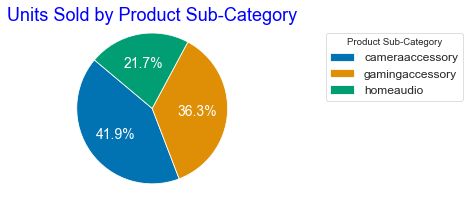

In [781]:
# Calculate the count of units sold by product sub-category
units_sold_by_subcategory = prd_sub_cat['product_analytic_sub_category'].value_counts()

# Create a pie chart with white value labels
plt.figure(figsize=(3, 3))
plt.pie(units_sold_by_subcategory, labels=None, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'color': 'white'})
plt.title('Units Sold by Product Sub-Category', fontsize=18, color='blue', alpha=1)  # Larger title fontsize
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a legend for category labels outside the plot
legend_labels = units_sold_by_subcategory.index
plt.legend(legend_labels, title="Product Sub-Category", bbox_to_anchor=(1.5, 1), loc='upper left', fontsize=12)

# Show the pie chart
plt.show()

<font color="blue">
Camera accessories had the highest sales followed by gaming accessory and home audio.</font>

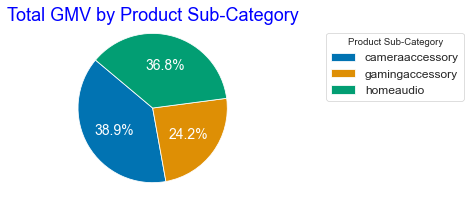

In [782]:
# Calculate the total GMV by product sub-category
total_gmv_by_subcategory = prd_sub_cat.groupby('product_analytic_sub_category')['gmv'].sum()

# Create a pie chart with white value labels
plt.figure(figsize=(3, 3))
plt.pie(total_gmv_by_subcategory, labels=None, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'color': 'white'})
plt.title('Total GMV by Product Sub-Category', fontsize=18, color='blue', alpha=1)  # Larger title fontsize
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a legend for category labels outside the plot
legend_labels = total_gmv_by_subcategory.index
plt.legend(legend_labels, title="Product Sub-Category", bbox_to_anchor=(1.5, 1), loc='upper left', fontsize=12)

# Show the pie chart
plt.show()

<font color="blue">
Camera accessories and homeaudio have generated almost same revenue.</font>

#### Top Products by Revenue

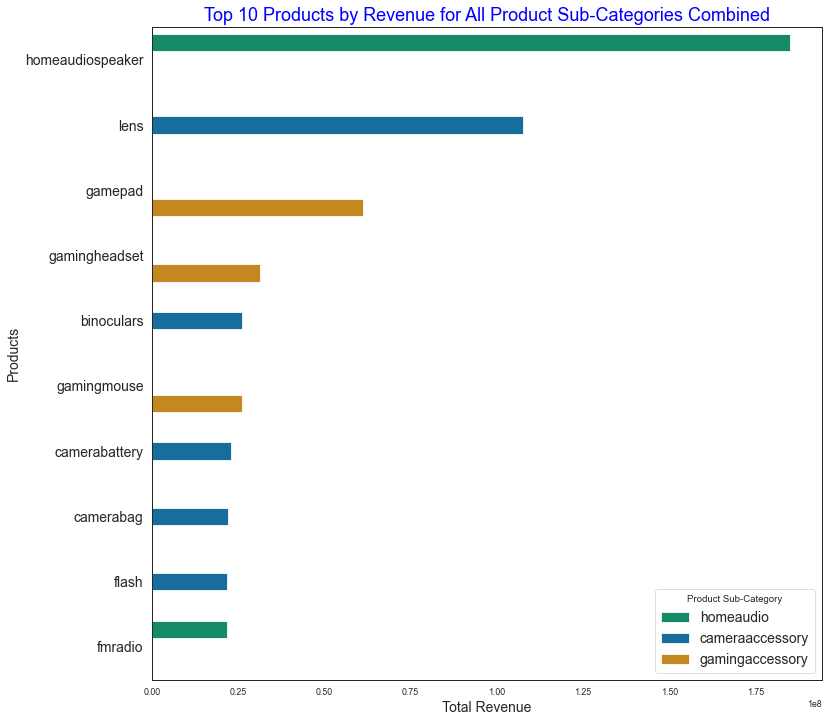

In [783]:
# Filter the data for the three product sub-categories
selected_categories = ['cameraaccessory', 'gamingaccessory', 'homeaudio']
filtered_data = prd_sub_cat[prd_sub_cat['product_analytic_sub_category'].isin(selected_categories)]

# Group the data by product vertical and calculate the total revenue
vertical_revenue = filtered_data.groupby(['product_analytic_sub_category', 'product_analytic_vertical'])['gmv'].sum().reset_index()

# Sort the data by revenue in descending order
vertical_revenue = vertical_revenue.sort_values(by='gmv', ascending=False)

# Select the top 10 product verticals for all sub-categories combined
top_verticals = vertical_revenue.head(10)

# Define a custom color palette for the product sub-categories
custom_palette = {"cameraaccessory": sns.color_palette("colorblind")[0],  # Blue
                  "gamingaccessory": sns.color_palette("colorblind")[1],  # Orange
                  "homeaudio": sns.color_palette("colorblind")[2]}  # Green

# Create a bar plot with 'product_analytic_sub_category' as hue and the custom color palette
plt.figure(figsize=(12, 12))
ax = sns.barplot(x='gmv', y='product_analytic_vertical', hue='product_analytic_sub_category', data=top_verticals, palette=custom_palette, ci=None)
plt.title('Top 10 Products by Revenue for All Product Sub-Categories Combined', fontsize=18, color='blue', alpha=1)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Products', fontsize=14)

# Increase the font size of the y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

plt.legend(title='Product Sub-Category', fontsize=14)
plt.show()

<font color="blue">
The highest revenue was generated by home audio speakers within the home audio category, with lens sales in camera accessories and gamepads in gaming accessories following closely behind.
</font>

#### Top Products by Units Sold

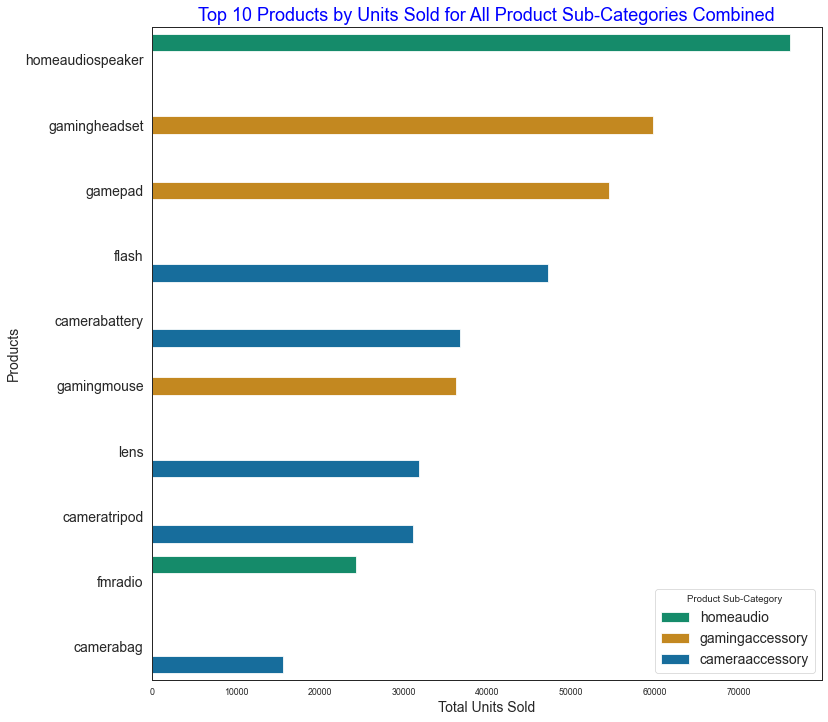

In [784]:
# Filter the data for the three product sub-categories
selected_categories = ['cameraaccessory', 'gamingaccessory', 'homeaudio']
filtered_data = prd_sub_cat[prd_sub_cat['product_analytic_sub_category'].isin(selected_categories)]

# Group the data by product vertical and calculate the total units sold
vertical_units_sold = filtered_data.groupby(['product_analytic_sub_category', 'product_analytic_vertical'])['units'].sum().reset_index()

# Sort the data by units sold in descending order
vertical_units_sold = vertical_units_sold.sort_values(by='units', ascending=False)

# Select the top 10 product verticals for all sub-categories combined
top_verticals = vertical_units_sold.head(10)

# Define a custom color palette for the product sub-categories
custom_palette = {"cameraaccessory": sns.color_palette("colorblind")[0],  # Blue
                  "gamingaccessory": sns.color_palette("colorblind")[1],  # Orange
                  "homeaudio": sns.color_palette("colorblind")[2]}  # Green

# Create a bar plot with 'product_analytic_sub_category' as hue and the custom color palette
plt.figure(figsize=(12, 12))
ax = sns.barplot(x='units', y='product_analytic_vertical', hue='product_analytic_sub_category', data=top_verticals, palette=custom_palette, ci=None)
plt.title('Top 10 Products by Units Sold for All Product Sub-Categories Combined', fontsize=18, color='blue', alpha=1)
plt.xlabel('Total Units Sold', fontsize=14)
plt.ylabel('Products', fontsize=14)

# Increase the font size of the y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

# Move the legend to the bottom right side
plt.legend(title='Product Sub-Category', fontsize=14, loc='lower right')
plt.show()

<font color="blue">
The highest units sold were by home audio speakers within the home audio category, with gamingheadset and gamepads in gaming accessories following closely behind.
</font>

#### Monthly and Weekly Sale by Product Categories

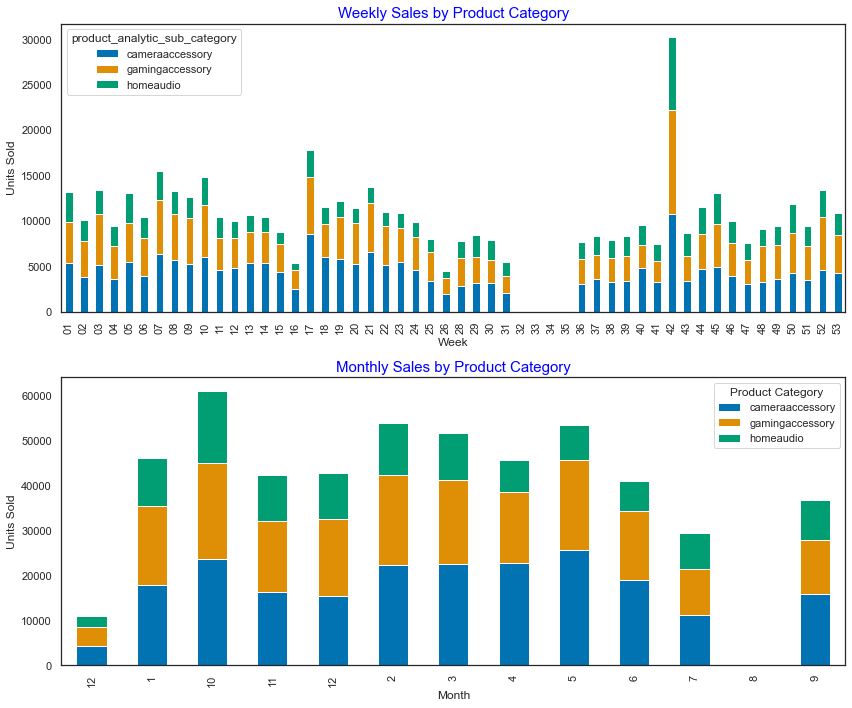

In [785]:
# Set the style of the plots
sns.set(style="white")

# Set the color palette to a colorblind-friendly palette
sns.set_palette('colorblind')

# List of product categories
product_categories = ['camera_accessory', 'gaming_accessory', 'home_audio']

# Create subplots for 'Week' and 'Month'
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Create a stacked bar chart for 'Week'
week_data = prd_sub_cat.groupby(['Week', 'product_analytic_sub_category'])['units'].sum().unstack()
ax_week = axes[0]
week_data.plot(kind='bar', stacked=True, ax=ax_week)
ax_week.set_title('Weekly Sales by Product Category', fontsize=15, color='blue', alpha=1)
ax_week.set_xlabel('Week', fontsize=12)
ax_week.set_ylabel('Units Sold', fontsize=12)

# Create a stacked bar chart for 'Month'
month_data = prd_sub_cat.groupby(['Month', 'product_analytic_sub_category'])['units'].sum().unstack()
ax_month = axes[1]
month_data.plot(kind='bar', stacked=True, ax=ax_month)
ax_month.set_title('Monthly Sales by Product Category', fontsize=15, color='blue', alpha=1)
ax_month.set_xlabel('Month', fontsize=12)
ax_month.set_ylabel('Units Sold', fontsize=12)

# Add a legend for product categories
ax_month.legend(title='Product Category', loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

<font color="blue">
- Maximum units have been sold:
    - in the week number 42 during the thanks giving week <br>
    - in the month of Octover <br>
</font>

<Figure size 1152x432 with 0 Axes>

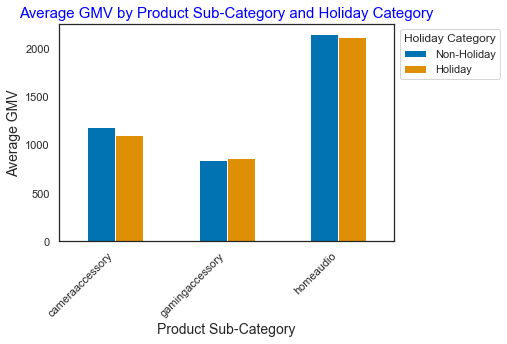

In [786]:
# Filter the data to include only the desired categories
selected_categories = ['cameraaccessory', 'gamingaccessory', 'homeaudio']
filtered_data = prd_sub_cat[prd_sub_cat['product_analytic_sub_category'].isin(selected_categories)]

# Create a pivot table with average GMV
pivot_table = pd.pivot_table(filtered_data, values='gmv', index='product_analytic_sub_category', columns='holiday', aggfunc='mean')

# Create a bar chart
plt.figure(figsize=(16, 6))
ax = pivot_table.plot(kind='bar', stacked=False)
plt.title('Average GMV by Product Sub-Category and Holiday Category', fontsize=15, color='blue', alpha=1)
plt.xlabel('Product Sub-Category', fontsize=14)
plt.ylabel('Average GMV', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Move the legend outside the plot
plt.legend(title='Holiday Category', loc='upper left', labels=['Non-Holiday', 'Holiday'], bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

<font color="blue">
- There is not much difference between holiday and non holiday revenue for the 3 sub categories
</font>

#### Distribution of items sold at diff discount% segments

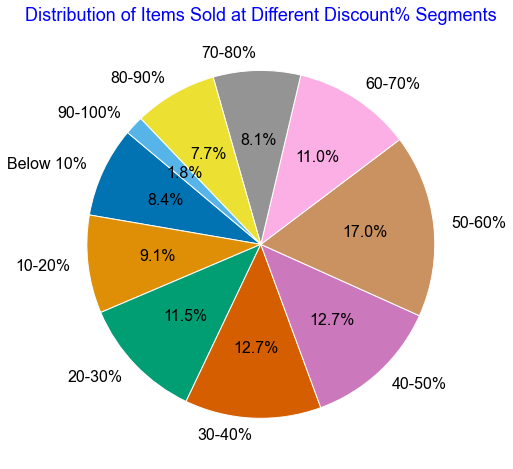

In [787]:
# Define the cut points and label names
cut_points = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
label_names = ["Below 10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]

# Create a histogram-like bar chart
plt.figure(figsize=(8, 8))
plt.pie(prd_sub_cat['discount%'].value_counts(bins=cut_points, sort=False), labels=label_names, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16, 'color': 'black'})
plt.title('Distribution of Items Sold at Different Discount% Segments', fontsize=18, color='blue', alpha=1)

# Show the pie chart
plt.show()

<font color="blue">
- Maximum sale of items happen when the discount is between 50 to 60%
</font>

#### Discount % for Units sold and Revenue

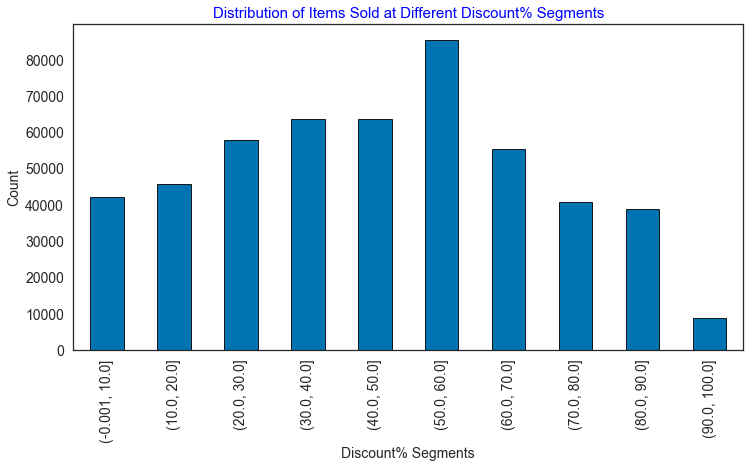

In [788]:
# Define the cut points and label names
cut_points = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
label_names = ["Below 10%", "Between 10-20%", "Between 20-30%", "Between 30-40%", "Between 40-50%", "Between 50-60%", "Between 60-70%", "Between 70-80%", "Between 80-90%", "Between 90-100%"]

# Calculate the counts of items in each discount% segment
discount_counts = prd_sub_cat['discount%'].value_counts(bins=cut_points, sort=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
discount_counts.plot(kind='bar', edgecolor='k')
plt.title('Distribution of Items Sold at Different Discount% Segments', fontsize=15, color='blue', alpha=1)
plt.xlabel('Discount% Segments', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the bar chart
plt.show()

<font color="blue">
- Sales increases as % of discount increases 50-60% then starts dropping again.
</font>

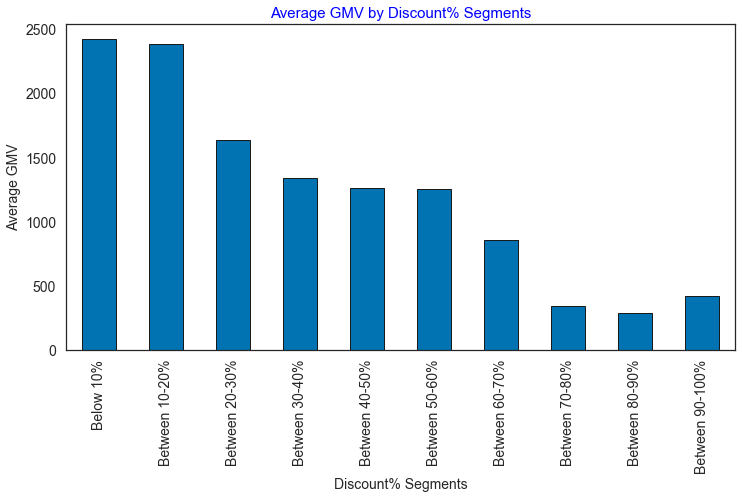

In [789]:
# Define the cut points and label names
cut_points = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
label_names = ["Below 10%", "Between 10-20%", "Between 20-30%", "Between 30-40%", "Between 40-50%", "Between 50-60%", "Between 60-70%", "Between 70-80%", "Between 80-90%", "Between 90-100%"]

# Create a pivot table with average GMV
average_gmv = prd_sub_cat.groupby(pd.cut(prd_sub_cat['discount%'], bins=cut_points, labels=label_names))['gmv'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
average_gmv.plot(kind='bar', edgecolor='k')
plt.title('Average GMV by Discount% Segments', fontsize=15, color='blue', alpha=1)
plt.xlabel('Discount% Segments', fontsize=14)
plt.ylabel('Average GMV', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the bar chart
plt.show()

<font color="blue">
- Revenue is highest when the discount is upto 20%, after that it starts falling.<br>
- This indicates that the company should offer upto 20% discount which will be profitable for it.
</font>

#### GMV by Product Sub Cat with Payment Type

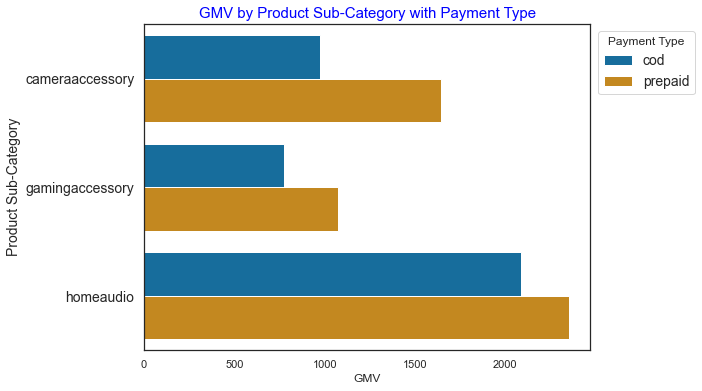

In [790]:
# Create the bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gmv', y='product_analytic_sub_category', hue='s1_fact.order_payment_type', data=prd_sub_cat, ci=None)
plt.title('GMV by Product Sub-Category with Payment Type', fontsize=15, color='blue', alpha=1)
plt.xlabel('GMV', fontsize=12)
plt.ylabel('Product Sub-Category', fontsize=14)

# Move the legend to the upper right corner outside of the plot
ax.legend(loc='upper right', title='Payment Type', bbox_to_anchor=(1.25, 1), fontsize=14)

plt.yticks(fontsize=14)

# Show the bar chart
plt.show()

#### Units Sold Product Sub Cat with Payment Type

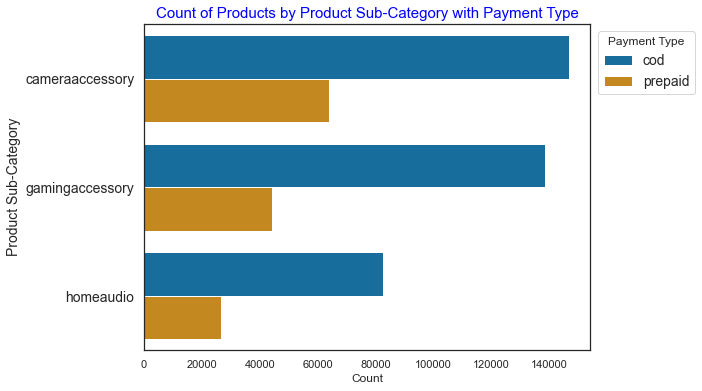

In [791]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='product_analytic_sub_category', hue='s1_fact.order_payment_type', data=prd_sub_cat)
plt.title('Count of Products by Product Sub-Category with Payment Type', fontsize=15, color='blue', alpha=1)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Sub-Category', fontsize=14)

# Move the legend to the upper right corner outside of the plot
ax.legend(loc='upper right', title='Payment Type', bbox_to_anchor=(1.25, 1), fontsize=14)

plt.yticks(fontsize=14)

# Show the count plot
plt.show()

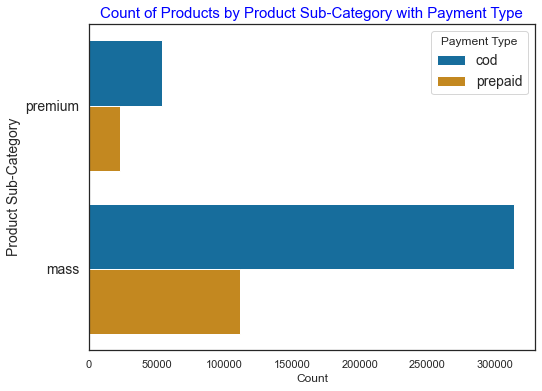

In [792]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='product_type', hue='s1_fact.order_payment_type', data=prd_sub_cat)
plt.title('Count of Products by Product Sub-Category with Payment Type', fontsize=15, color='blue', alpha=1)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Sub-Category', fontsize=14)

# Move the legend to the upper right corner outside of the plot
ax.legend(loc='upper right', title='Payment Type', fontsize=14)

plt.yticks(fontsize=14)

# Show the count plot
plt.show()

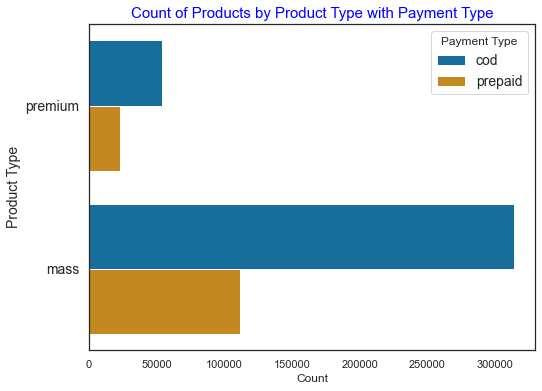

In [793]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='product_type', hue='s1_fact.order_payment_type', data=prd_sub_cat)
plt.title('Count of Products by Product Type with Payment Type', fontsize=15, color='blue', alpha=1)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Type', fontsize=14)

# Move the legend to the upper right corner outside of the plot
ax.legend(loc='upper right', title='Payment Type', fontsize=14)

plt.yticks(fontsize=14)

# Show the count plot
plt.show()

#### Top 10 Product Verticals by Revenue

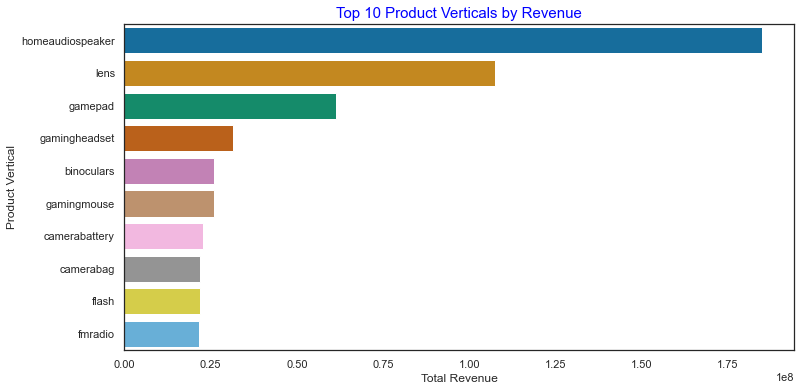

In [794]:
# Filter the data for the three product sub-categories
selected_categories = ['cameraaccessory', 'gamingaccessory', 'homeaudio']
filtered_data = prd_sub_cat[prd_sub_cat['product_analytic_sub_category'].isin(selected_categories)]

# Group the data by product vertical and calculate the total revenue
vertical_revenue = filtered_data.groupby('product_analytic_vertical')['gmv'].sum().reset_index()

# Sort the data by revenue in descending order
vertical_revenue = vertical_revenue.sort_values(by='gmv', ascending=False)

# Select the top 10 product verticals
top_10_verticals = vertical_revenue.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='gmv', y='product_analytic_vertical', data=top_10_verticals)
plt.title('Top 10 Product Verticals by Revenue', fontsize=15, color='blue', alpha=1)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Vertical', fontsize=12)
plt.show()

<font color="blue">
The highest revenue was generated by home audio speakers within the home audio category, with lens sales in camera accessories and gamepads in gaming accessories following closely behind.
</font>

#### % of Product Types for Different Sub-Categories

<Figure size 720x432 with 0 Axes>

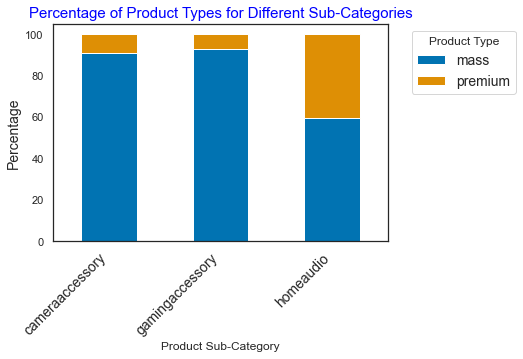

In [795]:
# Filter the data for the desired product sub-categories
selected_categories = ['cameraaccessory', 'gamingaccessory', 'homeaudio']
filtered_data = prd_sub_cat[prd_sub_cat['product_analytic_sub_category'].isin(selected_categories)]

# Group the data by product sub-category and product type
grouped_data = filtered_data.groupby(['product_analytic_sub_category', 'product_type'])['units'].sum().unstack()

# Calculate the percentage
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
percentage_data.plot(kind='bar', stacked=True)
plt.title('Percentage of Product Types for Different Sub-Categories', fontsize=15, color='blue', alpha=1)
plt.xlabel('Product Sub-Category', fontsize=12)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

<font color="blue">
- The majority of units sold were from the mass market category, with Camera and Gaming Accessories being the top-selling subcategories within this segment.<br>
- Among luxury products, Home Audio items stood out as the most favored by consumers.<br>
</font>

#### % of Payment Types for Diff Sub-Categories

<Figure size 720x432 with 0 Axes>

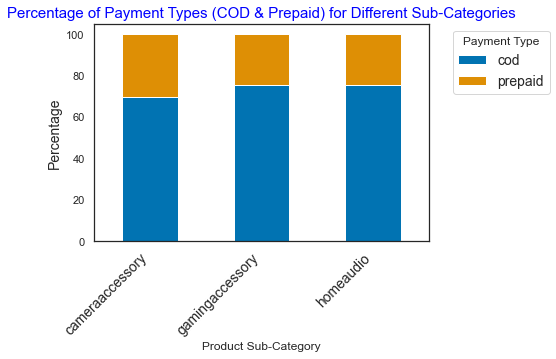

In [796]:
# Filter the data for the desired product sub-categories
selected_categories = ['cameraaccessory', 'gamingaccessory', 'homeaudio']
filtered_data = prd_sub_cat[prd_sub_cat['product_analytic_sub_category'].isin(selected_categories)]

# Group the data by product sub-category and payment type
grouped_data = filtered_data.groupby(['product_analytic_sub_category', 's1_fact.order_payment_type'])['units'].sum().unstack()

# Calculate the percentage
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
percentage_data.plot(kind='bar', stacked=True)
plt.title('Percentage of Payment Types (COD & Prepaid) for Different Sub-Categories', fontsize=15, color='blue', alpha=1)
plt.xlabel('Product Sub-Category', fontsize=12)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

In [797]:
camera_accessory_df.columns

Index(['Week', 'gmv', 'discount%', 'deliverybdays', 'deliverycdays', 'sla',
       'product_procurement_sla', 'cod', 'mass_market',
       'product_vertical_cameraaccessory', 'product_vertical_camerabag',
       'product_vertical_camerabattery',
       'product_vertical_camerabatterycharger',
       'product_vertical_camerabatterygrip', 'product_vertical_cameraeyecup',
       'product_vertical_camerafilmrolls', 'product_vertical_camerahousing',
       'product_vertical_cameraledlight', 'product_vertical_cameramicrophone',
       'product_vertical_cameramount', 'product_vertical_cameraremotecontrol',
       'product_vertical_cameratripod', 'product_vertical_extensiontube',
       'product_vertical_filter', 'product_vertical_flash',
       'product_vertical_flashshoeadapter', 'product_vertical_lens',
       'product_vertical_reflectorumbrella', 'product_vertical_softbox',
       'product_vertical_strap', 'product_vertical_teleconverter',
       'product_vertical_telescope', 'payday_wk', 

In [798]:
# Creating a UDF for pairplot

def create_pairplot(data, product_category):

    # Create the pair plot
    pair_plot = sns.pairplot(data, x_vars=['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
                                           'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],
                            y_vars='gmv', size=4, aspect=0.5, kind='reg')

    # Calculate the position for the title
    title_position = len(pair_plot.axes) // 2

    # Set the title in the center
    pair_plot.fig.suptitle(f"Revenue Vs Advertisement Spends for {product_category}", y=1.02, fontsize=15, color='blue', alpha=1)

    # Display the plot
    plt.show()

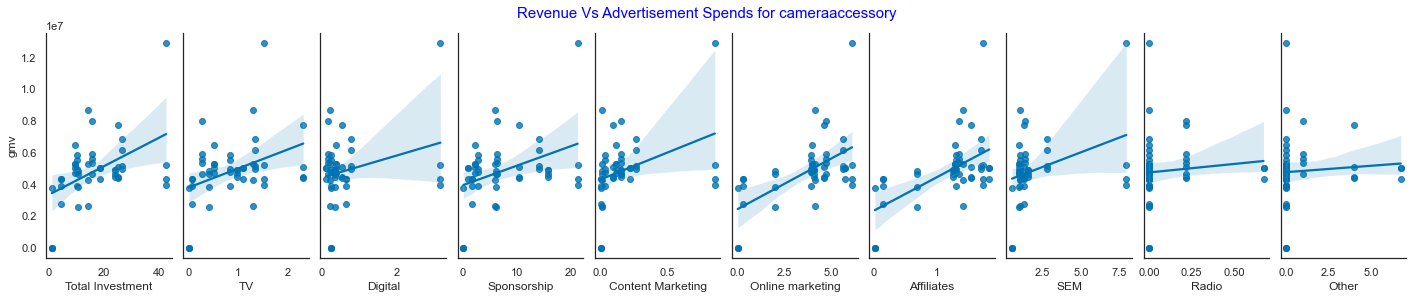

In [799]:
create_pairplot(camera_accessory_df, 'cameraaccessory')

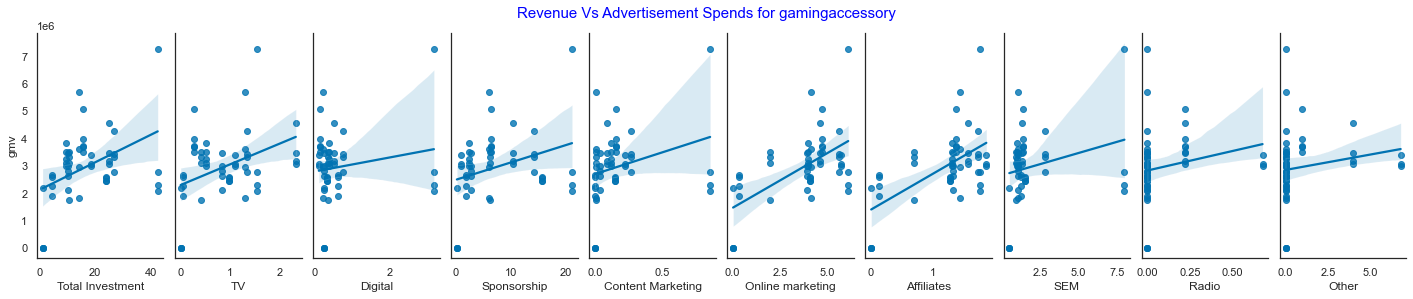

In [800]:
create_pairplot(gaming_accessory_df, 'gamingaccessory')

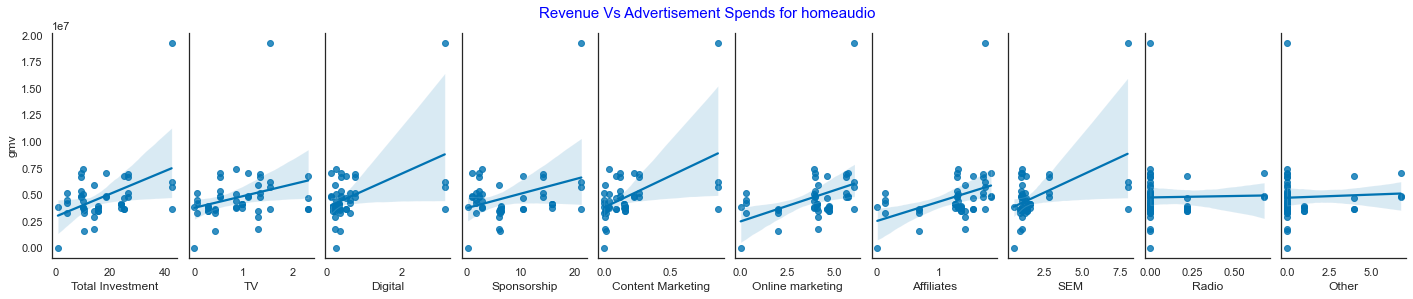

In [801]:
create_pairplot(home_audio_df, 'homeaudio')

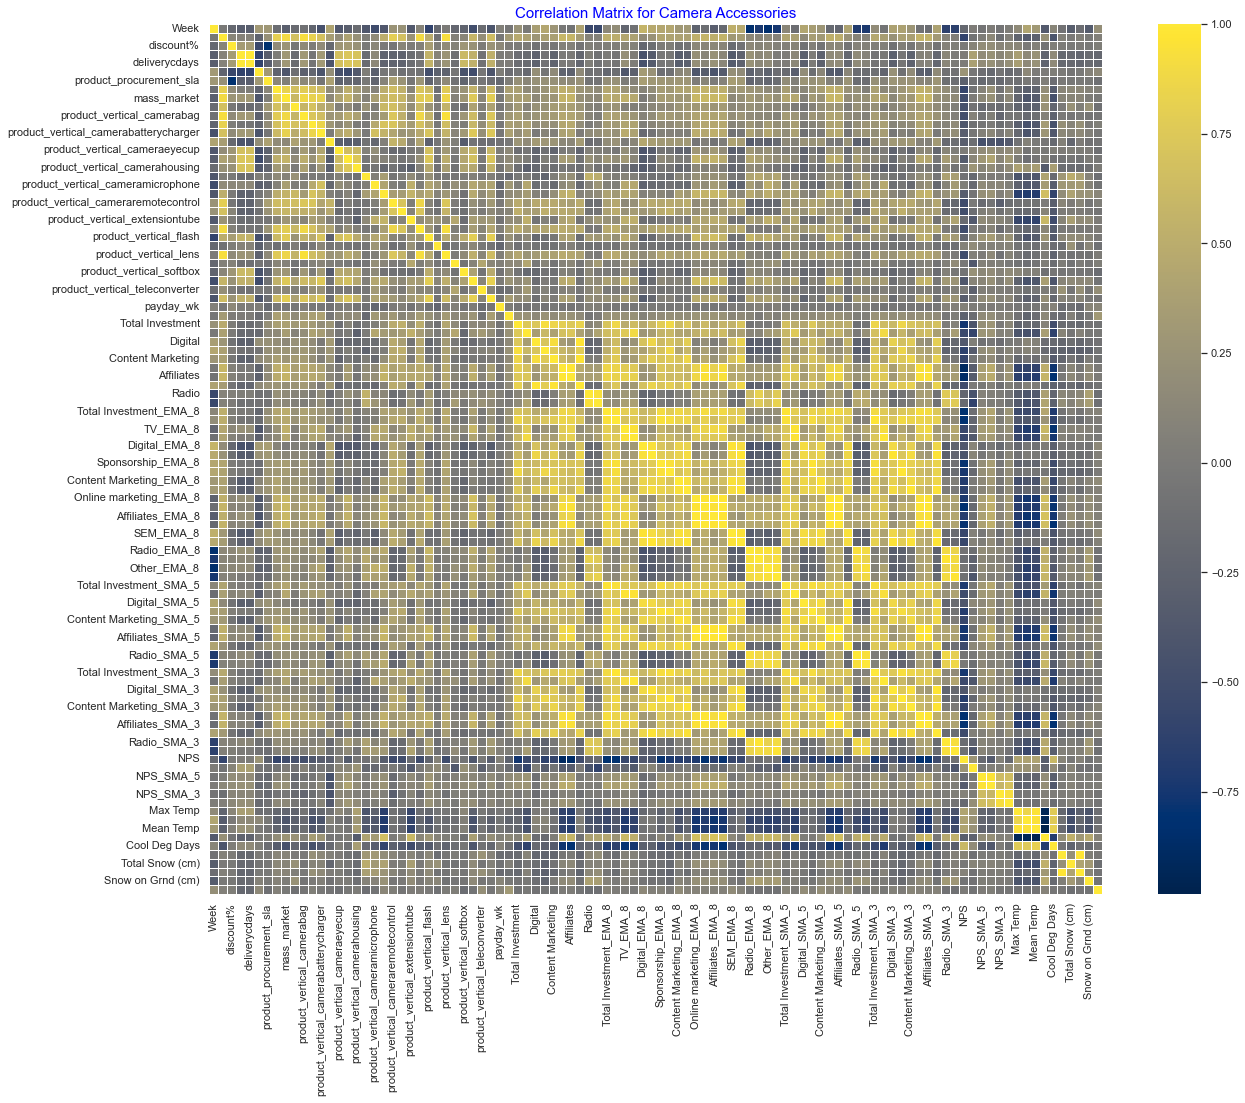

In [802]:
# Calculate the correlation matrix
correlation_matrix = camera_accessory_df.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='cividis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Camera Accessories', fontsize=15, color='blue', alpha=1)
plt.show()

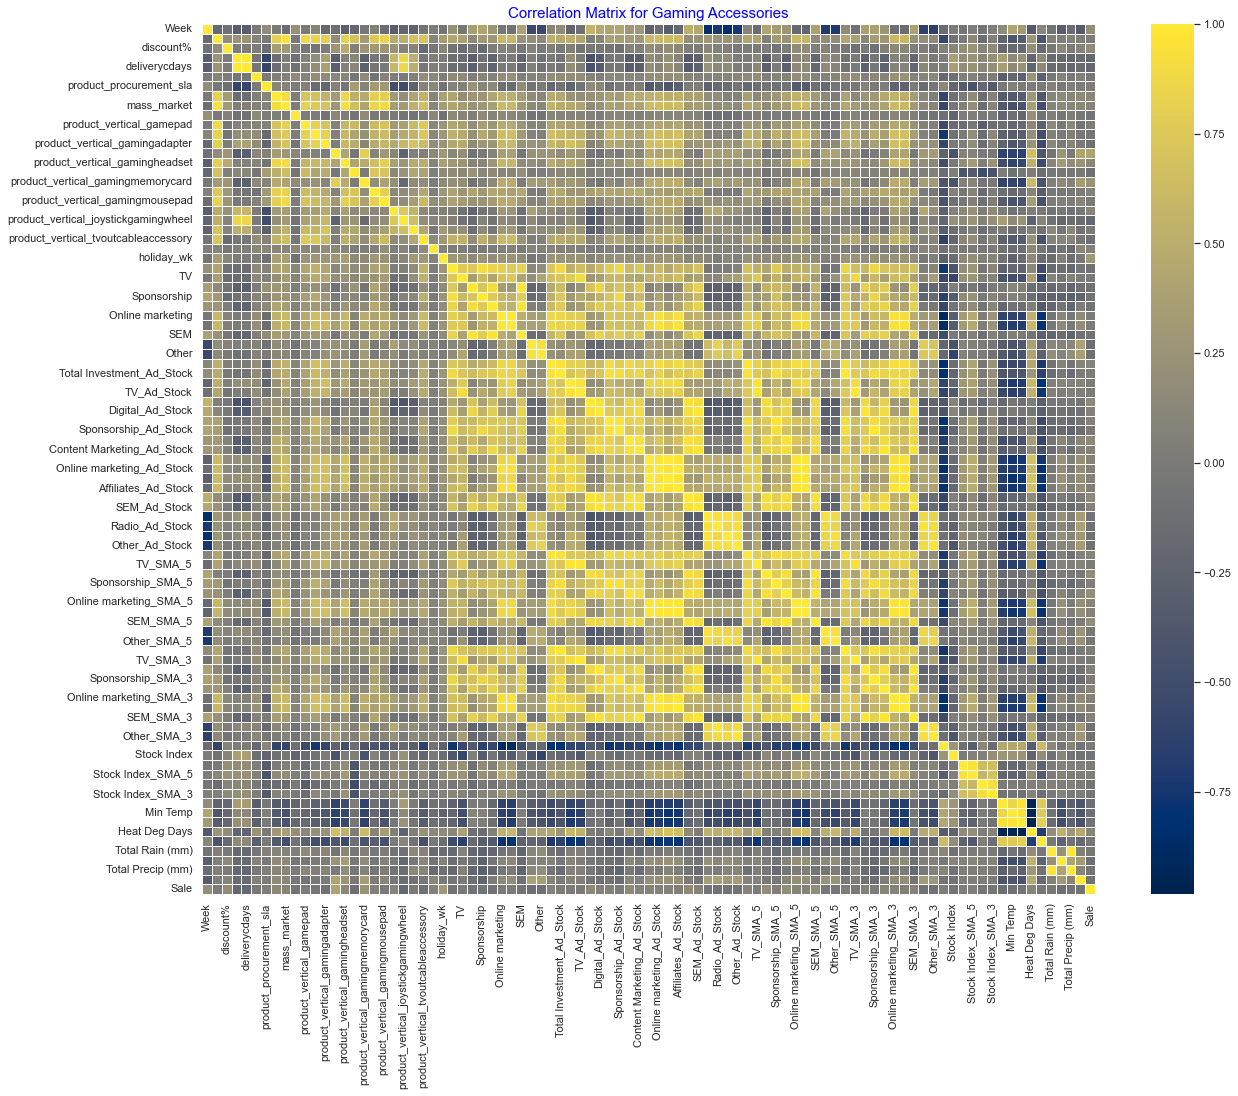

In [803]:
# Calculate the correlation matrix
correlation_matrix = gaming_accessory_df.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='cividis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Gaming Accessories', fontsize=15, color='blue', alpha=1)
plt.show()

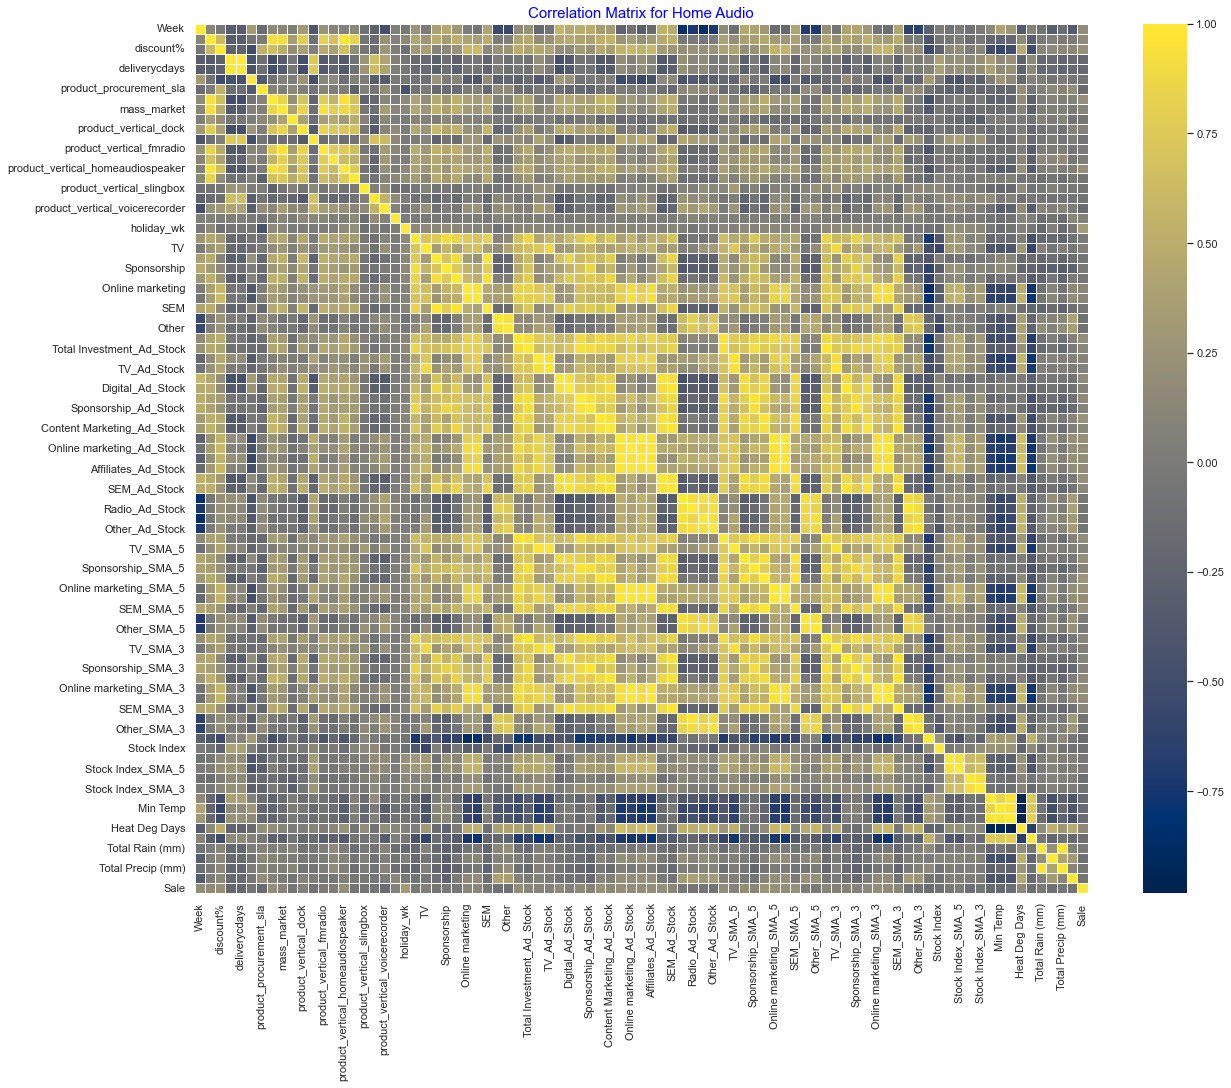

In [804]:
# Calculate the correlation matrix
correlation_matrix = home_audio_df.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='cividis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Home Audio', fontsize=15, color='blue', alpha=1)
plt.show()

#### Trend of NPS and Stock Index by Week

In [805]:
nps_df.columns

Index(['Week', 'NPS', 'Stock Index', 'NPS_SMA_5', 'Stock Index_SMA_5',
       'NPS_SMA_3', 'Stock Index_SMA_3'],
      dtype='object')

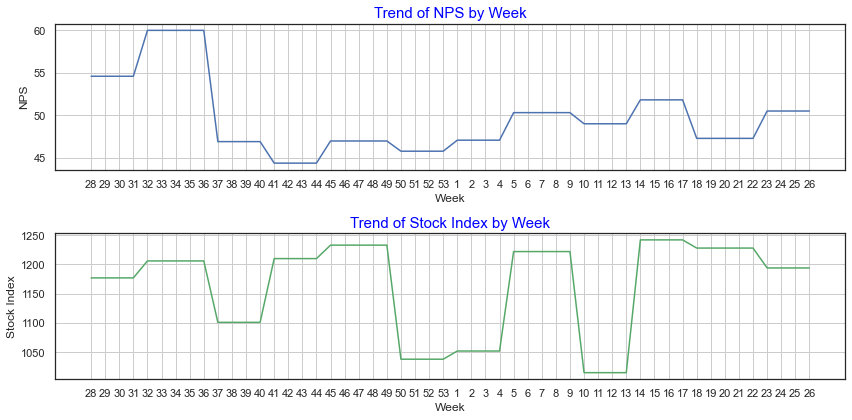

In [806]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a subplot for NPS trend
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(nps_df['Week'], nps_df['NPS'], linestyle='-', color='b')
plt.title('Trend of NPS by Week', fontsize=15, color='blue', alpha=1)
plt.xlabel('Week')
plt.ylabel('NPS')
plt.grid(True)

# Create a subplot for Stock Index trend
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(nps_df['Week'], nps_df['Stock Index'], linestyle='-', color='g')
plt.title('Trend of Stock Index by Week', fontsize=15, color='blue', alpha=1)
plt.xlabel('Week')
plt.ylabel('Stock Index')
plt.grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [807]:
media_inv_df.columns

Index(['Week', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'Total Investment_EMA_8', 'Total Investment_Ad_Stock',
       'TV_EMA_8', 'TV_Ad_Stock', 'Digital_EMA_8', 'Digital_Ad_Stock',
       'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing_EMA_8',
       'Content Marketing_Ad_Stock', 'Online marketing_EMA_8',
       'Online marketing_Ad_Stock', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock',
       'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio_EMA_8', 'Radio_Ad_Stock',
       'Other_EMA_8', 'Other_Ad_Stock', 'Total Investment_SMA_5', 'TV_SMA_5',
       'Digital_SMA_5', 'Sponsorship_SMA_5', 'Content Marketing_SMA_5',
       'Online marketing_SMA_5', 'Affiliates_SMA_5', 'SEM_SMA_5',
       'Radio_SMA_5', 'Other_SMA_5', 'Total Investment_SMA_3', 'TV_SMA_3',
       'Digital_SMA_3', 'Sponsorship_SMA_3', 'Content Marketing_SMA_3',
       'Online marketing_SMA_3', 'Affiliates_SMA_3', 'SEM_SM

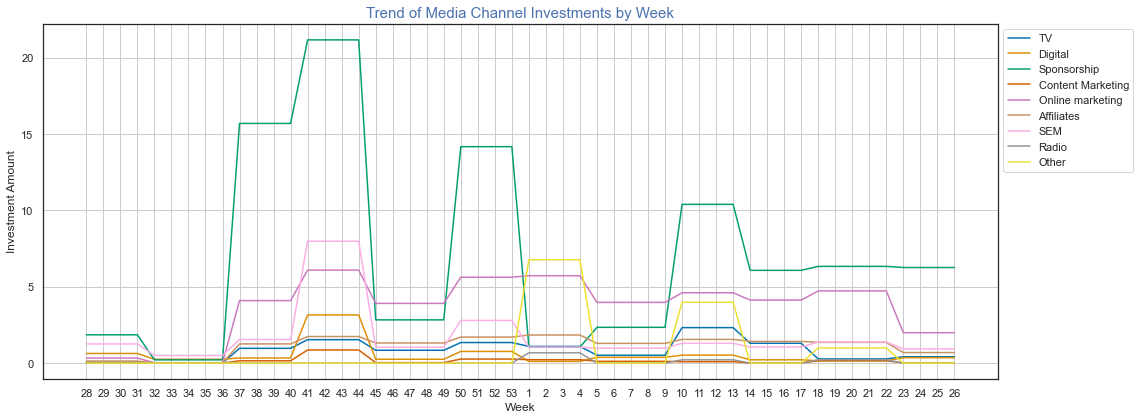

In [808]:
# Set the figure size
plt.figure(figsize=(16, 6))

# Define the columns for media channels
media_channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other']

# Iterate through the media channels and create a line plot for each
for channel in media_channels:
    plt.plot(media_inv_df['Week'], media_inv_df[channel], label=channel, linestyle='-')

# Title and labels
plt.title('Trend of Media Channel Investments by Week', fontsize=15, color='b', alpha=1)
plt.xlabel('Week')
plt.ylabel('Investment Amount')

# Show a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add a grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<font color="blue">
- The majority of investment has been done in the Sponsorhip Media Channel
</font>

#### Trend for GMV, %Discount and Total Media Investment

In [809]:
cameraaccessory = camera_accessory_df.copy()
gamingaccessory = gaming_accessory_df.copy()
homeaudio = home_audio_df.copy()

In [810]:
cameraaccessory['Week'] = cameraaccessory['Week'].apply(str)
gamingaccessory['Week'] = gamingaccessory['Week'].apply(str)
homeaudio['Week'] = homeaudio['Week'].apply(str)

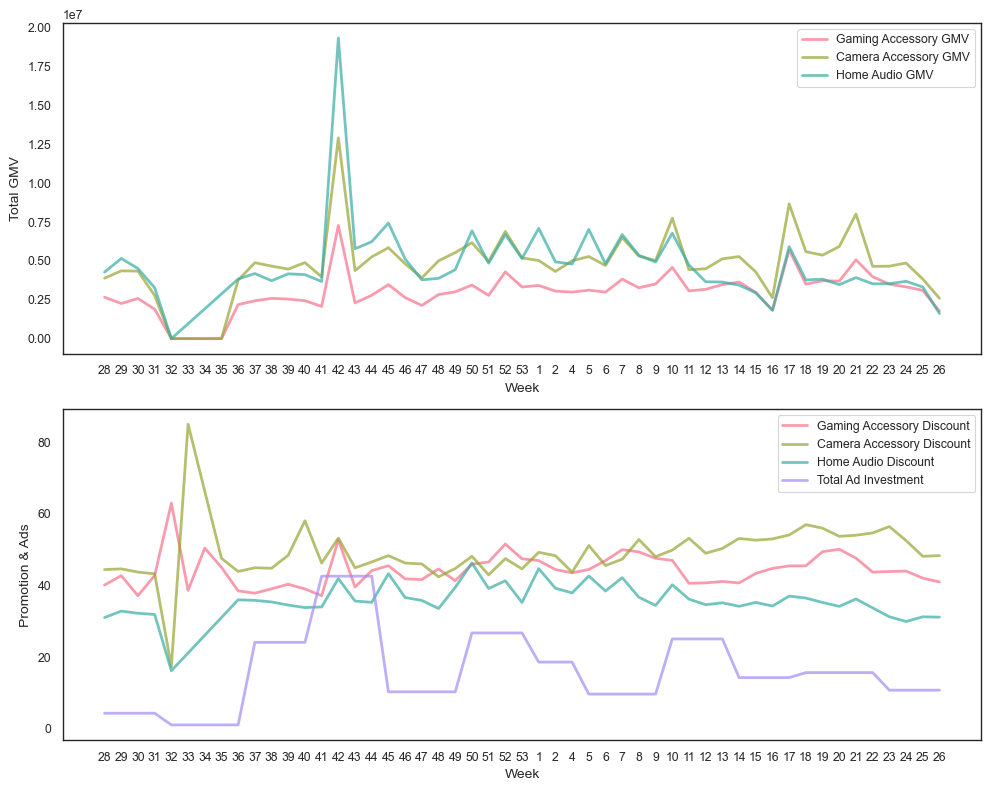

In [811]:
plt.figure(figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k', frameon=True)
sns.set_style("white")  # white/whitegrid/dark/ticks
sns.set_context("paper")  # talk/poster

# Define color-blind friendly colors
color_palette = sns.color_palette("husl", 4)

# subplot 1
plt.subplot(2, 1, 1)
plt.plot(gamingaccessory.iloc[:, 0], gamingaccessory.iloc[:, 1], '-', color=color_palette[0], linewidth=2, alpha=0.7)
plt.plot(cameraaccessory.iloc[:, 0], cameraaccessory.iloc[:, 1], '-', color=color_palette[1], linewidth=2, alpha=0.7)
plt.plot(homeaudio.iloc[:, 0], homeaudio.iloc[:, 1], '-', color=color_palette[2], linewidth=2, alpha=0.7)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Total GMV', fontsize=10)
plt.legend(['Gaming Accessory GMV', 'Camera Accessory GMV', 'Home Audio GMV'])

# subplot 2
plt.subplot(2, 1, 2)
plt.plot(gamingaccessory.iloc[:, 0], gamingaccessory.iloc[:, 2], '-', color=color_palette[0], linewidth=2, alpha=0.7)
plt.plot(cameraaccessory.iloc[:, 0], cameraaccessory.iloc[:, 2], '-', color=color_palette[1], linewidth=2, alpha=0.7)
plt.plot(homeaudio.iloc[:, 0], homeaudio.iloc[:, 2], '-', color=color_palette[2], linewidth=2, alpha=0.7)
plt.plot(homeaudio.iloc[:, 0], homeaudio.iloc[:, 21], '-', color=color_palette[3], linewidth=2, alpha=0.7)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Promotion & Ads', fontsize=10)
plt.legend(['Gaming Accessory Discount', 'Camera Accessory Discount', 'Home Audio Discount', 'Total Ad Investment'])

# Display the plot
plt.tight_layout()
plt.show()

<font color="blue">
- The avg discount provided on home audio products is the lowers.<br>
- Week 32 to 35 saw lowest total ad investment and the revenue was also lowest. During the same period discounts were also low except for camera accessory.<br>
- As seen in previous analysis, week 42 (thanksgiving week) revenue for all three categories was highest and during same duration the total amount spend on ads was also highest.<br>
</font>

### Extracting data for Modelling

In [812]:
# Copying the orignial dataframes
cameraaccessory_model_df = camera_accessory_df.copy()
gamingaccessory_model_df = gaming_accessory_df.copy()
homeaudio_model_df = home_audio_df.copy()

## __Section A: Model building, comparison, evaluation, best fit equation and recommendations.__

In [813]:
# User Defined Function for checking shapes collectively

def print_dataframe_shape(df, df_name):
    print(f'Shape of {df_name}: {df.shape}')

In [814]:
# Check shapes
print_dataframe_shape(cameraaccessory_model_df, 'cameraaccessory_model_df')
print_dataframe_shape(gamingaccessory_model_df, 'gamingaccessory_model_df')
print_dataframe_shape(homeaudio_model_df, 'homeaudio_model_df')

Shape of cameraaccessory_model_df: (50, 100)
Shape of gamingaccessory_model_df: (51, 91)
Shape of homeaudio_model_df: (48, 87)


Shape of cameraaccessory_model_df: (50, 100) <br>
Shape of gamingaccessory_model_df: (51, 91) <br>
Shape of homeaudio_model_df: (48, 87) <br>

In [815]:
cameraaccessory_model_df.head()

Week      gmv  discount%  deliverybdays  deliverycdays  sla  \
25    28  3.9e+06       44.4            0.0            0.0  6.7   
26    29  4.4e+06       44.6            0.0            0.0  6.3   
27    30  4.3e+06       43.7            0.0            0.0  6.3   
28    31  2.8e+06       43.2            0.0            0.0  6.3   
29    32  1.4e+03       17.3            0.0            0.0  7.7   

    product_procurement_sla   cod  mass_market  \
25                      2.8  1817         2379   
26                      2.8  1986         2632   
27                      2.9  2019         2640   
28                      2.8  1385         1753   
29                      4.0     1            3   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
25                                46                       330.0   
26                                36                       356.0   
27                                48                       294.0   
28                                44                       184.0   
29                                 0                         0.0   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
25                           628.0                                  200.0   
26                           713.0                                  216.0   
27                           749.0                                  261.0   
28                           471.0                                  174.0   
29                             2.0                                    0.0   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
25                                  18                              0   
26                                   9                              0   
27                                  11                              0   
28                                  11                              0   
29                                   0                              0   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
25                                 0                               0   
26                                 0                               0   
27                                 0                               0   
28                                 0                               0   
29                                 0                               0   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
25                                0                                  0   
26                                0                                  0   
27                                0                                  0   
28                                0                                  0   
29                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
25                             4                                 137.0   
26                            11                                 141.0   
27                             7                                 107.0   
28                             2                                  84.0   
29                             0                                   0.0   

    product_vertical_cameratripod  product_vertical_extensiontube  \
25                          430.0                               0   
26                          492.0                               0   
27                          463.0                               0   
28                          359.0                               1   
29                            1.0                               0   

    product_vertical_filter  product_vertical_flash  \
25                    220.0                    26.0   
26                    186.0                    27.0   
27                    186.0                    31.0   
28                    107.0    

<font color="blue">All values in week are unique and not useful for modelling purposes <br> So we will drop 'Week' from all three dataframes </font>

In [816]:
# Dropping 'Week' the three dataframes

cameraaccessory_model_df = cameraaccessory_model_df.drop('Week', axis=1)
gamingaccessory_model_df = gamingaccessory_model_df.drop('Week', axis=1)
homeaudio_model_df = homeaudio_model_df.drop('Week', axis=1)

In [817]:
# Check shapes
print_dataframe_shape(cameraaccessory_model_df, 'cameraaccessory_model_df')
print_dataframe_shape(gamingaccessory_model_df, 'gamingaccessory_model_df')
print_dataframe_shape(homeaudio_model_df, 'homeaudio_model_df')

Shape of cameraaccessory_model_df: (50, 99)
Shape of gamingaccessory_model_df: (51, 90)
Shape of homeaudio_model_df: (48, 86)


## <span style="color:brown">Linear Regression Models</span></strong>

### <span style="color:magenta">Additive Model</span></strong>

#### Feature Scaling using Standard Scaler

In [818]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cameraaccessory_model_df[cameraaccessory_model_df.columns]=scaler.fit_transform(cameraaccessory_model_df[cameraaccessory_model_df.columns])
gamingaccessory_model_df[gamingaccessory_model_df.columns]=scaler.fit_transform(gamingaccessory_model_df[gamingaccessory_model_df.columns])
homeaudio_model_df[homeaudio_model_df.columns]=scaler.fit_transform(homeaudio_model_df[homeaudio_model_df.columns])

In [819]:
cameraaccessory_model_df.head()

gmv  discount%  deliverybdays  deliverycdays  sla  \
25 -0.5       -0.6           -0.6           -0.6  1.2   
26 -0.2       -0.6           -0.6           -0.6  0.4   
27 -0.2       -0.7           -0.6           -0.6  0.5   
28 -1.0       -0.7           -0.6           -0.6  0.4   
29 -2.4       -4.0           -0.6           -0.6  3.2   

    product_procurement_sla  cod  mass_market  \
25                      0.3 -0.7         -0.8   
26                      0.4 -0.6         -0.7   
27                      0.5 -0.6         -0.7   
28                      0.4 -1.0         -1.2   
29                      3.3 -2.0         -2.2   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
25                               0.5                     1.9e-01   
26                              -0.2                     3.8e-01   
27                               0.6                    -7.7e-02   
28                               0.4                    -8.9e-01   
29                              -2.6                    -2.2e+00   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
25                            -0.1                                   -0.5   
26                             0.2                                   -0.4   
27                             0.3                                   -0.1   
28                            -0.7                                   -0.7   
29                            -2.4                                   -1.9   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
25                                 2.7                           -0.7   
26                                 0.6                           -0.7   
27                                 1.0                           -0.7   
28                                 1.0                           -0.7   
29                                -1.6                           -0.7   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
25                              -1.3                            -0.4   
26                              -1.3                            -0.4   
27                              -1.3                            -0.4   
28                              -1.3                            -0.4   
29                              -1.3                            -0.4   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
25                             -0.3                               -0.5   
26                             -0.3                               -0.5   
27                             -0.3                               -0.5   
28                             -0.3                               -0.5   
29                             -0.3                               -0.5   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
25                          -1.2                               7.0e-01   
26                          -0.7                               7.8e-01   
27                          -0.9                               6.3e-02   
28                          -1.3                              -4.2e-01   
29                          -1.5                              -2.2e+00   

    product_vertical_cameratripod  product_vertical_extensiontube  \
25                           -0.4                            -0.8   
26                           -0.3                            -0.8   
27                           -0.3                            -0.8   
28                           -0.6                            -0.3   
29                           -1.5                            -0.8   

    product_vertical_filter  product_vertical_flash  \
25                  1.3e-02                    -1.2   
26                 -2.7e-01                    -1.2   
27                 -2.7e-01                    -1.2   
28                 -9.1e-01                    -1.2   
29                 -1.8e+00               

#### Creating Train and Test Data Sets

In [820]:
from sklearn.model_selection import train_test_split

# Doing the train-test split on each df

cameraaccessory_train, cameraaccessory_test = train_test_split(cameraaccessory_model_df,train_size = 0.7, test_size = 0.3, random_state = 100)
gamingaccessory_train, gamingaccessory_test = train_test_split(gamingaccessory_model_df, train_size = 0.7, test_size = 0.3, random_state = 100)
homeaudio_train, homeaudio_test = train_test_split(homeaudio_model_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Making X and Y sets for model building from train dataset

In [821]:
# Making x_ and y_ sets from the _train and _test data sets 

y_cameraaccessory_train = cameraaccessory_train.pop('gmv')
X_cameraaccessory_train = cameraaccessory_train

y_gamingaccessory_train = gamingaccessory_train.pop('gmv')
X_gamingaccessory_train = gamingaccessory_train

y_homeaudio_train = homeaudio_train.pop('gmv')
X_homeaudio_train = homeaudio_train

#### Making X and Y sets for model building from test dataset

In [822]:
# Making x_ and y_ sets from the _train and _test data sets 

y_cameraaccessory_test = cameraaccessory_test.pop('gmv')
X_cameraaccessory_test = cameraaccessory_test

y_gamingaccessory_test = gamingaccessory_test.pop('gmv')
X_gamingaccessory_test = gamingaccessory_test

y_homeaudio_test = homeaudio_test.pop('gmv')
X_homeaudio_test = homeaudio_test

#### Building LR model for Camera Accessory

In [823]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

cameraaccessory_lr = LinearRegression().fit(X_cameraaccessory_train, y_cameraaccessory_train)
y_cameraaccessory_test_pred = cameraaccessory_lr.predict(X_cameraaccessory_test)

print('R2 Score: {}'.format(r2_score(y_cameraaccessory_test, y_cameraaccessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory_test, y_cameraaccessory_test_pred)))

R2 Score: 0.6841865471381279
Mean Squared Error: 0.31388489383812046


<font color="blue">Camera Accessory Simple Linear Regression: R2 Score 0.68 and MSE 0.31 </font>

#### K Fold cross validation for Camera Accessory

Preprocessing step to seperate target variable and input features

In [824]:
y_cameraaccessory = cameraaccessory_model_df.pop('gmv')
X_cameraaccessory = cameraaccessory_model_df

In [825]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model
cameraaccessory_model_cv = LinearRegression().fit(X_cameraaccessory, y_cameraaccessory)

# Perform cross-validated predictions
cameraaccessory_predictions_cv = cross_val_predict(cameraaccessory_model_cv, X_cameraaccessory, y_cameraaccessory, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_cameraaccessory, cameraaccessory_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_cameraaccessory, cameraaccessory_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: -0.8573388758665004
Mean Squared Error: 1.8573388758665006


<font color="blue">Evaluation metrics for Camera Accessory Simple Linear Regression: <br>
    Cross-Predicted Accuracy: -0.86 & Mean Squared Error: 1.86 <br>
__Conclusion__: the negative R-squared and the relatively high MSE suggest that the linear regression model that we built for the "cameraaccessory" data is not be a good fit for the data, and its predictive performance is not satisfactory. We will have to explore other modeling techniques</font>

#### Determining Top 5 Most Important Features for the Gaming Accessory Category Using Linear Regression Model

In [826]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model
cameraaccessory_lr_model_parameters = list(cameraaccessory_lr.coef_)
cameraaccessory_lr_model_parameters.insert(0, cameraaccessory_lr.intercept_)
cameraaccessory_lr_model_parameters = [round(x, 3) for x in cameraaccessory_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_cameraaccessory_test.columns.tolist()
cols.insert(0, "constant")
cameraaccessory_lr_coef_df = pd.DataFrame(list(zip(cols, cameraaccessory_lr_model_parameters)), columns=['Features', 'Coefficients'])

# Remove rows with zero coefficients
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df[cameraaccessory_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print only the top 5 most important features
print(cameraaccessory_lr_coef_df.head(5))

                          Features  Coefficients
25           product_vertical_lens         0.356
9       product_vertical_camerabag         0.205
10  product_vertical_camerabattery         0.196
15  product_vertical_camerahousing         0.160
38                Online marketing         0.142


<font color="blue">__The top 5 important features for gaming accessory that influence gmv are:__<br>
                        Features:  Coefficients<br>
           product_vertical_lens:         0.356<br>
      product_vertical_camerabag:         0.205<br>
  product_vertical_camerabattery:         0.196<br>
  product_vertical_camerahousing:         0.160<br>
                Online marketing:         0.142<br> </font>

#### Building LR model for Gaming Accessory

In [827]:
gamingaccessory_lr = LinearRegression().fit(X_gamingaccessory_train, y_gamingaccessory_train)
y_gamingaccessory_test_pred = gamingaccessory_lr.predict(X_gamingaccessory_test)

print('R2 Score: {}'.format(r2_score(y_gamingaccessory_test, y_gamingaccessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_gamingaccessory_test, y_gamingaccessory_test_pred)))

R2 Score: 0.9238382100963604
Mean Squared Error: 0.06148782214893963


<font color="blue">Gaming Accessory Simple Linear Regression: R2 Score 0.92 and MSE 0.06 </font>

#### K Fold cross validation for Gaming Accessory

Preprocessing step to seperate target variable and input features

In [828]:
y_gamingaccessory = gamingaccessory_model_df.pop('gmv')
X_gamingaccessory = gamingaccessory_model_df

In [829]:
# Fit a Linear Regression model
gamingaccessory_model_cv = LinearRegression().fit(X_gamingaccessory, y_gamingaccessory)

# Perform cross-validated predictions
gamingaccessory_predictions_cv = cross_val_predict(gamingaccessory_model_cv, X_gamingaccessory, y_gamingaccessory, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_gamingaccessory, gamingaccessory_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_gamingaccessory, gamingaccessory_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.471638976034784
Mean Squared Error: 0.5283610239652162


<font color="blue">Evaluation metrics for Gaming Accessory Simple Linear Regression: <br>
    Cross-Predicted Accuracy: 0.47 & Mean Squared Error: 0.53 <br>
__Conclusion__: A cross-predicted accuracy (R-squared) of 0.4716 suggests a moderate predictive performance.</font>

#### Determining Top 5 Most Important Features for the Gaming Accessory Category Using Linear Regression Model

In [830]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model
gamingaccessory_lr_model_parameters = list(gamingaccessory_lr.coef_)
gamingaccessory_lr_model_parameters.insert(0, gamingaccessory_lr.intercept_)
gamingaccessory_lr_model_parameters = [round(x, 3) for x in gamingaccessory_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_gamingaccessory_test.columns.tolist()
cols.insert(0, "constant")
gamingaccessory_lr_coef_df = pd.DataFrame(list(zip(cols, gamingaccessory_lr_model_parameters)), columns=['Features', 'Coefficients'])

# Remove rows with zero coefficients
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df[gamingaccessory_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print only the top 5 most important features
print(gamingaccessory_lr_coef_df.head(5))

                               Features  Coefficients
9              product_vertical_gamepad         0.206
13       product_vertical_gamingheadset         0.168
7                           mass_market         0.166
10  product_vertical_gamingaccessorykit         0.115
16         product_vertical_gamingmouse         0.111


<font color="blue">__The top 5 important features for gaming accessory that influence gmv are:__<br>
Features: Coefficient<br>
product_vertical_gamepad:         0.206<br>
product_vertical_gamingheadset:         0.168<br>
mass_market:         0.166<br>
product_vertical_gamingaccessorykit:         0.115<br>
product_vertical_gamingmouse:         0.111<br> </font>

#### Building LR model for Home Audio

In [831]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit a Linear Regression model to the homeaudio data
homeaudio_lr = LinearRegression().fit(X_homeaudio_train, y_homeaudio_train)

# Use the trained model to make predictions on the test data
y_homeaudio_test_pred = homeaudio_lr.predict(X_homeaudio_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_homeaudio_test, y_homeaudio_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_test, y_homeaudio_test_pred)))

R2 Score: 0.854929001096236
Mean Squared Error: 0.3477367302464385


<font color="blue">Home Audio Simple Linear Regression: R2 Score 0.85 and MSE 0.35 </font>

#### K Fold cross validation for Home Audio

Preprocessing step to seperate target variable and input features

In [832]:
y_homeaudio = homeaudio_model_df.pop('gmv')
X_homeaudio = homeaudio_model_df

In [833]:
# Fit a Linear Regression model
homeaudio_model_cv = LinearRegression().fit(X_homeaudio, y_homeaudio)

# Perform cross-validated predictions
homeaudio_predictions_cv = cross_val_predict(homeaudio_model_cv, X_homeaudio, y_homeaudio, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_homeaudio, homeaudio_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_homeaudio, homeaudio_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.6051356809552504
Mean Squared Error: 0.39486431904474956


<font color="blue">Evaluation metrics for Home Audio Simple Linear Regression: <br>
    Cross-Predicted Accuracy: 0.60 & Mean Squared Error: 0.39 <br>
__Conclusion__: The Cross-Predicted Accuracy indicates a reasonable but not perfect fit. The Mean Squared Error (MSE) indicates room for improvement in prediction accuracy.</font>

#### Determining Top 5 Most Important Features for the Home Audio Category Using Linear Regression Model

In [834]:
# Set options to format the float output for home audio
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model for home audio
homeaudio_lr_model_parameters = list(homeaudio_lr.coef_)
homeaudio_lr_model_parameters.insert(0, homeaudio_lr.intercept_)
homeaudio_lr_model_parameters = [round(x, 3) for x in homeaudio_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients for home audio
cols = X_homeaudio_test.columns.tolist()
cols.insert(0, "constant")
homeaudio_lr_coef_df = pd.DataFrame(list(zip(cols, homeaudio_lr_model_parameters)), columns=['Features', 'Coefficients'])

# Remove rows with zero coefficients for home audio
homeaudio_lr_coef_df = homeaudio_lr_coef_df[homeaudio_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order for home audio
homeaudio_lr_coef_df = homeaudio_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print only the top 5 most important features for home audio
print(homeaudio_lr_coef_df.head(5))

                             Features  Coefficients
13  product_vertical_homeaudiospeaker         0.315
9               product_vertical_dock         0.147
1                           discount%         0.121
78                          Mean Temp         0.099
6                                 cod         0.098


<font color="blue">__The top 5 important features for Home Audio that influence gmv are:__<br>
                           Features:  Coefficients<br>
  product_vertical_homeaudiospeaker:         0.315<br>
              product_vertical_dock:         0.147<br>
                          discount%:         0.121<br>
                          Mean Temp:         0.099<br>
                                cod:         0.098<br>
</font>

In [835]:
# Reading the original dataframes

camera_accessory_df = pd.read_csv('camera_accessory_df.csv')
gaming_accessory_df = pd.read_csv('gaming_accessory_df.csv')
home_audio_df = pd.read_csv('home_audio_df.csv')

In [836]:
# Check shapes
print_dataframe_shape(camera_accessory_df, 'camera_accessory_df')
print_dataframe_shape(gaming_accessory_df, 'gaming_accessory_df')
print_dataframe_shape(home_audio_df, 'home_audio_df')

Shape of camera_accessory_df: (50, 100)
Shape of gaming_accessory_df: (51, 91)
Shape of home_audio_df: (48, 87)


### <span style="color:magenta">Multiplicative Model</span></strong>

In [837]:
# Making copy of original dataframes

cameraaccessory_multiplicative_df = camera_accessory_df.copy()
gamingaccessory_multiplicative_df = gaming_accessory_df.copy()
homeaudio_multiplicative_df = home_audio_df.copy()

In [838]:
# Check shapes to ensure successful copy
print_dataframe_shape(cameraaccessory_multiplicative_df, 'cameraaccessory_multiplicative_df')
print_dataframe_shape(gamingaccessory_multiplicative_df, 'gamingaccessory_multiplicative_df')
print_dataframe_shape(homeaudio_multiplicative_df, 'homeaudio_multiplicative_df')

Shape of cameraaccessory_multiplicative_df: (50, 100)
Shape of gamingaccessory_multiplicative_df: (51, 91)
Shape of homeaudio_multiplicative_df: (48, 87)


In [839]:
# Dropping column 'Week' as it doesnt add any value to the model building

cameraaccessory_multiplicative_df = cameraaccessory_multiplicative_df.drop('Week', axis=1)
gamingaccessory_multiplicative_df = gamingaccessory_multiplicative_df.drop('Week', axis=1)
homeaudio_multiplicative_df = homeaudio_multiplicative_df.drop('Week', axis=1)

#### Data preparation for model building

Lets transform the data with a __logarithmic function__, then handle infinite values, and replacing any remaining NaN values with 0 to prepare it for further analysis or modeling.

In [840]:
# Data prep for each dataframe

cameraaccessory_multiplicative_df = cameraaccessory_multiplicative_df.applymap(lambda x: np.log(x))
cameraaccessory_multiplicative_df = cameraaccessory_multiplicative_df.replace([np.inf, -np.inf], 0)
cameraaccessory_multiplicative_df = cameraaccessory_multiplicative_df.replace(np.nan, 0)

gamingaccessory_multiplicative_df = gamingaccessory_multiplicative_df.applymap(lambda x: np.log(x))
gamingaccessory_multiplicative_df = gamingaccessory_multiplicative_df.replace([np.inf, -np.inf], 0)
gamingaccessory_multiplicative_df = gamingaccessory_multiplicative_df.replace(np.nan, 0)

homeaudio_multiplicative_df = homeaudio_multiplicative_df.applymap(lambda x: np.log(x))
homeaudio_multiplicative_df = homeaudio_multiplicative_df.replace([np.inf, -np.inf], 0)
homeaudio_multiplicative_df = homeaudio_multiplicative_df.replace(np.nan, 0)

In [841]:
# Check for null values in cameraaccessory_mul_df
cameraaccessory_null = cameraaccessory_multiplicative_df.isnull().sum().sum()
print("Null values in cameraaccessory_multiplicative_df:", cameraaccessory_null)

# Check for null values in gamingaccessory_mul_df
gamingaccessory_null = gamingaccessory_multiplicative_df.isnull().sum().sum()
print("Null values in gamingaccessory_multiplicative_df:", gamingaccessory_null)

# Check for null values in homeaudio_mul_df
homeaudio_null = homeaudio_multiplicative_df.isnull().sum().sum()
print("Null values in homeaudio_multiplicative_df:", homeaudio_null)

Null values in cameraaccessory_multiplicative_df: 0
Null values in gamingaccessory_multiplicative_df: 0
Null values in homeaudio_multiplicative_df: 0


#### Feature Scaling using Standard Scaler

In [842]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cameraaccessory_multiplicative_df[cameraaccessory_multiplicative_df.columns]=scaler.fit_transform(cameraaccessory_multiplicative_df[cameraaccessory_multiplicative_df.columns])
gamingaccessory_multiplicative_df[gamingaccessory_multiplicative_df.columns]=scaler.fit_transform(gamingaccessory_multiplicative_df[gamingaccessory_multiplicative_df.columns])
homeaudio_multiplicative_df[homeaudio_multiplicative_df.columns]=scaler.fit_transform(homeaudio_multiplicative_df[homeaudio_multiplicative_df.columns])

#### Creating Train and Test Data Sets

In [843]:
# Doing the train-test split

from sklearn.model_selection import train_test_split

cameraaccessory_multiplicative_train, cameraaccessory_multiplicative_test = train_test_split(cameraaccessory_multiplicative_df, train_size = 0.7, test_size = 0.3, random_state = 100)
gamingaccessory_multiplicative_train, gamingaccessory_multiplicative_test = train_test_split(gamingaccessory_multiplicative_df, train_size = 0.7, test_size = 0.3, random_state = 100)
homeaudio_multiplicative_train, homeaudio_multiplicative_test = train_test_split(homeaudio_multiplicative_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Making X and Y sets for model building from train dataset

In [844]:
y_cameraaccessory_multiplicative_train = cameraaccessory_multiplicative_train.pop('gmv')
X_cameraaccessory_multiplicative_train = cameraaccessory_multiplicative_train

y_gamingaccessory_multiplicative_train = gamingaccessory_multiplicative_train.pop('gmv')
X_gamingaccessory_multiplicative_train = gamingaccessory_multiplicative_train

y_homeaudio_multiplicative_train = homeaudio_multiplicative_train.pop('gmv')
X_homeaudio_multiplicative_train = homeaudio_multiplicative_train

#### Making X and Y sets for model building from test dataset

In [845]:
y_cameraaccessory_multiplicative_test = cameraaccessory_multiplicative_test.pop('gmv')
X_cameraaccessory_multiplicative_test = cameraaccessory_multiplicative_test

y_gamingaccessory_multiplicative_test = gamingaccessory_multiplicative_test.pop('gmv')
X_gamingaccessory_multiplicative_test = gamingaccessory_multiplicative_test

y_homeaudio_multiplicative_test = homeaudio_multiplicative_test.pop('gmv')
X_homeaudio_multiplicative_test = homeaudio_multiplicative_test

#### Building LR - multiplicate model for Camera Accessory

In [846]:
# Fit a linear regression model to the training data
cameraaccessory_multiplicative_model = LinearRegression().fit(X_cameraaccessory_multiplicative_train, y_cameraaccessory_multiplicative_train)

# Use the trained model to make predictions on the test data
y_cameraaccessory_multiplicative_test_pred = cameraaccessory_multiplicative_model.predict(X_cameraaccessory_multiplicative_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_cameraaccessory_multiplicative_test, y_cameraaccessory_multiplicative_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory_multiplicative_test, y_cameraaccessory_multiplicative_test_pred)))

R2 Score: 0.8692503002221129
Mean Squared Error: 0.28313284873556444


<font color="blue">Camera Accessory Simple Linear Regression for multiplicate model:<br> 
The high R-squared (0.869) indicates that the model explains a significant portion of the variance in the test data.<br>
The low Mean Squared Error (0.283) suggests that the model's predictions are accurate and close to the actual values.</font>

#### K Fold cross validation for Camera Accessory

Preprocessing step to seperate target variable and input features

In [847]:
y_cameraaccessory_multiplicative = cameraaccessory_multiplicative_df.pop('gmv')
X_cameraaccessory_multiplicative = cameraaccessory_multiplicative_df

In [848]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model
cameraaccessory_multiplicative_model_cv = LinearRegression().fit(X_cameraaccessory_multiplicative, y_cameraaccessory_multiplicative)

# Perform cross-validated predictions
cameraaccessory_multiplicative_predictions_cv = cross_val_predict(cameraaccessory_multiplicative_model_cv, X_cameraaccessory_multiplicative, y_cameraaccessory_multiplicative, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_cameraaccessory_multiplicative, cameraaccessory_multiplicative_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_cameraaccessory_multiplicative, cameraaccessory_multiplicative_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.9064511110715301
Mean Squared Error: 0.09354888892846995


<font color="blue">Evaluation metrics for Camera Accessory Linear Regression multiplicate model: <br>
    Cross-Predicted Accuracy: 0.91 & Mean Squared Error: 0.09 <br>
__Conclusion__: The cross-predicted accuracy (R-squared) for the multiplicative model is approximately 0.906, indicating a strong fit of the model to the data. The mean squared error (MSE) of approximately 0.094 suggests that the model's predictions are close to the actual values with low prediction error.</font>

#### Determining Top 5 Most Important Features for the Camera Accessory Category Using Linear Regression Model (Multiplicative)

In [849]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model
cameraaccessory_multipicate_lr_model_parameters = list(cameraaccessory_multiplicative_model_cv.coef_)
cameraaccessory_multipicate_lr_model_parameters.insert(0, cameraaccessory_multiplicative_model_cv.intercept_)
cameraaccessory_multipicate_lr_model_parameters = [round(x, 3) for x in cameraaccessory_multipicate_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_cameraaccessory_test.columns.tolist()
cols.insert(0, "constant")
cameraaccessory_multiplicative_lr_coef_df = pd.DataFrame(list(zip(cols, cameraaccessory_multipicate_lr_model_parameters)), columns=['Features', 'Coefficients'])

# Remove rows with zero coefficients
cameraaccessory_multiplicative_lr_coef_df = cameraaccessory_multiplicative_lr_coef_df[cameraaccessory_multiplicative_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
cameraaccessory_multiplicative_lr_coef_df = cameraaccessory_multiplicative_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print only the top 5 most important features
print(cameraaccessory_multiplicative_lr_coef_df.head(5))

                                 Features  Coefficients
10         product_vertical_camerabattery         0.174
25                  product_vertical_lens         0.170
11  product_vertical_camerabatterycharger         0.117
7                             mass_market         0.112
19   product_vertical_cameraremotecontrol         0.099


<font color="blue">__The top 5 important features for camera accessory that influence gmv are:__<br>
                              Features:        Coefficients<br>
         product_vertical_camerabattery        0.174<br>
                  product_vertical_lens        0.170<br>
  product_vertical_camerabatterycharger        0.117<br>
                            mass_market        0.112<br>
   product_vertical_cameraremotecontrol        0.099<br> </font>

#### Building LR - multiplicate model for Gaming Accessory

In [850]:
# Fit a linear regression model to the training data
gamingaccessory_multiplicative_model = LinearRegression().fit(X_gamingaccessory_multiplicative_train, y_gamingaccessory_multiplicative_train)

# Use the trained model to make predictions on the test data
y_gamingaccessory_multiplicative_test_pred = gamingaccessory_multiplicative_model.predict(X_gamingaccessory_multiplicative_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_gamingaccessory_multiplicative_test, y_gamingaccessory_multiplicative_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_gamingaccessory_multiplicative_test, y_gamingaccessory_multiplicative_test_pred)))

R2 Score: 0.9328784173058274
Mean Squared Error: 0.10549505219496103


<font color="blue">Gaming Accessory Simple Linear Regression for multiplicate model:<br> 
The high R-squared (0.93) indicates that the model explains a significant portion of the variance in the test data.<br>
The low Mean Squared Error (0.105) suggests that the model's predictions are accurate and close to the actual values.</font>

#### K Fold cross validation for Gaming Accessory

Preprocessing step to seperate target variable and input features

In [851]:
y_gamingaccessory_multiplicative = gamingaccessory_multiplicative_df.pop('gmv')
X_gamingaccessory_multiplicative = gamingaccessory_multiplicative_df

In [852]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model to the gaming accessory multiplicative dataset
gamingaccessory_multiplicative_model_cv = LinearRegression().fit(X_gamingaccessory_multiplicative, y_gamingaccessory_multiplicative)

# Perform cross-validated predictions
gamingaccessory_multiplicative_predictions_cv = cross_val_predict(gamingaccessory_multiplicative_model_cv, X_gamingaccessory_multiplicative, y_gamingaccessory_multiplicative, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_gamingaccessory_multiplicative, gamingaccessory_multiplicative_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_gamingaccessory_multiplicative, gamingaccessory_multiplicative_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.9345449691500208
Mean Squared Error: 0.06545503084997917


<font color="blue">Evaluation metrics for Gaming Accessory Linear Regression multiplicate model: <br>
    Cross-Predicted Accuracy: 0.93 & Mean Squared Error: 0.06 <br>
__Conclusion__: The cross-predicted accuracy (R-squared) for the gaming accessory multiplicative model is approximately 0.935, indicating that the model explains a substantial portion of the variance in the data and performs well in predicting the target variable. The mean squared error (MSE) of approximately 0.065 suggests that the model's predictions are close to the actual values with low prediction error.</font>

#### Determining Top 5 Most Important Features for the Gaming Accessory Category Using Linear Regression Model (Multiplicative)

In [853]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model for gaming accessory multiplicative model
gamingaccessory_multiplicative_lr_model_parameters = list(gamingaccessory_multiplicative_model_cv.coef_)
gamingaccessory_multiplicative_lr_model_parameters.insert(0, gamingaccessory_multiplicative_model_cv.intercept_)
gamingaccessory_multiplicative_lr_model_parameters = [round(x, 3) for x in gamingaccessory_multiplicative_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_gamingaccessory_multiplicative_test.columns.tolist()
cols.insert(0, "constant")
gamingaccessory_multiplicative_lr_coef_df = pd.DataFrame(list(zip(cols, gamingaccessory_multiplicative_lr_model_parameters)), columns=['Features', 'Coefficients'])

# Remove rows with zero coefficients
gamingaccessory_multiplicative_lr_coef_df = gamingaccessory_multiplicative_lr_coef_df[gamingaccessory_multiplicative_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
gamingaccessory_multiplicative_lr_coef_df = gamingaccessory_multiplicative_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print only the top 5 most important features for gaming accessory multiplicative model
print(gamingaccessory_multiplicative_lr_coef_df.head(5))

                          Features  Coefficients
13  product_vertical_gamingheadset         0.294
9         product_vertical_gamepad         0.240
16    product_vertical_gamingmouse         0.238
7                      mass_market         0.196
69          Online marketing_SMA_3         0.164


<font color="blue">__The top 5 important features for gaming accessory that influence gmv are:__<br>
                        Features:  Coefficients<br>
  product_vertical_gamingheadset:         0.294<br>
        product_vertical_gamepad:         0.240<br>
    product_vertical_gamingmouse:         0.238<br>
                     mass_market:         0.196<br>
          Online marketing_SMA_3:         0.164<br>
</font>

#### Building LR - multiplicate model for Home Audio

In [854]:
# Fit a linear regression model to the training data for homeaudio multiplicative model
homeaudio_multiplicative_model = LinearRegression().fit(X_homeaudio_multiplicative_train, y_homeaudio_multiplicative_train)

# Use the trained model to make predictions on the test data
y_homeaudio_multiplicative_test_pred = homeaudio_multiplicative_model.predict(X_homeaudio_multiplicative_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_homeaudio_multiplicative_test, y_homeaudio_multiplicative_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_multiplicative_test, y_homeaudio_multiplicative_test_pred)))

R2 Score: -0.30234762552618566
Mean Squared Error: 0.2785220561973224


<font color="blue">Home Audio Simple Linear Regression for multiplicate model:<br> 
The low R-squared (-0.302) indicates that the homeaudio multiplicative model performs poorly in explaining the variance in the data, indicating that the model may not fit the data.<br>
The relatively high Mean Squared Error (MSE) of 0.279 indicates the models limited predictive accuracy.</font>

#### K Fold cross validation for Home Audio

Preprocessing step to seperate target variable and input features

In [855]:
y_homeaudio_multiplicative = homeaudio_multiplicative_df.pop('gmv')
X_homeaudio_multiplicative = homeaudio_multiplicative_df

In [856]:
# Fit a Linear Regression model to homeaudio multiplicative data
homeaudio_multiplicative_model_cv = LinearRegression().fit(X_homeaudio_multiplicative, y_homeaudio_multiplicative)

# Perform cross-validated predictions
homeaudio_multiplicative_predictions_cv = cross_val_predict(homeaudio_multiplicative_model_cv, X_homeaudio_multiplicative, y_homeaudio_multiplicative, cv=5)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_homeaudio_multiplicative, homeaudio_multiplicative_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_homeaudio_multiplicative, homeaudio_multiplicative_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.9102379818662657
Mean Squared Error: 0.08976201813373431


<font color="blue">Evaluation metrics for Home Audio Linear Regression multiplicate model: <br>
    Cross-Predicted Accuracy: 0.91 & Mean Squared Error: 0.09 <br>
__Conclusion__: This signifies that the model explains a substantial portion of the variance in the data and performs well in predicting the target variable. The mean squared error (MSE) indicates good predictive accuracy.</font>

#### Determining Top 5 Most Important Features for the Home Audio Category Using Linear Regression Model (Multiplicative)

In [857]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model for home audio multiplicative model
homeaudio_multiplicative_lr_model_parameters = list(homeaudio_multiplicative_model_cv.coef_)
homeaudio_multiplicative_lr_model_parameters.insert(0, homeaudio_multiplicative_model_cv.intercept_)
homeaudio_multiplicative_lr_model_parameters = [round(x, 3) for x in homeaudio_multiplicative_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_homeaudio_multiplicative_test.columns.tolist()
cols.insert(0, "constant")
homeaudio_multiplicative_lr_coef_df = pd.DataFrame(list(zip(cols, homeaudio_multiplicative_lr_model_parameters)), columns=['Features', 'Coefficients'])

# Remove rows with zero coefficients
homeaudio_multiplicative_lr_coef_df = homeaudio_multiplicative_lr_coef_df[homeaudio_multiplicative_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
homeaudio_multiplicative_lr_coef_df = homeaudio_multiplicative_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print only the top 5 most important features for home audio multiplicative model
print(homeaudio_multiplicative_lr_coef_df.head(5))

                             Features  Coefficients
13  product_vertical_homeaudiospeaker         0.522
7                         mass_market         0.206
83                  Total Precip (mm)         0.162
11           product_vertical_fmradio         0.151
49                     Other_Ad_Stock         0.149


<font color="blue">__The top 5 important features for Home Audio that influence gmv are:__<br>
                           Features:  Coefficients<br>
  product_vertical_homeaudiospeaker:         0.522<br>
                        mass_market:         0.206<br>
                  Total Precip (mm):         0.162<br>
           product_vertical_fmradio:         0.151<br>
                     Other_Ad_Stock:         0.149<br>
</font>

### <span style="color:magenta">Koyck Model</span></strong>

In [858]:
# Making copy of original dataframes

cameraaccessory_koyck_df = camera_accessory_df.copy()
gamingaccessory_koyck_df = gaming_accessory_df.copy()
homeaudio_koyck_df = home_audio_df.copy()

In [859]:
# Check shapes to ensure successful copy
print_dataframe_shape(cameraaccessory_koyck_df, 'cameraaccessory_koyck_df')
print_dataframe_shape(gamingaccessory_koyck_df, 'gamingaccessory_koyck_df')
print_dataframe_shape(homeaudio_koyck_df, 'homeaudio_koyck_df')

Shape of cameraaccessory_koyck_df: (50, 100)
Shape of gamingaccessory_koyck_df: (51, 91)
Shape of homeaudio_koyck_df: (48, 87)


In [860]:
# Dropping column 'Week' as it doesnt add any value to the model building

cameraaccessory_koyck_df = cameraaccessory_koyck_df.drop('Week', axis=1)
gamingaccessory_koyck_df = gamingaccessory_koyck_df.drop('Week', axis=1)
homeaudio_koyck_df = homeaudio_koyck_df.drop('Week', axis=1)

#### Creating lagged variable for the 'GMV' variable with a lag of 1 week

In [861]:
gmv_lag = ['gmv']

In [862]:
# Define a function to create lag variables for dataframe and variables

def lag_var(df, var, n):
    for i in var:
        # Get the index of the current variable
        loc_index = df.columns.get_loc(i) + 1
        # Insert a new column with the lagged variable
        df.insert(loc=loc_index, column=i+'_lag'+str(n), value=df[i].shift(n))
    return df

In [863]:
# Apply the lag_variables function to create lagged variables for each dataset

cameraaccessory_koyck_df = lag_var(cameraaccessory_koyck_df, gmv_lag, 1)
gamingaccessory_koyck_df = lag_var(gamingaccessory_koyck_df, gmv_lag, 1)
homeaudio_koyck_df = lag_var(homeaudio_koyck_df, gmv_lag, 1)

In [864]:
cameraaccessory_koyck_df.head(10)

gmv    gmv_lag1  discount%  deliverybdays  deliverycdays   sla  \
0 3884333.000         NaN     44.380          0.000          0.000 6.672   
1 4354575.000 3884333.000     44.576          0.000          0.000 6.264   
2 4338485.000 4354575.000     43.684          0.000          0.000 6.321   
3 2772940.000 4338485.000     43.185          0.000          0.000 6.284   
4    1399.000 2772940.000     17.263          0.000          0.000 7.667   
5     299.000    1399.000     84.970          0.000          0.000 6.000   
6     905.000     299.000     47.520          0.000          0.000 7.500   
7 3758704.000     905.000     43.849          0.000          0.000 6.329   
8 4874749.000 3758704.000     44.887          0.004          0.004 6.246   
9 4660947.000 4874749.000     44.746          0.000          0.000 6.550   

   product_procurement_sla   cod  mass_market  \
0                    2.772  1817         2379   
1                    2.801  1986         2632   
2                    2.862  2019         2640   
3                    2.823  1385         1753   
4                    4.000     1            3   
5                    1.000     1            1   
6                    1.500     0            2   
7                    2.869  2009         2577   
8                    2.955  2382         3061   
9                    2.919  2221         2788   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                46                     330.000   
1                                36                     356.000   
2                                48                     294.000   
3                                44                     184.000   
4                                 0                       0.000   
5                                 0                       0.000   
6                                 0                       0.000   
7                                43                     245.000   
8                                45                     277.000   
9                                50                     275.000   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                         628.000                                200.000   
1                         713.000                                216.000   
2                         749.000                                261.000   
3                         471.000                                174.000   
4                           2.000                                  0.000   
5                           0.000                                  0.000   
6                           0.000                                  0.000   
7                         704.000                                165.000   
8                         706.000                                219.000   
9                         603.000                                173.000   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                  18                              0   
1                                   9                              0   
2                                  11                              0   
3                                  11                              0   
4                                   0                              0   
5                                   0                              0   
6                                   0                              0   
7                                   7                              0   
8                                   8                              0   
9                                   7                              0   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                 0                               0   
1                                 0                               0   
2                                 0                 

In [865]:
cameraaccessory_koyck_df.isnull().sum()

gmv                  0
gmv_lag1             1
discount%            0
deliverybdays        0
deliverycdays        0
                    ..
Total Rain (mm)      0
Total Snow (cm)      0
Total Precip (mm)    0
Snow on Grnd (cm)    0
Sale                 0
Length: 100, dtype: int64

There is a null value in newly created 'gmv_lag' variable for all three datasets. Lets impute them with 0

In [866]:
# Imputing all null values with 0

cameraaccessory_koyck_df.fillna(value=0, inplace=True)
gamingaccessory_koyck_df.fillna(value=0, inplace=True)
homeaudio_koyck_df.fillna(value=0, inplace=True)

In [867]:
cameraaccessory_koyck_df.head()

gmv    gmv_lag1  discount%  deliverybdays  deliverycdays   sla  \
0 3884333.000       0.000     44.380          0.000          0.000 6.672   
1 4354575.000 3884333.000     44.576          0.000          0.000 6.264   
2 4338485.000 4354575.000     43.684          0.000          0.000 6.321   
3 2772940.000 4338485.000     43.185          0.000          0.000 6.284   
4    1399.000 2772940.000     17.263          0.000          0.000 7.667   

   product_procurement_sla   cod  mass_market  \
0                    2.772  1817         2379   
1                    2.801  1986         2632   
2                    2.862  2019         2640   
3                    2.823  1385         1753   
4                    4.000     1            3   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                46                     330.000   
1                                36                     356.000   
2                                48                     294.000   
3                                44                     184.000   
4                                 0                       0.000   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                         628.000                                200.000   
1                         713.000                                216.000   
2                         749.000                                261.000   
3                         471.000                                174.000   
4                           2.000                                  0.000   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                  18                              0   
1                                   9                              0   
2                                  11                              0   
3                                  11                              0   
4                                   0                              0   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                             4                               137.000   
1                            11                               141.000   
2                             7                               107.000   
3                             2                                84.000   
4                             0                                 0.000   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                        430.000                               0   
1                        492.000                               0   
2                        463.000                               0   
3                        359.000                               1   
4                          1.000                               0   

   product_vertical_filter  product_vertical_flash  \
0                  220.000                  26.000   
1                  186.000                  27.000   
2                  186.000                  31.000   
3                  107.000         

#### Feature Scaling using Standard Scaler

In [868]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cameraaccessory_koyck_df[cameraaccessory_koyck_df.columns]=scaler.fit_transform(cameraaccessory_koyck_df[cameraaccessory_koyck_df.columns])
gamingaccessory_koyck_df[gamingaccessory_koyck_df.columns]=scaler.fit_transform(gamingaccessory_koyck_df[gamingaccessory_koyck_df.columns])
homeaudio_koyck_df[homeaudio_koyck_df.columns]=scaler.fit_transform(homeaudio_koyck_df[homeaudio_koyck_df.columns])

In [869]:
cameraaccessory_koyck_df.head()

gmv  gmv_lag1  discount%  deliverybdays  deliverycdays   sla  \
0 -0.474    -2.280     -0.576         -0.619         -0.619 1.181   
1 -0.240    -0.429     -0.551         -0.619         -0.619 0.367   
2 -0.248    -0.205     -0.664         -0.619         -0.619 0.480   
3 -1.027    -0.213     -0.727         -0.619         -0.619 0.408   
4 -2.406    -0.959     -3.993         -0.619         -0.619 3.163   

   product_procurement_sla    cod  mass_market  \
0                    0.291 -0.714       -0.813   
1                    0.363 -0.598       -0.662   
2                    0.514 -0.576       -0.657   
3                    0.417 -1.009       -1.187   
4                    3.340 -1.953       -2.232   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                             0.489                       0.188   
1                            -0.190                       0.380   
2                             0.625                      -0.077   
3                             0.353                      -0.889   
4                            -2.636                      -2.246   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                          -0.146                                 -0.541   
1                           0.156                                 -0.429   
2                           0.284                                 -0.114   
3                          -0.705                                 -0.722   
4                          -2.375                                 -1.939   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                               2.681                         -0.691   
1                               0.557                         -0.691   
2                               1.029                         -0.691   
3                               1.029                         -0.691   
4                              -1.567                         -0.691   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                            -1.290                          -0.416   
1                            -1.290                          -0.416   
2                            -1.290                          -0.416   
3                            -1.290                          -0.416   
4                            -1.290                          -0.416   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                           -0.253                             -0.527   
1                           -0.253                             -0.527   
2                           -0.253                             -0.527   
3                           -0.253                             -0.527   
4                           -0.253                             -0.527   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                        -1.161                                 0.697   
1                        -0.652                                 0.782   
2                        -0.943                                 0.063   
3                        -1.307                                -0.423   
4                        -1.452                                -2.198   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                         -0.422                          -0.848   
1                         -0.274                          -0.848   
2                         -0.343                          -0.848   
3                         -0.592                          -0.290   
4                         -1.450                          -0.848   

   product_vertical_filter  product_vertical_flash  \
0                    0.013                  -1.209   
1                   -0.266                  -1.207   
2                   -0.266                  -1.202   
3                   -0.914                  -1.206   
4           

#### Creating Train and Test Data Sets

In [870]:
from sklearn.model_selection import train_test_split

# Doing a train-test split

cameraaccessory_train, cameraaccessory_test = train_test_split(cameraaccessory_koyck_df, train_size = 0.7, test_size = 0.3, random_state = 100)
gamingaccessory_train, gamingaccessory_test = train_test_split(gamingaccessory_koyck_df, train_size = 0.7, test_size = 0.3, random_state = 100)
homeaudio_train, homeaudio_test = train_test_split(homeaudio_koyck_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Making X and Y sets for model building from train dataset

In [871]:
# Making train data sets

y_cameraaccessory_train = cameraaccessory_train.pop('gmv')
X_cameraaccessory_train = cameraaccessory_train

y_gamingaccessory_train = gamingaccessory_train.pop('gmv')
X_gamingaccessory_train = gamingaccessory_train

y_homeaudio_train = homeaudio_train.pop('gmv')
X_homeaudio_train = homeaudio_train

#### Making X and Y sets for model building from test dataset

In [872]:
# Making x & y test data sets
y_cameraaccessory_test = cameraaccessory_test.pop('gmv')
X_cameraaccessory_test = cameraaccessory_test

y_gamingaccessory_test = gamingaccessory_test.pop('gmv')
X_gamingaccessory_test = gamingaccessory_test

y_homeaudio_test = homeaudio_test.pop('gmv')
X_homeaudio_test = homeaudio_test

#### Building LR model for Camera Accessory (koyck)

In [873]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit a Linear Regression model to the training data
cameraaccessory_koyck_model = LinearRegression().fit(X_cameraaccessory_train, y_cameraaccessory_train)

# Use the trained model to make predictions on the test data
y_cameraaccessory_test_pred = cameraaccessory_koyck_model.predict(X_cameraaccessory_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_cameraaccessory_test, y_cameraaccessory_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory_test, y_cameraaccessory_test_pred)))

R2 Score: 0.7992361816276581
Mean Squared Error: 0.1995378260339657


<font color="blue">Camera Accessory Simple Linear Regression (Koyck):<br> 
The R-squared (0.79) indicates a reasonably good fit of the model to the data.<br>
The Mean Squared Error (0.19) indicates better prediction accuracy and at reasonable level.</font>

#### K Fold cross validation for Camera Accessory

Preprocessing step to seperate target variable and input features

In [874]:
y_cameraaccessory = cameraaccessory_koyck_df.pop('gmv')
X_cameraaccessory = cameraaccessory_koyck_df

In [875]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model
cameraaccessory_model_cv = LinearRegression().fit(X_cameraaccessory, y_cameraaccessory)

# Perform cross-validated predictions
cameraaccessory_predictions_cv = cross_val_predict(cameraaccessory_model_cv, X_cameraaccessory, y_cameraaccessory, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_cameraaccessory, cameraaccessory_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_cameraaccessory, cameraaccessory_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.4028795521685494
Mean Squared Error: 0.5971204478314507


<font color="blue">Evaluation metrics for Camera Accessory Linear Regression model (koyck): <br>
    Cross-Predicted Accuracy: 0.40 & Mean Squared Error: 0.6 <br>
__Conclusion__: This signifies that the model explains a some portion of the variance in the data and doesnt perform so well. The mean squared error (MSE) indicates not so good predictive accuracy.</font>

#### Determining Top 5 Most Important Features for the Camera Accessory Category Using Linear Regression Model (Koyck)

In [876]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model for the initial Camera Accessory Model
cameraaccessory_lr_model_parameters = list(cameraaccessory_koyck_model.coef_)
cameraaccessory_lr_model_parameters.insert(0, cameraaccessory_koyck_model.intercept_)
cameraaccessory_lr_model_parameters = [round(x, 3) for x in cameraaccessory_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_cameraaccessory_test.columns
cols = cols.insert(0, "constant")
cameraaccessory_lr_coef = list(zip(cols, cameraaccessory_lr_model_parameters))
cameraaccessory_lr_coef_df = pd.DataFrame(cameraaccessory_lr_coef)

In [877]:
cameraaccessory_lr_coef_df.head()

0      1
0       constant -0.036
1       gmv_lag1 -0.123
2      discount% -0.003
3  deliverybdays -0.049
4  deliverycdays -0.047

In [878]:
# Rename DataFrame columns
col_rename = {0: 'Features', 1: 'Coefficients'}
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.rename(columns=col_rename)

# Remove rows with zero coefficients
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.iloc[1:, :]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df[cameraaccessory_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

In [879]:
cameraaccessory_lr_coef_df.head()

Features  Coefficients
26           product_vertical_lens         0.314
10      product_vertical_camerabag         0.233
16  product_vertical_camerahousing         0.156
11  product_vertical_camerabattery         0.156
39                Online marketing         0.130

In [880]:
# Calculate the coefficient of the lag variable (gmv_lag1)
lag_coefficient = cameraaccessory_lr_coef_df.loc[cameraaccessory_lr_coef_df['Features'] == 'gmv_lag1'].Coefficients
lag_coefficient

1   -0.123
Name: Coefficients, dtype: float64

In [881]:
# Calculate the total effect
cameraaccessory_lr_coef_df['Total Effect'] = cameraaccessory_lr_coef_df['Coefficients'] / (1 - (-0.123))

# Display the resulting DataFrame with feature coefficients and total effect
print(cameraaccessory_lr_coef_df)

# Display the coefficient of the lag variable (gmv_lag1)
print("Coefficient of gmv_lag1:", lag_coefficient.values[0])

                             Features  Coefficients  Total Effect
26              product_vertical_lens         0.314         0.280
10         product_vertical_camerabag         0.233         0.207
16     product_vertical_camerahousing         0.156         0.139
11     product_vertical_camerabattery         0.156         0.139
39                   Online marketing         0.130         0.116
..                                ...           ...           ...
15   product_vertical_camerafilmrolls        -0.078        -0.069
36                            Digital        -0.082        -0.073
32                          payday_wk        -0.083        -0.074
1                            gmv_lag1        -0.123        -0.110
18  product_vertical_cameramicrophone        -0.129        -0.115

[96 rows x 3 columns]
Coefficient of gmv_lag1: -0.123


<font color="blue">__The top 5 important features for Home Audio that influence gmv are:__<br>
                           Features  Coefficients  Total Effect<br>
              product_vertical_lens         0.314         0.280<br>
         product_vertical_camerabag         0.233         0.207<br>
     product_vertical_camerahousing         0.156         0.139<br>
     product_vertical_camerabattery         0.156         0.139<br>
                   Online marketing         0.130         0.116<br>
</font>

#### Building LR model for Gaming Accessory (koyck)

In [882]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit a Linear Regression model to the training data
gamingaccessory_koyck_model = LinearRegression().fit(X_gamingaccessory_train, y_gamingaccessory_train)

# Use the trained model to make predictions on the test data
y_gamingaccessory_test_pred = gamingaccessory_koyck_model.predict(X_gamingaccessory_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_gamingaccessory_test, y_gamingaccessory_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_gamingaccessory_test, y_gamingaccessory_test_pred)))

R2 Score: 0.9236448875010466
Mean Squared Error: 0.06164389759534217


<font color="blue">Gaming Accessory Simple Linear Regression (Koyck):<br> 
The R-squared (0.92) indicates a very good fit of the model to the data.<br>
The Mean Squared Error (0.06) indicates good prediction accuracy. <br> These metrics indicate that the model performs well in explaining the variance in the target variable and makes accurate predictions.</font>

#### K Fold cross validation for Gaming Accessory

Preprocessing step to seperate target variable and input features

In [883]:
y_gamingaccessory = gamingaccessory_koyck_df.pop('gmv')
X_gamingaccessory = gamingaccessory_koyck_df

In [884]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model
gamingaccessory_model_cv = LinearRegression().fit(X_gamingaccessory, y_gamingaccessory)

# Perform cross-validated predictions
gamingaccessory_predictions_cv = cross_val_predict(gamingaccessory_model_cv, X_gamingaccessory, y_gamingaccessory, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_gamingaccessory, gamingaccessory_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_gamingaccessory, gamingaccessory_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.5295447349045048
Mean Squared Error: 0.4704552650954954


<font color="blue">Evaluation metrics for Gaming Accessory Linear Regression model (koyck): <br>
    Cross-Predicted Accuracy: 0.53 & Mean Squared Error: 0.47 <br>
__Conclusion__: This signifies that the model explains a half portion of the variance in the data indicating a moderate fit. The mean squared error (MSE) indicates a reasonable but not very good predictive accuracy.</font>

#### Determining Top 5 Most Important Features for the Gaming Accessory Category Using Linear Regression Model (Koyck)

In [885]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model for the initial Camera Accessory Model
gamingaccessory_lr_model_parameters = list(gamingaccessory_koyck_model.coef_)
gamingaccessory_lr_model_parameters.insert(0, gamingaccessory_koyck_model.intercept_)
gamingaccessory_lr_model_parameters = [round(x, 3) for x in gamingaccessory_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_gamingaccessory_test.columns
cols = cols.insert(0, "constant")
gamingaccessory_lr_coef = list(zip(cols, gamingaccessory_lr_model_parameters))
gamingaccessory_lr_coef_df = pd.DataFrame(gamingaccessory_lr_coef)

In [886]:
gamingaccessory_lr_coef_df.head()

0      1
0       constant  0.019
1       gmv_lag1 -0.007
2      discount%  0.001
3  deliverybdays  0.010
4  deliverycdays  0.008

In [887]:
# Rename DataFrame columns
col_rename = {0: 'Features', 1: 'Coefficients'}
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.rename(columns=col_rename)

# Remove rows with zero coefficients
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.iloc[1:, :]
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df[gamingaccessory_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

In [888]:
gamingaccessory_lr_coef_df.head()

Features  Coefficients
10             product_vertical_gamepad         0.206
8                           mass_market         0.164
14       product_vertical_gamingheadset         0.163
17         product_vertical_gamingmouse         0.112
11  product_vertical_gamingaccessorykit         0.112

In [889]:
# Calculate the coefficient of the lag variable (gmv_lag1)
lag_coefficient = gamingaccessory_lr_coef_df.loc[gamingaccessory_lr_coef_df['Features'] == 'gmv_lag1'].Coefficients
lag_coefficient

1   -0.007
Name: Coefficients, dtype: float64

In [890]:
# Calculate the total effect
gamingaccessory_lr_coef_df['Total Effect'] = gamingaccessory_lr_coef_df['Coefficients'] / (1 - (-0.007))

# Display the resulting DataFrame with feature coefficients and total effect
print(gamingaccessory_lr_coef_df)

# Display the coefficient of the lag variable (gmv_lag1)
print("Coefficient of gmv_lag1:", lag_coefficient.values[0])

                               Features  Coefficients  Total Effect
10             product_vertical_gamepad         0.206         0.205
8                           mass_market         0.164         0.163
14       product_vertical_gamingheadset         0.163         0.162
17         product_vertical_gamingmouse         0.112         0.111
11  product_vertical_gamingaccessorykit         0.112         0.111
..                                  ...           ...           ...
29                    Content Marketing        -0.044        -0.044
77                            NPS_SMA_5        -0.046        -0.046
78                    Stock Index_SMA_5        -0.049        -0.049
73                          Radio_SMA_3        -0.065        -0.065
74                          Other_SMA_3        -0.080        -0.079

[90 rows x 3 columns]
Coefficient of gmv_lag1: -0.007


<font color="blue">__The top 5 important features for Gaming Accessory that influence gmv are:__<br>
                             Features  Coefficients  Total Effect<br>
             product_vertical_gamepad         0.206         0.205<br>
                          mass_market         0.164         0.163<br>
       product_vertical_gamingheadset         0.163         0.162<br>
         product_vertical_gamingmouse         0.112         0.111<br>
  product_vertical_gamingaccessorykit         0.112         0.111<br>
</font>

#### Building LR model for Home Audio (koyck)

In [891]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit a Linear Regression model to the training data
homeaudio_koyck_model = LinearRegression().fit(X_homeaudio_train, y_homeaudio_train)

# Use the trained model to make predictions on the test data
y_homeaudio_test_pred = homeaudio_koyck_model.predict(X_homeaudio_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_homeaudio_test, y_homeaudio_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_test, y_homeaudio_test_pred)))

R2 Score: 0.8617494374423753
Mean Squared Error: 0.3313880716462882


<font color="blue">Home Audio Simple Linear Regression (Koyck):<br> 
The R-squared (0.86) indicates a very good fit of the model to the data.<br>
The Mean Squared Error (0.33) indicates good prediction accuracy. <br> These metrics indicate that the model performs well in explaining the variance in the target variable and makes accurate predictions.</font>

#### K Fold cross validation for Home Audio

Preprocessing step to seperate target variable and input features

In [892]:
y_homeaudio = homeaudio_koyck_df.pop('gmv')
X_homeaudio = homeaudio_koyck_df

In [893]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model
homeaudio_model_cv = LinearRegression().fit(X_homeaudio, y_homeaudio)

# Perform cross-validated predictions
homeaudio_predictions_cv = cross_val_predict(homeaudio_model_cv, X_homeaudio, y_homeaudio, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_homeaudio, homeaudio_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_homeaudio, homeaudio_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.6183157531715915
Mean Squared Error: 0.3816842468284085


<font color="blue">Evaluation metrics for Home Audio Linear Regression model (koyck): <br>
    Cross-Predicted Accuracy: 0.62 & Mean Squared Error: 0.38 <br>
__Conclusion__: The Cross-Predicted Accuracy indicates a moderate level of predictive performance for the model. The Mean Squared Error suggests that the model's predictions have a moderate level of accuracy</font>

#### Determining Top 5 Most Important Features for the Home Audio Category Using Linear Regression Model (Koyck)

In [894]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model for the initial Camera Accessory Model
homeaudio_lr_model_parameters = list(homeaudio_koyck_model.coef_)
homeaudio_lr_model_parameters.insert(0, homeaudio_koyck_model.intercept_)
homeaudio_lr_model_parameters = [round(x, 3) for x in homeaudio_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_homeaudio_test.columns
cols = cols.insert(0, "constant")
homeaudio_lr_coef = list(zip(cols, homeaudio_lr_model_parameters))
homeaudio_lr_coef_df = pd.DataFrame(homeaudio_lr_coef)

In [895]:
homeaudio_lr_coef_df.head()

0      1
0       constant -0.048
1       gmv_lag1  0.023
2      discount%  0.131
3  deliverybdays -0.031
4  deliverycdays -0.032

In [896]:
# Rename DataFrame columns
col_rename = {0: 'Features', 1: 'Coefficients'}
homeaudio_lr_coef_df = homeaudio_lr_coef_df.rename(columns=col_rename)

# Remove rows with zero coefficients
homeaudio_lr_coef_df = homeaudio_lr_coef_df.iloc[1:, :]
homeaudio_lr_coef_df = homeaudio_lr_coef_df[homeaudio_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
homeaudio_lr_coef_df = homeaudio_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

In [897]:
homeaudio_lr_coef_df.head()

Features  Coefficients
14  product_vertical_homeaudiospeaker         0.329
2                           discount%         0.131
10              product_vertical_dock         0.113
71                                NPS         0.108
7                                 cod         0.107

In [898]:
# Calculate the coefficient of the lag variable (gmv_lag1)
lag_coefficient = homeaudio_lr_coef_df.loc[homeaudio_lr_coef_df['Features'] == 'gmv_lag1'].Coefficients
lag_coefficient

1   0.023
Name: Coefficients, dtype: float64

In [899]:
# Calculate the total effect
homeaudio_lr_coef_df['Total Effect'] = homeaudio_lr_coef_df['Coefficients'] / (1 - (0.023))

# Display the resulting DataFrame with feature coefficients and total effect
print(homeaudio_lr_coef_df)

# Display the coefficient of the lag variable (gmv_lag1)
print("Coefficient of gmv_lag1:", lag_coefficient.values[0])

                             Features  Coefficients  Total Effect
14  product_vertical_homeaudiospeaker         0.329         0.337
2                           discount%         0.131         0.134
10              product_vertical_dock         0.113         0.116
71                                NPS         0.108         0.111
7                                 cod         0.107         0.110
..                                ...           ...           ...
81                      Cool Deg Days        -0.087        -0.089
70                        Other_SMA_3        -0.090        -0.092
62                           TV_SMA_3        -0.114        -0.117
72                        Stock Index        -0.141        -0.144
80                      Heat Deg Days        -0.147        -0.150

[82 rows x 3 columns]
Coefficient of gmv_lag1: 0.023


<font color="blue">__The top 5 important features for Home Audio that influence gmv are:__<br>
                           Features  Coefficients  Total Effect<br>
  product_vertical_homeaudiospeaker         0.329         0.337<br>
                          discount%         0.131         0.134<br>
              product_vertical_dock         0.113         0.116<br>
                                NPS         0.108         0.111<br>
                                cod         0.107         0.110<br>
</font>

### <span style="color:magenta">Distrubuted Lag Model (Additive) </span></strong>

A distributed lag model (additive) assesses how past actions or events influence the present by summing their effects over time. In e-commerce, it helps understand how previous marketing efforts for specific product categories affect current sales performance.

#### Pre model building processing

In [900]:
# Making copy of original dataframes

cameraaccessory_dlma_df = camera_accessory_df.copy()
gamingaccessory_dlma_df = gaming_accessory_df.copy()
homeaudio_dlma_df = home_audio_df.copy()

In [901]:
# Check shapes to ensure successful copy
print_dataframe_shape(cameraaccessory_dlma_df, 'cameraaccessory_dlma_df')
print_dataframe_shape(gamingaccessory_dlma_df, 'gamingaccessory_dlma_df')
print_dataframe_shape(homeaudio_dlma_df, 'homeaudio_dlma_df')

Shape of cameraaccessory_dlma_df: (50, 100)
Shape of gamingaccessory_dlma_df: (51, 91)
Shape of homeaudio_dlma_df: (48, 87)


In [902]:
# Dropping column 'Week' as it doesnt add any value to the model building

cameraaccessory_dlma_df = cameraaccessory_dlma_df.drop('Week', axis=1)
gamingaccessory_dlma_df = gamingaccessory_dlma_df.drop('Week', axis=1)
homeaudio_dlma_df = homeaudio_dlma_df.drop('Week', axis=1)

In [903]:
cameraaccessory_dlma_df.head()

gmv  discount%  deliverybdays  deliverycdays   sla  \
0 3884333.000     44.380          0.000          0.000 6.672   
1 4354575.000     44.576          0.000          0.000 6.264   
2 4338485.000     43.684          0.000          0.000 6.321   
3 2772940.000     43.185          0.000          0.000 6.284   
4    1399.000     17.263          0.000          0.000 7.667   

   product_procurement_sla   cod  mass_market  \
0                    2.772  1817         2379   
1                    2.801  1986         2632   
2                    2.862  2019         2640   
3                    2.823  1385         1753   
4                    4.000     1            3   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                46                     330.000   
1                                36                     356.000   
2                                48                     294.000   
3                                44                     184.000   
4                                 0                       0.000   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                         628.000                                200.000   
1                         713.000                                216.000   
2                         749.000                                261.000   
3                         471.000                                174.000   
4                           2.000                                  0.000   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                  18                              0   
1                                   9                              0   
2                                  11                              0   
3                                  11                              0   
4                                   0                              0   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                             4                               137.000   
1                            11                               141.000   
2                             7                               107.000   
3                             2                                84.000   
4                             0                                 0.000   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                        430.000                               0   
1                        492.000                               0   
2                        463.000                               0   
3                        359.000                               1   
4                          1.000                               0   

   product_vertical_filter  product_vertical_flash  \
0                  220.000                  26.000   
1                  186.000                  27.000   
2                  186.000                  31.000   
3                  107.000                  28.000   
4                    0.000                   0.000   

#### Add lag variables with a __lag of 3 weeks__

__to the GMV and independent variables in three datasets: camera accessory, gaming accessory, and home audio.__

In [904]:
# Extracting column names from DataFrames for later use

cameraaccessory_dlma_df_columns = cameraaccessory_dlma_df.columns
gamingaccessory_dlma_df_columns = gamingaccessory_dlma_df.columns
homeaudio_dlma_df_columns = homeaudio_dlma_df.columns

In [905]:
# Creating a lag of 3 weeks by making use of UDF lag_var created previously

cameraaccessory_dlma_df = lag_var(cameraaccessory_dlma_df,cameraaccessory_dlma_df_columns,3)
gamingaccessory_dlma_df = lag_var(gamingaccessory_dlma_df,gamingaccessory_dlma_df_columns,3)
homeaudio_dlma_df = lag_var(homeaudio_dlma_df,homeaudio_dlma_df_columns,3)

In [906]:
cameraaccessory_dlma_df.head()

gmv    gmv_lag3  discount%  discount%_lag3  deliverybdays  \
0 3884333.000         NaN     44.380             NaN          0.000   
1 4354575.000         NaN     44.576             NaN          0.000   
2 4338485.000         NaN     43.684             NaN          0.000   
3 2772940.000 3884333.000     43.185          44.380          0.000   
4    1399.000 4354575.000     17.263          44.576          0.000   

   deliverybdays_lag3  deliverycdays  deliverycdays_lag3   sla  sla_lag3  \
0                 NaN          0.000                 NaN 6.672       NaN   
1                 NaN          0.000                 NaN 6.264       NaN   
2                 NaN          0.000                 NaN 6.321       NaN   
3               0.000          0.000               0.000 6.284     6.672   
4               0.000          0.000               0.000 7.667     6.264   

   product_procurement_sla  product_procurement_sla_lag3   cod  cod_lag3  \
0                    2.772                           NaN  1817       NaN   
1                    2.801                           NaN  1986       NaN   
2                    2.862                           NaN  2019       NaN   
3                    2.823                         2.772  1385  1817.000   
4                    4.000                         2.801     1  1986.000   

   mass_market  mass_market_lag3  product_vertical_cameraaccessory  \
0         2379               NaN                                46   
1         2632               NaN                                36   
2         2640               NaN                                48   
3         1753          2379.000                                44   
4            3          2632.000                                 0   

   product_vertical_cameraaccessory_lag3  product_vertical_camerabag  \
0                                    NaN                     330.000   
1                                    NaN                     356.000   
2                                    NaN                     294.000   
3                                 46.000                     184.000   
4                                 36.000                       0.000   

   product_vertical_camerabag_lag3  product_vertical_camerabattery  \
0                              NaN                         628.000   
1                              NaN                         713.000   
2                              NaN                         749.000   
3                          330.000                         471.000   
4                          356.000                           2.000   

   product_vertical_camerabattery_lag3  product_vertical_camerabatterycharger  \
0                                  NaN                                200.000   
1                                  NaN                                216.000   
2                                  NaN                                261.000   
3                              628.000                                174.000   
4                              713.000                                  0.000   

   product_vertical_camerabatterycharger_lag3  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                     200.000   
4                                     216.000   

   product_vertical_camerabatterygrip  \
0                                  18   
1                                   9   
2                                  11   
3                                  11   
4                                   0   

   product_vertical_camerabatterygrip_lag3  product_vertical_cameraeyecup  \
0                                      NaN                              0   
1                                      NaN                              0   
2                                      NaN                              0   
3                                   18.000               

#### Add lag variables with a __lag of 2 weeks__.

__to the GMV and independent variables in three datasets: camera accessory, gaming accessory, and home audio.__

In [907]:
# Creating a lag of 2 weeks by making use of UDF lag_var created previously

cameraaccessory_dlma_df = lag_var(cameraaccessory_dlma_df,cameraaccessory_dlma_df_columns,2)
gamingaccessory_dlma_df = lag_var(gamingaccessory_dlma_df,gamingaccessory_dlma_df_columns,2)
homeaudio_dlma_df = lag_var(homeaudio_dlma_df,homeaudio_dlma_df_columns,2)

In [908]:
cameraaccessory_dlma_df.head()

gmv    gmv_lag2    gmv_lag3  discount%  discount%_lag2  \
0 3884333.000         NaN         NaN     44.380             NaN   
1 4354575.000         NaN         NaN     44.576             NaN   
2 4338485.000 3884333.000         NaN     43.684          44.380   
3 2772940.000 4354575.000 3884333.000     43.185          44.576   
4    1399.000 4338485.000 4354575.000     17.263          43.684   

   discount%_lag3  deliverybdays  deliverybdays_lag2  deliverybdays_lag3  \
0             NaN          0.000                 NaN                 NaN   
1             NaN          0.000                 NaN                 NaN   
2             NaN          0.000               0.000                 NaN   
3          44.380          0.000               0.000               0.000   
4          44.576          0.000               0.000               0.000   

   deliverycdays  deliverycdays_lag2  deliverycdays_lag3   sla  sla_lag2  \
0          0.000                 NaN                 NaN 6.672       NaN   
1          0.000                 NaN                 NaN 6.264       NaN   
2          0.000               0.000                 NaN 6.321     6.672   
3          0.000               0.000               0.000 6.284     6.264   
4          0.000               0.000               0.000 7.667     6.321   

   sla_lag3  product_procurement_sla  product_procurement_sla_lag2  \
0       NaN                    2.772                           NaN   
1       NaN                    2.801                           NaN   
2       NaN                    2.862                         2.772   
3     6.672                    2.823                         2.801   
4     6.264                    4.000                         2.862   

   product_procurement_sla_lag3   cod  cod_lag2  cod_lag3  mass_market  \
0                           NaN  1817       NaN       NaN         2379   
1                           NaN  1986       NaN       NaN         2632   
2                           NaN  2019  1817.000       NaN         2640   
3                         2.772  1385  1986.000  1817.000         1753   
4                         2.801     1  2019.000  1986.000            3   

   mass_market_lag2  mass_market_lag3  product_vertical_cameraaccessory  \
0               NaN               NaN                                46   
1               NaN               NaN                                36   
2          2379.000               NaN                                48   
3          2632.000          2379.000                                44   
4          2640.000          2632.000                                 0   

   product_vertical_cameraaccessory_lag2  \
0                                    NaN   
1                                    NaN   
2                                 46.000   
3                                 36.000   
4                                 48.000   

   product_vertical_cameraaccessory_lag3  product_vertical_camerabag  \
0                                    NaN                     330.000   
1                                    NaN                     356.000   
2                                    NaN                     294.000   
3                                 46.000                     184.000   
4                                 36.000                       0.000   

   product_vertical_camerabag_lag2  product_vertical_camerabag_lag3  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                          330.000                              NaN   
3                          356.000                          330.000   
4                          294.000                          356.000   

   product_vertical_camerabattery  product_vertical_camerabattery_lag2  \
0                         628.000                                  NaN   
1                         713.000                                  NaN   
2                      

#### Add lag variables with a __lag of 1 week__.

__to the GMV and independent variables in three datasets: camera accessory, gaming accessory, and home audio.__

In [909]:
# Creating a lag of 1 week by making use of UDF lag_var created previously

cameraaccessory_dlma_df = lag_var(cameraaccessory_dlma_df,cameraaccessory_dlma_df_columns,1)
gamingaccessory_dlma_df = lag_var(gamingaccessory_dlma_df,gamingaccessory_dlma_df_columns,1)
homeaudio_dlma_df = lag_var(homeaudio_dlma_df,homeaudio_dlma_df_columns,1)

In [910]:
cameraaccessory_dlma_df.head()

gmv    gmv_lag1    gmv_lag2    gmv_lag3  discount%  discount%_lag1  \
0 3884333.000         NaN         NaN         NaN     44.380             NaN   
1 4354575.000 3884333.000         NaN         NaN     44.576          44.380   
2 4338485.000 4354575.000 3884333.000         NaN     43.684          44.576   
3 2772940.000 4338485.000 4354575.000 3884333.000     43.185          43.684   
4    1399.000 2772940.000 4338485.000 4354575.000     17.263          43.185   

   discount%_lag2  discount%_lag3  deliverybdays  deliverybdays_lag1  \
0             NaN             NaN          0.000                 NaN   
1             NaN             NaN          0.000               0.000   
2          44.380             NaN          0.000               0.000   
3          44.576          44.380          0.000               0.000   
4          43.684          44.576          0.000               0.000   

   deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag1  \
0                 NaN                 NaN          0.000                 NaN   
1                 NaN                 NaN          0.000               0.000   
2               0.000                 NaN          0.000               0.000   
3               0.000               0.000          0.000               0.000   
4               0.000               0.000          0.000               0.000   

   deliverycdays_lag2  deliverycdays_lag3   sla  sla_lag1  sla_lag2  sla_lag3  \
0                 NaN                 NaN 6.672       NaN       NaN       NaN   
1                 NaN                 NaN 6.264     6.672       NaN       NaN   
2               0.000                 NaN 6.321     6.264     6.672       NaN   
3               0.000               0.000 6.284     6.321     6.264     6.672   
4               0.000               0.000 7.667     6.284     6.321     6.264   

   product_procurement_sla  product_procurement_sla_lag1  \
0                    2.772                           NaN   
1                    2.801                         2.772   
2                    2.862                         2.801   
3                    2.823                         2.862   
4                    4.000                         2.823   

   product_procurement_sla_lag2  product_procurement_sla_lag3   cod  cod_lag1  \
0                           NaN                           NaN  1817       NaN   
1                           NaN                           NaN  1986  1817.000   
2                         2.772                           NaN  2019  1986.000   
3                         2.801                         2.772  1385  2019.000   
4                         2.862                         2.801     1  1385.000   

   cod_lag2  cod_lag3  mass_market  mass_market_lag1  mass_market_lag2  \
0       NaN       NaN         2379               NaN               NaN   
1       NaN       NaN         2632          2379.000               NaN   
2  1817.000       NaN         2640          2632.000          2379.000   
3  1986.000  1817.000         1753          2640.000          2632.000   
4  2019.000  1986.000            3          1753.000          2640.000   

   mass_market_lag3  product_vertical_cameraaccessory  \
0               NaN                                46   
1               NaN                                36   
2               NaN                                48   
3          2379.000                                44   
4          2632.000                                 0   

   product_vertical_cameraaccessory_lag1  \
0                                    NaN   
1                                 46.000   
2                                 36.000   
3                                 48.000   
4                                 44.000   

   product_vertical_cameraaccessory_lag2  \
0                                    NaN   
1                                    NaN   
2                                 46.000   
3                                 36.000   
4      

<font color="blue"> Null values created to be imputed with 0</font>

In [911]:
# Imputing null values with 0

cameraaccessory_dlma_df.fillna(value=0, inplace=True)
gamingaccessory_dlma_df.fillna(value=0, inplace=True)
homeaudio_dlma_df.fillna(value=0, inplace=True)

In [912]:
cameraaccessory_dlma_df.head()

gmv    gmv_lag1    gmv_lag2    gmv_lag3  discount%  discount%_lag1  \
0 3884333.000       0.000       0.000       0.000     44.380           0.000   
1 4354575.000 3884333.000       0.000       0.000     44.576          44.380   
2 4338485.000 4354575.000 3884333.000       0.000     43.684          44.576   
3 2772940.000 4338485.000 4354575.000 3884333.000     43.185          43.684   
4    1399.000 2772940.000 4338485.000 4354575.000     17.263          43.185   

   discount%_lag2  discount%_lag3  deliverybdays  deliverybdays_lag1  \
0           0.000           0.000          0.000               0.000   
1           0.000           0.000          0.000               0.000   
2          44.380           0.000          0.000               0.000   
3          44.576          44.380          0.000               0.000   
4          43.684          44.576          0.000               0.000   

   deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag1  \
0               0.000               0.000          0.000               0.000   
1               0.000               0.000          0.000               0.000   
2               0.000               0.000          0.000               0.000   
3               0.000               0.000          0.000               0.000   
4               0.000               0.000          0.000               0.000   

   deliverycdays_lag2  deliverycdays_lag3   sla  sla_lag1  sla_lag2  sla_lag3  \
0               0.000               0.000 6.672     0.000     0.000     0.000   
1               0.000               0.000 6.264     6.672     0.000     0.000   
2               0.000               0.000 6.321     6.264     6.672     0.000   
3               0.000               0.000 6.284     6.321     6.264     6.672   
4               0.000               0.000 7.667     6.284     6.321     6.264   

   product_procurement_sla  product_procurement_sla_lag1  \
0                    2.772                         0.000   
1                    2.801                         2.772   
2                    2.862                         2.801   
3                    2.823                         2.862   
4                    4.000                         2.823   

   product_procurement_sla_lag2  product_procurement_sla_lag3   cod  cod_lag1  \
0                         0.000                         0.000  1817     0.000   
1                         0.000                         0.000  1986  1817.000   
2                         2.772                         0.000  2019  1986.000   
3                         2.801                         2.772  1385  2019.000   
4                         2.862                         2.801     1  1385.000   

   cod_lag2  cod_lag3  mass_market  mass_market_lag1  mass_market_lag2  \
0     0.000     0.000         2379             0.000             0.000   
1     0.000     0.000         2632          2379.000             0.000   
2  1817.000     0.000         2640          2632.000          2379.000   
3  1986.000  1817.000         1753          2640.000          2632.000   
4  2019.000  1986.000            3          1753.000          2640.000   

   mass_market_lag3  product_vertical_cameraaccessory  \
0             0.000                                46   
1             0.000                                36   
2             0.000                                48   
3          2379.000                                44   
4          2632.000                                 0   

   product_vertical_cameraaccessory_lag1  \
0                                  0.000   
1                                 46.000   
2                                 36.000   
3                                 48.000   
4                                 44.000   

   product_vertical_cameraaccessory_lag2  \
0                                  0.000   
1                                  0.000   
2                                 46.000   
3                                 36.000   
4      

#### Feature Scaling using Standard Scaler

In [913]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cameraaccessory_dlma_df[cameraaccessory_dlma_df.columns]=scaler.fit_transform(cameraaccessory_dlma_df[cameraaccessory_dlma_df.columns])
gamingaccessory_dlma_df[gamingaccessory_dlma_df.columns]=scaler.fit_transform(gamingaccessory_dlma_df[gamingaccessory_dlma_df.columns])
homeaudio_dlma_df[homeaudio_dlma_df.columns]=scaler.fit_transform(homeaudio_dlma_df[homeaudio_dlma_df.columns])

#### Creating Train and Test Data Sets

In [914]:
# Lets split three DataFrames into training and testing sets

from sklearn.model_selection import train_test_split

cameraaccessory_dlma_train, cameraaccessory_dlma_test = train_test_split(cameraaccessory_dlma_df, train_size = 0.7, test_size = 0.3, random_state = 100)
gamingaccessory_dlma_train, gamingaccessory_dlma_test = train_test_split(gamingaccessory_dlma_df, train_size = 0.7, test_size = 0.3, random_state = 100)
homeaudio_dlma_train, homeaudio_dlma_test = train_test_split(homeaudio_dlma_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Making X and Y sets for model building from train dataset

In [915]:
y_cameraaccessory_dlma_train = cameraaccessory_dlma_train.pop('gmv')
X_cameraaccessory_dlma_train = cameraaccessory_dlma_train

y_gamingaccessory_dlma_train = gamingaccessory_dlma_train.pop('gmv')
X_gamingaccessory_dlma_train = gamingaccessory_dlma_train

y_homeaudio_dlma_train = homeaudio_dlma_train.pop('gmv')
X_homeaudio_dlma_train = homeaudio_dlma_train

#### Making X and Y sets for model building from test dataset

In [916]:
y_cameraaccessory_dlma_test = cameraaccessory_dlma_test.pop('gmv')
X_cameraaccessory_dlma_test = cameraaccessory_dlma_test

y_gamingaccessory_dlma_test = gamingaccessory_dlma_test.pop('gmv')
X_gamingaccessory_dlma_test = gamingaccessory_dlma_test

y_homeaudio_dlma_test = homeaudio_dlma_test.pop('gmv')
X_homeaudio_dlma_test = homeaudio_dlma_test

#### Building LR Model for Camera Accessory (distributed lag model additive)

In [917]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit a Linear Regression model to the Camera Accessory DLMA data
cameraaccessory_dlma_model = LinearRegression().fit(X_cameraaccessory_dlma_train, y_cameraaccessory_dlma_train)

# Use the trained model to make predictions on the test data
y_cameraaccessory_dlma_test_pred = cameraaccessory_dlma_model.predict(X_cameraaccessory_dlma_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_cameraaccessory_dlma_test, y_cameraaccessory_dlma_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory_dlma_test, y_cameraaccessory_dlma_test_pred)))

R2 Score: 0.8636624655024356
Mean Squared Error: 0.13550497027318242


<font color="blue">Camera Accessory LR (dist lag model additive):<br> 
The R2 score of 0.863 indicates that the model explains 86.3% of the variance in the data, indicating a good fit.<br>
The MSE of 0.136 suggesting relatively low prediction error.</font>

#### K Fold cross validation for Camera Accessory

Preprocessing step to seperate target variable and input features

In [918]:
y_cameraaccessory_dlma = cameraaccessory_dlma_df.pop('gmv')
X_cameraaccessory_dlma = cameraaccessory_dlma_df

In [919]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model to the camera accessory dataset
cameraaccessory_dlma_model_cv = LinearRegression().fit(X_cameraaccessory_dlma, y_cameraaccessory_dlma)

# Perform cross-validated predictions
cameraaccessory_dlma_predictions_cv = cross_val_predict(cameraaccessory_dlma_model_cv, X_cameraaccessory_dlma, y_cameraaccessory_dlma, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_cameraaccessory_dlma, cameraaccessory_dlma_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_cameraaccessory_dlma, cameraaccessory_dlma_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.8316207851994983
Mean Squared Error: 0.16837921480050164


<font color="blue">Evaluation metrics for Camera Accessory LR (dist lag model additive):: <br>
    Cross-Predicted Accuracy: 0.832 & Mean Squared Error: 0.168 <br>
__Conclusion__: The model exhibits a good fit and a decent prediction accuracy.</font>

#### Determining Top 5 Most Important Features for the Camera Accessory Category (Linear Regression Dist Lag Model Additive)

In [920]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model with cross-validation for camera accessory
cameraaccessory_cv_lr_model_parameters = list(cameraaccessory_dlma_model_cv.coef_)
cameraaccessory_cv_lr_model_parameters.insert(0, cameraaccessory_dlma_model_cv.intercept_)
cameraaccessory_cv_lr_model_parameters = [round(x, 3) for x in cameraaccessory_cv_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_cameraaccessory_dlma_test.columns.tolist()
cols.insert(0, "constant")
cameraaccessory_cv_lr_coef_df = pd.DataFrame(list(zip(cols, cameraaccessory_cv_lr_model_parameters)), columns=['Features', 'Coefficients'])

# Remove rows with zero coefficients
cameraaccessory_cv_lr_coef_df = cameraaccessory_cv_lr_coef_df[cameraaccessory_cv_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
cameraaccessory_cv_lr_coef_df = cameraaccessory_cv_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print the top features by coefficients
print(cameraaccessory_cv_lr_coef_df.head(5))

                                 Features  Coefficients
100                 product_vertical_lens         0.116
88                product_vertical_filter         0.112
36             product_vertical_camerabag         0.099
76   product_vertical_cameraremotecontrol         0.090
28                            mass_market         0.078


<font color="blue">__The top 5 important features for Camera Accessory that influence gmv are:__<br>
                              Features  Coefficients<br>
                 product_vertical_lens         0.116<br>
               product_vertical_filter         0.112<br>
            product_vertical_camerabag         0.099<br>
  product_vertical_cameraremotecontrol         0.090<br>
                           mass_market         0.078<br>
</font>

#### Building LR Model for Gaming Accessory (distributed lag model additive)

In [921]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit a Linear Regression model to the gaming accessory dataset
gamingaccessory_dlma_model = LinearRegression().fit(X_gamingaccessory_dlma_train, y_gamingaccessory_dlma_train)

# Use the trained model to make predictions on the test data
y_gamingaccessory_dlma_test_pred = gamingaccessory_dlma_model.predict(X_gamingaccessory_dlma_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_gamingaccessory_dlma_test, y_gamingaccessory_dlma_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_gamingaccessory_dlma_test, y_gamingaccessory_dlma_test_pred)))

R2 Score: 0.8743578837611126
Mean Squared Error: 0.10143485476756


<font color="blue">Gaming Accessory LR (dist lag model additive):<br> 
R2 Score of 0.874 indicates a strong goodness of fit for the model.<br>
MSE of 0.101 suggests a high prediction accuracy for the model.</font>

#### K Fold cross validation for Gaming Accessory

Preprocessing step to seperate target variable and input features

In [922]:
y_gamingaccessory_dlma = gamingaccessory_dlma_df.pop('gmv')
X_gamingaccessory_dlma = gamingaccessory_dlma_df

In [923]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model to the gaming accessory dataset
gamingaccessory_dlma_model_cv = LinearRegression().fit(X_gamingaccessory_dlma, y_gamingaccessory_dlma)

# Perform cross-validated predictions
gamingaccessory_dlma_predictions_cv = cross_val_predict(gamingaccessory_dlma_model_cv, X_gamingaccessory_dlma, y_gamingaccessory_dlma, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_gamingaccessory_dlma, gamingaccessory_dlma_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_gamingaccessory_dlma, gamingaccessory_dlma_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.9102117372505382
Mean Squared Error: 0.08978826274946185


<font color="blue">Evaluation metrics for Gaming accessory LR (dist lag model additive):: <br>
    Cross-Predicted Accuracy: 0.910 & Mean Squared Error: 0.9<br>
__Conclusion__: The model shows a strong fit and a good prediction accuracy.</font>

#### Determining Top 5 Most Important Features for the Gaming Accessory Category (Linear Regression Dist Lag Model Additive)

In [924]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model with cross-validation for gaming accessory
gamingaccessory_cv_lr_model_parameters = list(gamingaccessory_dlma_model_cv.coef_)
gamingaccessory_cv_lr_model_parameters.insert(0, gamingaccessory_dlma_model_cv.intercept_)
gamingaccessory_cv_lr_model_parameters = [round(x, 3) for x in gamingaccessory_cv_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_gamingaccessory_dlma_test.columns.tolist()
cols.insert(0, "constant")
gamingaccessory_cv_lr_coef_df = pd.DataFrame(list(zip(cols, gamingaccessory_cv_lr_model_parameters)), columns=['Features', 'Coefficients'])

# Remove rows with zero coefficients
gamingaccessory_cv_lr_coef_df = gamingaccessory_cv_lr_coef_df[gamingaccessory_cv_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
gamingaccessory_cv_lr_coef_df = gamingaccessory_cv_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print the top 5 features by coefficients
print(gamingaccessory_cv_lr_coef_df.head(5))

                               Features  Coefficients
36             product_vertical_gamepad         0.151
40  product_vertical_gamingaccessorykit         0.117
28                          mass_market         0.109
80    product_vertical_motioncontroller         0.092
56      product_vertical_gamingkeyboard         0.090


<font color="blue">__The top 5 important features for Gaming Accessory that influence gmv are:__<br>
                             Features  Coefficients<br>
             product_vertical_gamepad         0.151<br>
  product_vertical_gamingaccessorykit         0.117<br>
                          mass_market         0.109<br>
    product_vertical_motioncontroller         0.092<br>
      product_vertical_gamingkeyboard         0.090<br>
</font>

#### Building LR Model for Home Audio (distributed lag model additive)

In [925]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit a Linear Regression model to the home audio dataset
homeaudio_dlma_model = LinearRegression().fit(X_homeaudio_dlma_train, y_homeaudio_dlma_train)

# Use the trained model to make predictions on the test data
y_homeaudio_dlma_test_pred = homeaudio_dlma_model.predict(X_homeaudio_dlma_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_homeaudio_dlma_test, y_homeaudio_dlma_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_dlma_test, y_homeaudio_dlma_test_pred)))

R2 Score: 0.37491697637215404
Mean Squared Error: 1.4983306685100983


<font color="blue">Home Audio LR (dist lag model additive):<br> 
R2 Score of 0.375 indicates a weak goodness of fit for the model.<br>
MSE of 1.5 suggests a moderate to poor prediction accuracy for the model.</font>

#### K Fold cross validation for Home Audio

Preprocessing step to seperate target variable and input features

In [926]:
y_homeaudio_dlma = homeaudio_dlma_df.pop('gmv')
X_homeaudio_dlma = homeaudio_dlma_df

In [927]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model to the home audio dataset
homeaudio_dlma_model_cv = LinearRegression().fit(X_homeaudio_dlma, y_homeaudio_dlma)

# Perform cross-validated predictions
homeaudio_dlma_predictions_cv = cross_val_predict(homeaudio_dlma_model_cv, X_homeaudio_dlma, y_homeaudio_dlma, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_homeaudio_dlma, homeaudio_dlma_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_homeaudio_dlma, homeaudio_dlma_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.5209042472878875
Mean Squared Error: 0.4790957527121124


<font color="blue">Evaluation metrics for Home Audio LR (dist lag model additive):: <br>
    Cross-Predicted Accuracy: 0.521 & Mean Squared Error: 0.48<br>
__Conclusion__: The model shows a moderate predictive performance.</font>

#### Determining Top 5 Most Important Features for the Home Audio Category (Linear Regression Dist Lag Model Additive)

In [928]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model
homeaudio_lr_model_parameters = list(homeaudio_dlma_model_cv.coef_)
homeaudio_lr_model_parameters.insert(0, homeaudio_dlma_model_cv.intercept_)
homeaudio_lr_model_parameters = [round(x, 3) for x in homeaudio_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_homeaudio_dlma_test.columns.tolist()
cols.insert(0, "constant")
homeaudio_lr_coef_df = pd.DataFrame(list(zip(cols, homeaudio_lr_model_parameters)), columns=['Features', 'Coefficients'])

# Remove rows with zero coefficients
homeaudio_lr_coef_df = homeaudio_lr_coef_df[homeaudio_lr_coef_df['Coefficients'] != 0.0]

# Sort by coefficients in descending order
homeaudio_lr_coef_df = homeaudio_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print the top 5 features by coefficients
print(homeaudio_lr_coef_df.head(5))

                             Features  Coefficients
52  product_vertical_homeaudiospeaker         0.197
56     product_vertical_karaokeplayer         0.185
24                                cod         0.157
28                        mass_market         0.119
44           product_vertical_fmradio         0.091


<font color="blue">__The top 5 important features for Home Audio that influence gmv are:__<br>
                           Features  Coefficients<br>
  product_vertical_homeaudiospeaker         0.197<br>
     product_vertical_karaokeplayer         0.185<br>
                                cod         0.157<br>
                        mass_market         0.119<br>
           product_vertical_fmradio         0.091<br>
</font>

### <span style="color:magenta">Distributed Lag Model (Multiplicative) </span></strong>

A distributed lag model (multiplicative) examines how past actions or events influence the present by multiplying their effects over time. In e-commerce, it helps analyze how previous marketing efforts for specific product categories interact multiplicatively to impact current sales performance, considering complex, nonlinear relationships among variables.

#### Pre model building processing

In [929]:
# Making copy of original dataframes

cameraaccessory_dlmm_df = camera_accessory_df.copy()
gamingaccessory_dlmm_df = gaming_accessory_df.copy()
homeaudio_dlmm_df = home_audio_df.copy()

In [930]:
# Check shapes to ensure successful copy
print_dataframe_shape(cameraaccessory_dlmm_df, 'cameraaccessory_dlmm_df')
print_dataframe_shape(gamingaccessory_dlmm_df, 'gamingaccessory_dlmm_df')
print_dataframe_shape(homeaudio_dlmm_df, 'homeaudio_dlmm_df')

Shape of cameraaccessory_dlmm_df: (50, 100)
Shape of gamingaccessory_dlmm_df: (51, 91)
Shape of homeaudio_dlmm_df: (48, 87)


In [931]:
# Dropping column 'Week' as it doesnt add any value to the model building

cameraaccessory_dlmm_df = cameraaccessory_dlmm_df.drop('Week', axis=1)
gamingaccessory_dlmm_df = gamingaccessory_dlmm_df.drop('Week', axis=1)
homeaudio_dlmm_df = homeaudio_dlmm_df.drop('Week', axis=1)

In [932]:
cameraaccessory_dlmm_df.head()

gmv  discount%  deliverybdays  deliverycdays   sla  \
0 3884333.000     44.380          0.000          0.000 6.672   
1 4354575.000     44.576          0.000          0.000 6.264   
2 4338485.000     43.684          0.000          0.000 6.321   
3 2772940.000     43.185          0.000          0.000 6.284   
4    1399.000     17.263          0.000          0.000 7.667   

   product_procurement_sla   cod  mass_market  \
0                    2.772  1817         2379   
1                    2.801  1986         2632   
2                    2.862  2019         2640   
3                    2.823  1385         1753   
4                    4.000     1            3   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                46                     330.000   
1                                36                     356.000   
2                                48                     294.000   
3                                44                     184.000   
4                                 0                       0.000   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                         628.000                                200.000   
1                         713.000                                216.000   
2                         749.000                                261.000   
3                         471.000                                174.000   
4                           2.000                                  0.000   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                  18                              0   
1                                   9                              0   
2                                  11                              0   
3                                  11                              0   
4                                   0                              0   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                             4                               137.000   
1                            11                               141.000   
2                             7                               107.000   
3                             2                                84.000   
4                             0                                 0.000   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                        430.000                               0   
1                        492.000                               0   
2                        463.000                               0   
3                        359.000                               1   
4                          1.000                               0   

   product_vertical_filter  product_vertical_flash  \
0                  220.000                  26.000   
1                  186.000                  27.000   
2                  186.000                  31.000   
3                  107.000                  28.000   
4                    0.000                   0.000   

#### Add lag variables with a __lag of 3 weeks__

__to the GMV and independent variables in three datasets: camera accessory, gaming accessory, and home audio.__

In [933]:
# Extracting column names from DataFrames for later use

cameraaccessory_dlmm_df_columns = cameraaccessory_dlmm_df.columns
gamingaccessory_dlmm_df_columns = gamingaccessory_dlmm_df.columns
homeaudio_dlmm_df_columns = homeaudio_dlmm_df.columns

In [934]:
# Creating a lag of 3 weeks by making use of UDF lag_var created previously

cameraaccessory_dlmm_df = lag_var(cameraaccessory_dlmm_df,cameraaccessory_dlmm_df_columns,3)
gamingaccessory_dlmm_df = lag_var(gamingaccessory_dlmm_df,gamingaccessory_dlmm_df_columns,3)
homeaudio_dlmm_df = lag_var(homeaudio_dlmm_df,homeaudio_dlmm_df_columns,3)

In [935]:
cameraaccessory_dlmm_df.head()

gmv    gmv_lag3  discount%  discount%_lag3  deliverybdays  \
0 3884333.000         NaN     44.380             NaN          0.000   
1 4354575.000         NaN     44.576             NaN          0.000   
2 4338485.000         NaN     43.684             NaN          0.000   
3 2772940.000 3884333.000     43.185          44.380          0.000   
4    1399.000 4354575.000     17.263          44.576          0.000   

   deliverybdays_lag3  deliverycdays  deliverycdays_lag3   sla  sla_lag3  \
0                 NaN          0.000                 NaN 6.672       NaN   
1                 NaN          0.000                 NaN 6.264       NaN   
2                 NaN          0.000                 NaN 6.321       NaN   
3               0.000          0.000               0.000 6.284     6.672   
4               0.000          0.000               0.000 7.667     6.264   

   product_procurement_sla  product_procurement_sla_lag3   cod  cod_lag3  \
0                    2.772                           NaN  1817       NaN   
1                    2.801                           NaN  1986       NaN   
2                    2.862                           NaN  2019       NaN   
3                    2.823                         2.772  1385  1817.000   
4                    4.000                         2.801     1  1986.000   

   mass_market  mass_market_lag3  product_vertical_cameraaccessory  \
0         2379               NaN                                46   
1         2632               NaN                                36   
2         2640               NaN                                48   
3         1753          2379.000                                44   
4            3          2632.000                                 0   

   product_vertical_cameraaccessory_lag3  product_vertical_camerabag  \
0                                    NaN                     330.000   
1                                    NaN                     356.000   
2                                    NaN                     294.000   
3                                 46.000                     184.000   
4                                 36.000                       0.000   

   product_vertical_camerabag_lag3  product_vertical_camerabattery  \
0                              NaN                         628.000   
1                              NaN                         713.000   
2                              NaN                         749.000   
3                          330.000                         471.000   
4                          356.000                           2.000   

   product_vertical_camerabattery_lag3  product_vertical_camerabatterycharger  \
0                                  NaN                                200.000   
1                                  NaN                                216.000   
2                                  NaN                                261.000   
3                              628.000                                174.000   
4                              713.000                                  0.000   

   product_vertical_camerabatterycharger_lag3  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                     200.000   
4                                     216.000   

   product_vertical_camerabatterygrip  \
0                                  18   
1                                   9   
2                                  11   
3                                  11   
4                                   0   

   product_vertical_camerabatterygrip_lag3  product_vertical_cameraeyecup  \
0                                      NaN                              0   
1                                      NaN                              0   
2                                      NaN                              0   
3                                   18.000               

#### Add lag variables with a __lag of 2 weeks__

__to the GMV and independent variables in three datasets: camera accessory, gaming accessory, and home audio.__

In [936]:
# Creating a lag of 3 weeks by making use of UDF lag_var created previously

cameraaccessory_dlmm_df = lag_var(cameraaccessory_dlmm_df,cameraaccessory_dlmm_df_columns,2)
gamingaccessory_dlmm_df = lag_var(gamingaccessory_dlmm_df,gamingaccessory_dlmm_df_columns,2)
homeaudio_dlmm_df = lag_var(homeaudio_dlmm_df,homeaudio_dlmm_df_columns,2)

In [937]:
cameraaccessory_dlmm_df.head()

gmv    gmv_lag2    gmv_lag3  discount%  discount%_lag2  \
0 3884333.000         NaN         NaN     44.380             NaN   
1 4354575.000         NaN         NaN     44.576             NaN   
2 4338485.000 3884333.000         NaN     43.684          44.380   
3 2772940.000 4354575.000 3884333.000     43.185          44.576   
4    1399.000 4338485.000 4354575.000     17.263          43.684   

   discount%_lag3  deliverybdays  deliverybdays_lag2  deliverybdays_lag3  \
0             NaN          0.000                 NaN                 NaN   
1             NaN          0.000                 NaN                 NaN   
2             NaN          0.000               0.000                 NaN   
3          44.380          0.000               0.000               0.000   
4          44.576          0.000               0.000               0.000   

   deliverycdays  deliverycdays_lag2  deliverycdays_lag3   sla  sla_lag2  \
0          0.000                 NaN                 NaN 6.672       NaN   
1          0.000                 NaN                 NaN 6.264       NaN   
2          0.000               0.000                 NaN 6.321     6.672   
3          0.000               0.000               0.000 6.284     6.264   
4          0.000               0.000               0.000 7.667     6.321   

   sla_lag3  product_procurement_sla  product_procurement_sla_lag2  \
0       NaN                    2.772                           NaN   
1       NaN                    2.801                           NaN   
2       NaN                    2.862                         2.772   
3     6.672                    2.823                         2.801   
4     6.264                    4.000                         2.862   

   product_procurement_sla_lag3   cod  cod_lag2  cod_lag3  mass_market  \
0                           NaN  1817       NaN       NaN         2379   
1                           NaN  1986       NaN       NaN         2632   
2                           NaN  2019  1817.000       NaN         2640   
3                         2.772  1385  1986.000  1817.000         1753   
4                         2.801     1  2019.000  1986.000            3   

   mass_market_lag2  mass_market_lag3  product_vertical_cameraaccessory  \
0               NaN               NaN                                46   
1               NaN               NaN                                36   
2          2379.000               NaN                                48   
3          2632.000          2379.000                                44   
4          2640.000          2632.000                                 0   

   product_vertical_cameraaccessory_lag2  \
0                                    NaN   
1                                    NaN   
2                                 46.000   
3                                 36.000   
4                                 48.000   

   product_vertical_cameraaccessory_lag3  product_vertical_camerabag  \
0                                    NaN                     330.000   
1                                    NaN                     356.000   
2                                    NaN                     294.000   
3                                 46.000                     184.000   
4                                 36.000                       0.000   

   product_vertical_camerabag_lag2  product_vertical_camerabag_lag3  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                          330.000                              NaN   
3                          356.000                          330.000   
4                          294.000                          356.000   

   product_vertical_camerabattery  product_vertical_camerabattery_lag2  \
0                         628.000                                  NaN   
1                         713.000                                  NaN   
2                      

#### Add lag variables with a __lag of 1 week__

__to the GMV and independent variables in three datasets: camera accessory, gaming accessory, and home audio.__

In [938]:
# Creating a lag of 3 weeks by making use of UDF lag_var created previously

cameraaccessory_dlmm_df = lag_var(cameraaccessory_dlmm_df,cameraaccessory_dlmm_df_columns,1)
gamingaccessory_dlmm_df = lag_var(gamingaccessory_dlmm_df,gamingaccessory_dlmm_df_columns,1)
homeaudio_dlmm_df = lag_var(homeaudio_dlmm_df,homeaudio_dlmm_df_columns,1)

In [939]:
cameraaccessory_dlmm_df.head()

gmv    gmv_lag1    gmv_lag2    gmv_lag3  discount%  discount%_lag1  \
0 3884333.000         NaN         NaN         NaN     44.380             NaN   
1 4354575.000 3884333.000         NaN         NaN     44.576          44.380   
2 4338485.000 4354575.000 3884333.000         NaN     43.684          44.576   
3 2772940.000 4338485.000 4354575.000 3884333.000     43.185          43.684   
4    1399.000 2772940.000 4338485.000 4354575.000     17.263          43.185   

   discount%_lag2  discount%_lag3  deliverybdays  deliverybdays_lag1  \
0             NaN             NaN          0.000                 NaN   
1             NaN             NaN          0.000               0.000   
2          44.380             NaN          0.000               0.000   
3          44.576          44.380          0.000               0.000   
4          43.684          44.576          0.000               0.000   

   deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag1  \
0                 NaN                 NaN          0.000                 NaN   
1                 NaN                 NaN          0.000               0.000   
2               0.000                 NaN          0.000               0.000   
3               0.000               0.000          0.000               0.000   
4               0.000               0.000          0.000               0.000   

   deliverycdays_lag2  deliverycdays_lag3   sla  sla_lag1  sla_lag2  sla_lag3  \
0                 NaN                 NaN 6.672       NaN       NaN       NaN   
1                 NaN                 NaN 6.264     6.672       NaN       NaN   
2               0.000                 NaN 6.321     6.264     6.672       NaN   
3               0.000               0.000 6.284     6.321     6.264     6.672   
4               0.000               0.000 7.667     6.284     6.321     6.264   

   product_procurement_sla  product_procurement_sla_lag1  \
0                    2.772                           NaN   
1                    2.801                         2.772   
2                    2.862                         2.801   
3                    2.823                         2.862   
4                    4.000                         2.823   

   product_procurement_sla_lag2  product_procurement_sla_lag3   cod  cod_lag1  \
0                           NaN                           NaN  1817       NaN   
1                           NaN                           NaN  1986  1817.000   
2                         2.772                           NaN  2019  1986.000   
3                         2.801                         2.772  1385  2019.000   
4                         2.862                         2.801     1  1385.000   

   cod_lag2  cod_lag3  mass_market  mass_market_lag1  mass_market_lag2  \
0       NaN       NaN         2379               NaN               NaN   
1       NaN       NaN         2632          2379.000               NaN   
2  1817.000       NaN         2640          2632.000          2379.000   
3  1986.000  1817.000         1753          2640.000          2632.000   
4  2019.000  1986.000            3          1753.000          2640.000   

   mass_market_lag3  product_vertical_cameraaccessory  \
0               NaN                                46   
1               NaN                                36   
2               NaN                                48   
3          2379.000                                44   
4          2632.000                                 0   

   product_vertical_cameraaccessory_lag1  \
0                                    NaN   
1                                 46.000   
2                                 36.000   
3                                 48.000   
4                                 44.000   

   product_vertical_cameraaccessory_lag2  \
0                                    NaN   
1                                    NaN   
2                                 46.000   
3                                 36.000   
4      

<font color="blue"> Null values created to be imputed with 0</font>

In [940]:
# Imputing null values with 0

cameraaccessory_dlmm_df.fillna(value=0, inplace=True)
gamingaccessory_dlmm_df.fillna(value=0, inplace=True)
homeaudio_dlmm_df.fillna(value=0, inplace=True)

In [941]:
cameraaccessory_dlmm_df.head()

gmv    gmv_lag1    gmv_lag2    gmv_lag3  discount%  discount%_lag1  \
0 3884333.000       0.000       0.000       0.000     44.380           0.000   
1 4354575.000 3884333.000       0.000       0.000     44.576          44.380   
2 4338485.000 4354575.000 3884333.000       0.000     43.684          44.576   
3 2772940.000 4338485.000 4354575.000 3884333.000     43.185          43.684   
4    1399.000 2772940.000 4338485.000 4354575.000     17.263          43.185   

   discount%_lag2  discount%_lag3  deliverybdays  deliverybdays_lag1  \
0           0.000           0.000          0.000               0.000   
1           0.000           0.000          0.000               0.000   
2          44.380           0.000          0.000               0.000   
3          44.576          44.380          0.000               0.000   
4          43.684          44.576          0.000               0.000   

   deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag1  \
0               0.000               0.000          0.000               0.000   
1               0.000               0.000          0.000               0.000   
2               0.000               0.000          0.000               0.000   
3               0.000               0.000          0.000               0.000   
4               0.000               0.000          0.000               0.000   

   deliverycdays_lag2  deliverycdays_lag3   sla  sla_lag1  sla_lag2  sla_lag3  \
0               0.000               0.000 6.672     0.000     0.000     0.000   
1               0.000               0.000 6.264     6.672     0.000     0.000   
2               0.000               0.000 6.321     6.264     6.672     0.000   
3               0.000               0.000 6.284     6.321     6.264     6.672   
4               0.000               0.000 7.667     6.284     6.321     6.264   

   product_procurement_sla  product_procurement_sla_lag1  \
0                    2.772                         0.000   
1                    2.801                         2.772   
2                    2.862                         2.801   
3                    2.823                         2.862   
4                    4.000                         2.823   

   product_procurement_sla_lag2  product_procurement_sla_lag3   cod  cod_lag1  \
0                         0.000                         0.000  1817     0.000   
1                         0.000                         0.000  1986  1817.000   
2                         2.772                         0.000  2019  1986.000   
3                         2.801                         2.772  1385  2019.000   
4                         2.862                         2.801     1  1385.000   

   cod_lag2  cod_lag3  mass_market  mass_market_lag1  mass_market_lag2  \
0     0.000     0.000         2379             0.000             0.000   
1     0.000     0.000         2632          2379.000             0.000   
2  1817.000     0.000         2640          2632.000          2379.000   
3  1986.000  1817.000         1753          2640.000          2632.000   
4  2019.000  1986.000            3          1753.000          2640.000   

   mass_market_lag3  product_vertical_cameraaccessory  \
0             0.000                                46   
1             0.000                                36   
2             0.000                                48   
3          2379.000                                44   
4          2632.000                                 0   

   product_vertical_cameraaccessory_lag1  \
0                                  0.000   
1                                 46.000   
2                                 36.000   
3                                 48.000   
4                                 44.000   

   product_vertical_cameraaccessory_lag2  \
0                                  0.000   
1                                  0.000   
2                                 46.000   
3                                 36.000   
4      

#### Data preparation for model building

Lets transform the data with a __logarithmic function__, then handle infinite values, and replacing any remaining NaN values with 0 to prepare it for further analysis or modeling.

In [942]:
# Taking the logarithm, handling transformed 0 values to avoid infinities and NaNs

# For camera accessory dataset
cameraaccessory_dlmm_df = cameraaccessory_dlmm_df.applymap(lambda x: np.log(x))  # Apply logarithm
cameraaccessory_dlmm_df = cameraaccessory_dlmm_df.replace([np.inf, -np.inf], 0)  # Replace infinities with 0
cameraaccessory_dlmm_df = cameraaccessory_dlmm_df.replace(np.nan, 0)  # Replace NaNs with 0

# For gaming accessory dataset
gamingaccessory_dlmm_df = gamingaccessory_dlmm_df.applymap(lambda x: np.log(x))  # Apply logarithm
gamingaccessory_dlmm_df = gamingaccessory_dlmm_df.replace([np.inf, -np.inf], 0)  # Replace infinities with 0
gamingaccessory_dlmm_df = gamingaccessory_dlmm_df.replace(np.nan, 0)  # Replace NaNs with 0

# For home audio dataset
homeaudio_dlmm_df = homeaudio_dlmm_df.applymap(lambda x: np.log(x))  # Apply logarithm
homeaudio_dlmm_df = homeaudio_dlmm_df.replace([np.inf, -np.inf], 0)  # Replace infinities with 0
homeaudio_dlmm_df = homeaudio_dlmm_df.replace(np.nan, 0)  # Replace NaNs with 0

In [943]:
cameraaccessory_dlmm_df.head()

gmv  gmv_lag1  gmv_lag2  gmv_lag3  discount%  discount%_lag1  \
0 15.172     0.000     0.000     0.000      3.793           0.000   
1 15.287    15.172     0.000     0.000      3.797           3.793   
2 15.283    15.287    15.172     0.000      3.777           3.797   
3 14.835    15.283    15.287    15.172      3.765           3.777   
4  7.244    14.835    15.283    15.287      2.849           3.765   

   discount%_lag2  discount%_lag3  deliverybdays  deliverybdays_lag1  \
0           0.000           0.000          0.000               0.000   
1           0.000           0.000          0.000               0.000   
2           3.793           0.000          0.000               0.000   
3           3.797           3.793          0.000               0.000   
4           3.777           3.797          0.000               0.000   

   deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag1  \
0               0.000               0.000          0.000               0.000   
1               0.000               0.000          0.000               0.000   
2               0.000               0.000          0.000               0.000   
3               0.000               0.000          0.000               0.000   
4               0.000               0.000          0.000               0.000   

   deliverycdays_lag2  deliverycdays_lag3   sla  sla_lag1  sla_lag2  sla_lag3  \
0               0.000               0.000 1.898     0.000     0.000     0.000   
1               0.000               0.000 1.835     1.898     0.000     0.000   
2               0.000               0.000 1.844     1.835     1.898     0.000   
3               0.000               0.000 1.838     1.844     1.835     1.898   
4               0.000               0.000 2.037     1.838     1.844     1.835   

   product_procurement_sla  product_procurement_sla_lag1  \
0                    1.020                         0.000   
1                    1.030                         1.020   
2                    1.052                         1.030   
3                    1.038                         1.052   
4                    1.386                         1.038   

   product_procurement_sla_lag2  product_procurement_sla_lag3   cod  cod_lag1  \
0                         0.000                         0.000 7.505     0.000   
1                         0.000                         0.000 7.594     7.505   
2                         1.020                         0.000 7.610     7.594   
3                         1.030                         1.020 7.233     7.610   
4                         1.052                         1.030 0.000     7.233   

   cod_lag2  cod_lag3  mass_market  mass_market_lag1  mass_market_lag2  \
0     0.000     0.000        7.774             0.000             0.000   
1     0.000     0.000        7.875             7.774             0.000   
2     7.505     0.000        7.879             7.875             7.774   
3     7.594     7.505        7.469             7.879             7.875   
4     7.610     7.594        1.099             7.469             7.879   

   mass_market_lag3  product_vertical_cameraaccessory  \
0             0.000                             3.829   
1             0.000                             3.584   
2             0.000                             3.871   
3             7.774                             3.784   
4             7.875                             0.000   

   product_vertical_cameraaccessory_lag1  \
0                                  0.000   
1                                  3.829   
2                                  3.584   
3                                  3.871   
4                                  3.784   

   product_vertical_cameraaccessory_lag2  \
0                                  0.000   
1                                  0.000   
2                                  3.829   
3                                  3.584   
4                                  3.871   

   product_vertical_cam

In [944]:
# Check for null values in camera accessory
cameraaccessory_null = cameraaccessory_dlmm_df.isnull().sum().sum()
print("Null values in cameraaccessory_dlmm_df:", cameraaccessory_null)

# Check for null values in gaming accessory
gamingaccessory_null = gamingaccessory_dlmm_df.isnull().sum().sum()
print("Null values in gamingaccessory_dlmm_df:", gamingaccessory_null)

# Check for null values in home audio
homeaudio_null = homeaudio_dlmm_df.isnull().sum().sum()
print("Null values in homeaudio_dlmm_df:", homeaudio_null)

Null values in cameraaccessory_dlmm_df: 0
Null values in gamingaccessory_dlmm_df: 0
Null values in homeaudio_dlmm_df: 0


#### Feature Scaling using Standard Scaler

In [945]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cameraaccessory_dlmm_df[cameraaccessory_dlmm_df.columns]=scaler.fit_transform(cameraaccessory_dlmm_df[cameraaccessory_dlmm_df.columns])
gamingaccessory_dlmm_df[gamingaccessory_dlmm_df.columns]=scaler.fit_transform(gamingaccessory_dlmm_df[gamingaccessory_dlmm_df.columns])
homeaudio_dlmm_df[homeaudio_dlmm_df.columns]=scaler.fit_transform(homeaudio_dlmm_df[homeaudio_dlmm_df.columns])

#### Creating Train and Test Data Sets

In [946]:
# Lets split three DataFrames into training and testing sets

from sklearn.model_selection import train_test_split

cameraaccessory_dlmm_train, cameraaccessory_dlmm_test = train_test_split(cameraaccessory_dlmm_df, train_size = 0.7, test_size = 0.3, random_state = 100)
gamingaccessory_dlmm_train, gamingaccessory_dlmm_test = train_test_split(gamingaccessory_dlmm_df, train_size = 0.7, test_size = 0.3, random_state = 100)
homeaudio_dlmm_train, homeaudio_dlmm_test = train_test_split(homeaudio_dlmm_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Making X and Y sets for model building from train dataset

In [947]:
y_cameraaccessory_dlmm_train = cameraaccessory_dlmm_train.pop('gmv')
X_cameraaccessory_dlmm_train = cameraaccessory_dlmm_train

y_gamingaccessory_dlmm_train = gamingaccessory_dlmm_train.pop('gmv')
X_gamingaccessory_dlmm_train = gamingaccessory_dlmm_train

y_homeaudio_dlmm_train = homeaudio_dlmm_train.pop('gmv')
X_homeaudio_dlmm_train = homeaudio_dlmm_train

#### Making X and Y sets for model building from test dataset

In [948]:
y_cameraaccessory_dlmm_test = cameraaccessory_dlmm_test.pop('gmv')
X_cameraaccessory_dlmm_test = cameraaccessory_dlmm_test

y_gamingaccessory_dlmm_test = gamingaccessory_dlmm_test.pop('gmv')
X_gamingaccessory_dlmm_test = gamingaccessory_dlmm_test

y_homeaudio_dlmm_test = homeaudio_dlmm_test.pop('gmv')
X_homeaudio_dlmm_test = homeaudio_dlmm_test

#### Building LR Model for Camera Accessory (distributed lag model multiplicative)

In [949]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit a Linear Regression model for the camera accessory dataset with logged values
cameraaccessory_dlmm_model = LinearRegression().fit(X_cameraaccessory_dlmm_train, y_cameraaccessory_dlmm_train)

# Use the trained model to make predictions on the test data
y_cameraaccessory_dlmm_test_pred = cameraaccessory_dlmm_model.predict(X_cameraaccessory_dlmm_test)

# Calculate and print the R-squared (R2) score, which measures model goodness of fit
print('R2 Score: {}'.format(r2_score(y_cameraaccessory_dlmm_test, y_cameraaccessory_dlmm_test_pred)))

# Calculate and print the Mean Squared Error (MSE), a measure of prediction accuracy
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory_dlmm_test, y_cameraaccessory_dlmm_test_pred)))

R2 Score: 0.8069351106978775
Mean Squared Error: 0.4180737102401451


<font color="blue">Camera Accessory LR (dist lag model multiplicative):<br> 
R2 Score of 0.807 indicates a strong goodness of fit for the model.<br>
MSE of 0.4181 model is good in predicting the target variable with accuracy.</font>

#### K Fold cross validation for Camera Accessory

Preprocessing step to seperate target variable and input features

In [950]:
y_cameraaccessory_dlmm = cameraaccessory_dlmm_df.pop('gmv')
X_cameraaccessory_dlmm = cameraaccessory_dlmm_df

In [951]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model to the camera accessory dataset
cameraaccessory_dlmm_model_cv = LinearRegression().fit(X_cameraaccessory_dlmm, y_cameraaccessory_dlmm)

# Perform cross-validated predictions
cameraaccessory_dlmm_predictions_cv = cross_val_predict(cameraaccessory_dlmm_model_cv, X_cameraaccessory_dlmm, y_cameraaccessory_dlmm, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_cameraaccessory_dlmm, cameraaccessory_dlmm_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_cameraaccessory_dlmm, cameraaccessory_dlmm_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.8426880203229314
Mean Squared Error: 0.15731197967706856


<font color="blue">Evaluation metrics for Camera Accessory LR (dist lag model multiplicative):: <br>
    Cross-Predicted Accuracy: 0.843 & Mean Squared Error: 0.157<br>
__Conclusion__: The model shows a good predictive performance.</font>

#### Determining Top 5 Most Important Features for the Camera Accessory Category (Linear Regression Dist Lag Model Multiplicative)

In [952]:
# Set options to format the float output
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model
cameraaccessory_lr_model_parameters = list(cameraaccessory_dlmm_model_cv.coef_)
cameraaccessory_lr_model_parameters.insert(0, cameraaccessory_dlmm_model_cv.intercept_)
cameraaccessory_lr_model_parameters = [round(x, 3) for x in cameraaccessory_lr_model_parameters]

# Create a DataFrame with feature names and their coefficients
cols = X_cameraaccessory_dlmm_test.columns.tolist()
cols.insert(0, "constant")
cameraaccessory_lr_coef = list(zip(cols, cameraaccessory_lr_model_parameters))
cameraaccessory_lr_coef_df = pd.DataFrame(cameraaccessory_lr_coef)
col_rename = {0: 'Features', 1: 'Coefficients'}
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.rename(columns=col_rename)

# Exclude the first row (constant) and rows with zero coefficients
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.iloc[1:, :]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.loc[cameraaccessory_lr_coef_df['Coefficients'] != 0.0]

# Sort the DataFrame by coefficients in descending order
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print the top 5 features by coefficients
print(cameraaccessory_lr_coef_df.head(5))

                             Features  Coefficients
100             product_vertical_lens         0.062
32   product_vertical_cameraaccessory         0.062
28                        mass_market         0.061
40     product_vertical_camerabattery         0.060
36         product_vertical_camerabag         0.059


<font color="blue">__The top 5 important features for Camera Accessory that influence gmv are:__<br>
                           Features  Coefficients<br>
              product_vertical_lens         0.062<br>
   product_vertical_cameraaccessory         0.062<br>
                        mass_market         0.061<br>
     product_vertical_camerabattery         0.060<br>
         product_vertical_camerabag         0.059<br>
</font>

#### Building LR Model for Gaming Accessory (distributed lag model multiplicative)

In [953]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit the Linear Regression model for gaming accessory
gamingaccessory_dlmm_model = LinearRegression().fit(X_gamingaccessory_dlmm_train, y_gamingaccessory_dlmm_train)

# Make predictions on the test data
y_gamingaccessory_dlmm_test_pred = gamingaccessory_dlmm_model.predict(X_gamingaccessory_dlmm_test)

# Calculate and print the R2 Score
r2 = r2_score(y_gamingaccessory_dlmm_test, y_gamingaccessory_dlmm_test_pred)
print('R2 Score:', r2)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_gamingaccessory_dlmm_test, y_gamingaccessory_dlmm_test_pred)
print('Mean Squared Error:', mse)

R2 Score: 0.9314846346369113
Mean Squared Error: 0.10768566167560581


<font color="blue">Gaming Accessory LR (dist lag model multiplicative):<br> 
R2 Score of 0.931 indicates a very strong goodness of fit for the model.<br>
MSE of 0.108 model is very good in predicting the target variable with accuracy.</font>

#### K Fold cross validation for Gaming Accessory

Preprocessing step to seperate target variable and input features

In [954]:
y_gamingaccessory_dlmm = gamingaccessory_dlmm_df.pop('gmv')
X_gamingaccessory_dlmm = gamingaccessory_dlmm_df

In [955]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Fit a Linear Regression model to the gaming accessory dataset
gamingaccessory_dlmm_model_cv = LinearRegression().fit(X_gamingaccessory_dlmm, y_gamingaccessory_dlmm)

# Perform cross-validated predictions
gamingaccessory_dlmm_predictions_cv = cross_val_predict(gamingaccessory_dlmm_model_cv, X_gamingaccessory_dlmm, y_gamingaccessory_dlmm, cv=10)

# Calculate and print the R-squared (Cross-Predicted Accuracy)
accuracy = metrics.r2_score(y_gamingaccessory_dlmm, gamingaccessory_dlmm_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_gamingaccessory_dlmm, gamingaccessory_dlmm_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.8978135917382983
Mean Squared Error: 0.10218640826170165


<font color="blue">Evaluation metrics for Gaming Accessory LR (dist lag model multiplicative):: <br>
    Cross-Predicted Accuracy: 0.898 & Mean Squared Error: 0.102<br>
__Conclusion__: The model shows a good predictive accuracy.</font>

#### Determining Top 5 Most Important Features for the Gaming Accessory Category (Linear Regression Dist Lag Model Multiplicative)

In [956]:
import pandas as pd

# Set options for float formatting
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model
gamingaccessory_lr_model_parameters = list(gamingaccessory_dlmm_model_cv.coef_)
gamingaccessory_lr_model_parameters.insert(0, gamingaccessory_dlmm_model_cv.intercept_)
gamingaccessory_lr_model_parameters = [round(x, 3) for x in gamingaccessory_lr_model_parameters]

# Get column names for the test data and insert a constant column
cols = X_gamingaccessory_dlmm_test.columns.tolist()
cols.insert(0, "constant")

# Create a DataFrame
gamingaccessory_lr_coef = list(zip(cols, gamingaccessory_lr_model_parameters))
gamingaccessory_lr_coef_df = pd.DataFrame(gamingaccessory_lr_coef)
col_rename = {0:'Features', 1: 'Coefficients'}
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.rename(columns=col_rename)

# Exclude the first row (constant) and rows with zero coefficients
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.iloc[1:, :]
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.loc[gamingaccessory_lr_coef_df['Coefficients'] != 0.0]

# Sort the DataFrame by coefficients in descending order
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print the top 5 features by coefficients
print(gamingaccessory_lr_coef_df.head(5))

                           Features  Coefficients
36         product_vertical_gamepad         0.089
64     product_vertical_gamingmouse         0.085
28                      mass_market         0.081
56  product_vertical_gamingkeyboard         0.075
24                              cod         0.072


<font color="blue">__The top 5 important features for Gaming Accessory that influence gmv are:__<br>
                         Features  Coefficients<br>
         product_vertical_gamepad         0.089<br>
     product_vertical_gamingmouse         0.085<br>
                      mass_market         0.081<br>
  product_vertical_gamingkeyboard         0.075<br>
                              cod         0.072<br>
</font>

#### Building LR Model for Home Audio (distributed lag model multiplicative)

In [957]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create and fit a Linear Regression model
homeaudio_dlmm_model = LinearRegression().fit(X_homeaudio_dlmm_train, y_homeaudio_dlmm_train)

# Make predictions on the test data
y_homeaudio_dlmm_test_pred = homeaudio_dlmm_model.predict(X_homeaudio_dlmm_test)

# Calculate and print the R-squared score (Coefficient of Determination)
r2 = r2_score(y_homeaudio_dlmm_test, y_homeaudio_dlmm_test_pred)
print('R2 Score: {}'.format(r2))

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_homeaudio_dlmm_test, y_homeaudio_dlmm_test_pred)
print('Mean Squared Error: {}'.format(mse))

R2 Score: -0.13578312338851672
Mean Squared Error: 0.24290031687398067


<font color="blue">Home Audio LR (dist lag model multiplicative):<br> 
R2 Score of -0.136 indicates model performs very poorly.<br>
MSE of 0.243 indicates model's accuracy in predicting the target variable is not very high.</font>

#### K Fold cross validation for Gaming Accessory

Preprocessing step to seperate target variable and input features

In [958]:
y_homeaudio_dlmm = homeaudio_dlmm_df.pop('gmv')
X_homeaudio_dlmm = homeaudio_dlmm_df

In [959]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Create and fit a Linear Regression model
homeaudio_model_dlmm_cv = LinearRegression().fit(X_homeaudio_dlmm, y_homeaudio_dlmm)

# Perform cross-validated predictions
homeaudio_dlmm_predictions_cv = cross_val_predict(homeaudio_model_dlmm_cv, X_homeaudio_dlmm, y_homeaudio_dlmm, cv=5)

# Calculate and print the cross-predicted accuracy using R-squared score
accuracy = metrics.r2_score(y_homeaudio_dlmm, homeaudio_dlmm_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_homeaudio_dlmm, homeaudio_dlmm_predictions_cv)
print('Mean Squared Error: {}'.format(mse))

Cross-Predicted Accuracy: 0.6520317657876475
Mean Squared Error: 0.3479682342123525


<font color="blue">Evaluation metrics for Home Audio LR (dist lag model multiplicative):: <br>
    Cross-Predicted Accuracy: 0.652 & Mean Squared Error: 0.348<br>
__Conclusion__: The model shows a moderate predictive accuracy.</font>

#### Determining Top 5 Most Important Features for the Home Audio Category (Linear Regression Dist Lag Model Multiplicative)

In [960]:
# linear regression model parameters
# Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.precision', 1)

# Extract coefficients from the linear regression model with cross-validation for homeaudio
homeaudio_lr_model_parameters = list(homeaudio_model_dlmm_cv.coef_)
homeaudio_lr_model_parameters.insert(0, homeaudio_model_dlmm_cv.intercept_)
homeaudio_lr_model_parameters = [round(x, 3) for x in homeaudio_lr_model_parameters]

# Get column names for the test data and insert a constant column
cols = X_homeaudio_dlmm_test.columns.tolist()
cols.insert(0, "constant")

# Create a DataFrame
homeaudio_lr_coef = list(zip(cols, homeaudio_lr_model_parameters))
homeaudio_lr_coef_df = pd.DataFrame(homeaudio_lr_coef)
col_rename = {0: 'Features', 1: 'Coefficients'}
homeaudio_lr_coef_df = homeaudio_lr_coef_df.rename(columns=col_rename)

# Exclude the first row (constant) and rows with zero coefficients
homeaudio_lr_coef_df = homeaudio_lr_coef_df.iloc[1:, :]
homeaudio_lr_coef_df = homeaudio_lr_coef_df.loc[homeaudio_lr_coef_df['Coefficients'] != 0.0]

# Sort the DataFrame by coefficients in descending order
homeaudio_lr_coef_df = homeaudio_lr_coef_df.sort_values(by=['Coefficients'], ascending=False)

# Print the top 5 features by coefficients
print(homeaudio_lr_coef_df.head(5))

                             Features  Coefficients
52  product_vertical_homeaudiospeaker         0.140
28                        mass_market         0.133
44           product_vertical_fmradio         0.122
24                                cod         0.114
4                           discount%         0.108


<font color="blue">__The top 5 important features for Home Audio that influence gmv are:__<br>
                           Features  Coefficients<br>
  product_vertical_homeaudiospeaker         0.140<br>
                        mass_market         0.133<br>
           product_vertical_fmradio         0.122<br>
                                cod         0.114<br>
                          discount%         0.108<br>
</font>

## <span style="color:brown">Model Evaluation</span></strong>

### <span style="color:magenta">Evaluating Recommended Models</span></strong>

#### Actual vs. Predicted Data Plot

__This plot compares the actual target values with the predicted values generated by the model. It helps visualize how well the model's predictions align with the actual data points.__

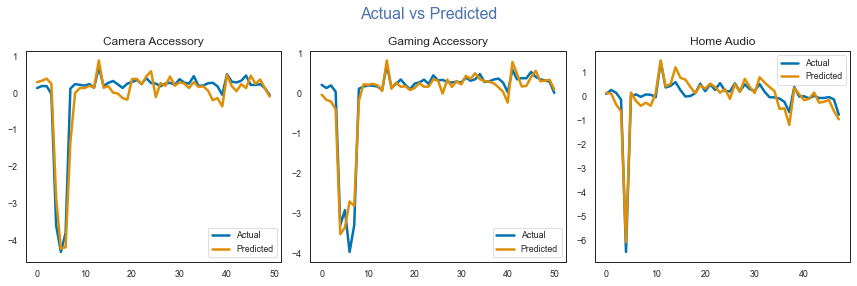

In [961]:
# Selecting colorblind-friendly color palette
colors = sns.color_palette("colorblind")

# Define a function for plotting actual vs. predicted
def plot_actual_vs_predicted(y_actual, y_predicted, title):
    plt.plot(y_actual, color=colors[0], linewidth=2.5, linestyle="-", label="Actual")
    plt.plot(y_predicted, color=colors[1], linewidth=2.5, linestyle="-", label="Predicted")
    plt.title(title, fontsize=12)
    plt.legend()

# # Set the style and context
plt.figure(figsize=(12, 4))

# Create subplots
plt.subplot(1, 3, 1)
plot_actual_vs_predicted(y_cameraaccessory_multiplicative, cameraaccessory_multiplicative_predictions_cv, 'Camera Accessory')

plt.subplot(1, 3, 2)
plot_actual_vs_predicted(y_gamingaccessory_multiplicative, gamingaccessory_multiplicative_predictions_cv, 'Gaming Accessory')

plt.subplot(1, 3, 3)
plot_actual_vs_predicted(y_homeaudio_multiplicative, homeaudio_multiplicative_predictions_cv, 'Home Audio')

# Add a common super title
plt.suptitle('Actual vs Predicted', fontsize=16, color='b')

# Display the plot
plt.tight_layout()
plt.show()

#### Scatter Plot of Actual vs. Predicted Data

__Similar to the actual vs. predicted plot, this scatter plot provides a visual representation of the relationship between actual and predicted values. It allows for a closer examination of data point distribution.__

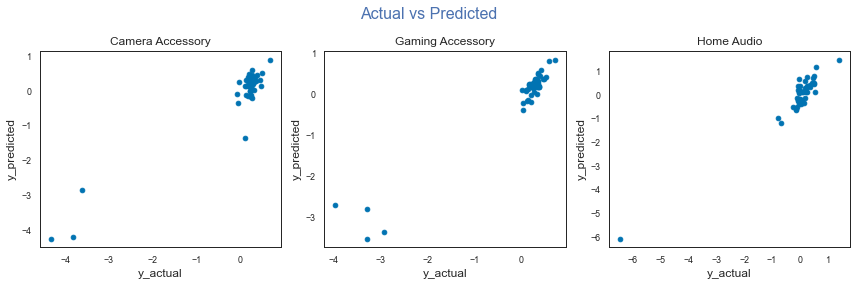

In [962]:
# Define a function for scatter plots
def scatter_actual_vs_predicted(y_actual, y_predicted, title):
    plt.scatter(y_actual, y_predicted)
    plt.title(title, fontsize=12)
    plt.xlabel('y_actual', fontsize=12)
    plt.ylabel('y_predicted', fontsize=12)

# Set up the figure and subplots
plt.figure(figsize=(12, 4))

# Create subplots
plt.subplot(1, 3, 1)
scatter_actual_vs_predicted(y_cameraaccessory_multiplicative, cameraaccessory_multiplicative_predictions_cv, 'Camera Accessory')

plt.subplot(1, 3, 2)
scatter_actual_vs_predicted(y_gamingaccessory_multiplicative, gamingaccessory_multiplicative_predictions_cv, 'Gaming Accessory')

plt.subplot(1, 3, 3)
scatter_actual_vs_predicted(y_homeaudio_multiplicative, homeaudio_multiplicative_predictions_cv, 'Home Audio')

# Add a common super title
plt.suptitle('Actual vs Predicted', fontsize=16, color='b')

# Display the plot
plt.tight_layout()
plt.show()

#### Error Terms Plot

__This plot shows the error terms or residuals, which are the differences between actual and predicted values. It helps assess the distribution of errors, identify patterns, and check for heteroscedasticity or non-constant variance.__

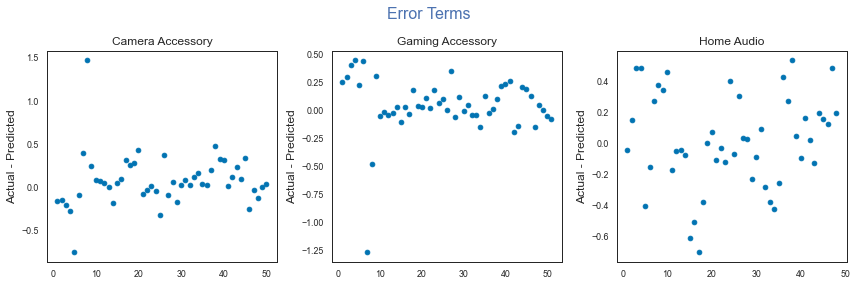

In [963]:
# Define a function for plotting error terms
def plot_error_terms(y_actual, y_predicted, title):
    error_terms = y_actual - y_predicted
    c = [i for i in range(1, len(error_terms) + 1)]
    plt.scatter(c, error_terms)
    plt.title(title, fontsize=12)
    plt.ylabel('Actual - Predicted', fontsize=12)

# Set up the figure and subplots
plt.figure(figsize=(12, 4))

# Create subplots
plt.subplot(1, 3, 1)
plot_error_terms(y_cameraaccessory_multiplicative, cameraaccessory_multiplicative_predictions_cv, 'Camera Accessory')

plt.subplot(1, 3, 2)
plot_error_terms(y_gamingaccessory_multiplicative, gamingaccessory_multiplicative_predictions_cv, 'Gaming Accessory')

plt.subplot(1, 3, 3)
plot_error_terms(y_homeaudio_multiplicative, homeaudio_multiplicative_predictions_cv, 'Home Audio')

# Add a common super title
plt.suptitle('Error Terms', fontsize=16, color='b')

# Display the plot
plt.tight_layout()
plt.show()

#### Histogram of Error Terms

__The error terms' histogram visualizes the distribution of errors in the model. It provides insights into whether the errors are normally distributed, which is an important assumption in many regression models.__

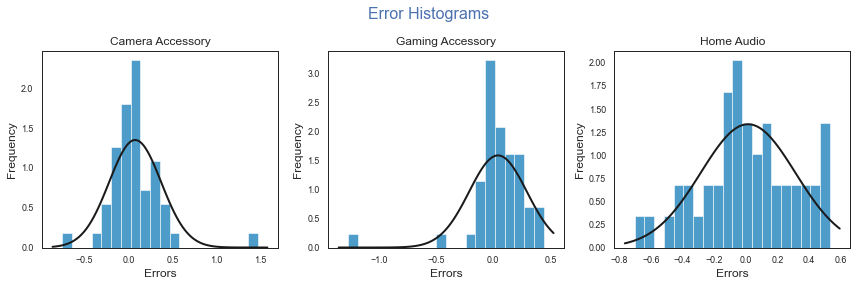

In [964]:
from scipy.stats import norm  # Import the norm function

# Define a function for plotting error histograms with a normal curve
def plot_error_histogram(y_actual, y_predicted, title):
    error_terms = y_actual - y_predicted
    plt.hist(error_terms, bins=20, density=True, color=colors[0], alpha=0.7, label='Error Distribution')
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(error_terms)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    # Plot the normal curve
    plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    
    plt.title(title, fontsize=12)
    plt.xlabel('Errors', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
# Set up the figure and subplots
plt.figure(figsize=(12, 4))

# Create subplots
plt.subplot(1, 3, 1)
plot_error_histogram(y_cameraaccessory_multiplicative, cameraaccessory_multiplicative_predictions_cv, 'Camera Accessory')

plt.subplot(1, 3, 2)
plot_error_histogram(y_gamingaccessory_multiplicative, gamingaccessory_multiplicative_predictions_cv, 'Gaming Accessory')

plt.subplot(1, 3, 3)
plot_error_histogram(y_homeaudio_multiplicative, homeaudio_multiplicative_predictions_cv, 'Home Audio')

# Add a common super title
plt.suptitle('Error Histograms', fontsize=16, color='b')

# Display the plot
plt.tight_layout()
plt.show()

#### Scatter Plot with Regression Line

__This scatter plot includes a fitted regression line that represents the model's predictions. It offers a visual assessment of how well the regression line fits the data points and can reveal any deviations between the model and actual data.__

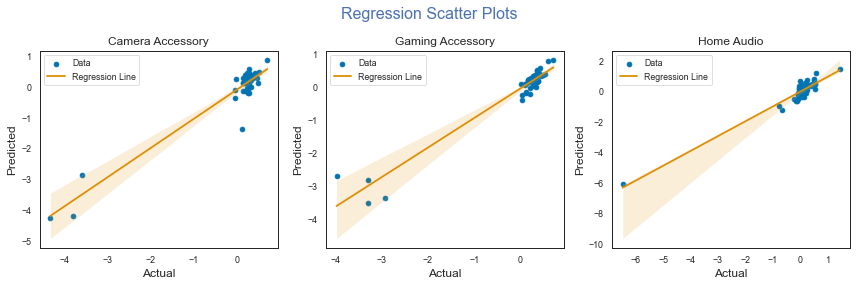

In [965]:
# Define a function for scatter plots with regression lines
def plot_regression_scatter(y_actual, y_predicted, title):
    plt.scatter(y_actual, y_predicted, color=colors[0], label='Data')
    sns.regplot(y_actual, y_predicted, scatter=False, color=colors[1], label='Regression Line')
    plt.title(title, fontsize=12)
    plt.xlabel('Actual', fontsize=12)
    plt.ylabel('Predicted', fontsize=12)
    plt.legend()

# Set up the figure and subplots
plt.figure(figsize=(12, 4))

# Create subplots
plt.subplot(1, 3, 1)
plot_regression_scatter(y_cameraaccessory_multiplicative, cameraaccessory_multiplicative_predictions_cv, 'Camera Accessory')

plt.subplot(1, 3, 2)
plot_regression_scatter(y_gamingaccessory_multiplicative, gamingaccessory_multiplicative_predictions_cv, 'Gaming Accessory')

plt.subplot(1, 3, 3)
plot_regression_scatter(y_homeaudio_multiplicative, homeaudio_multiplicative_predictions_cv, 'Home Audio')

# Add a common super title
plt.suptitle('Regression Scatter Plots', fontsize=16, color='b')

# Display the plot
plt.tight_layout()
plt.show()

## <span style="color:brown">Regression Equations for Predictions</span></strong>

__The below regression equations will be used to make predictions for revenue (gmv) based on the values of independent variables.__

<font color="blue">__Equation for Camera Accessory__</font>

Revenue = 0.0 + (0.174 * product_vertical_camerabattery) + (0.17 * product_vertical_lens) + (0.117 * product_vertical_camerabatterycharger) + (0.112 * mass_market) + (0.099 * product_vertical_cameraremotecontrol)

<font color="blue">__Equation for Gaming Accessory__</font>

Revenue = 0.0 + (0.294 * product_vertical_gamingheadset) + (0.24 * product_vertical_gamepad) + (0.238 * product_vertical_gamingmouse) + (0.196 * mass_market) + (0.164 * Online marketing_SMA_3)

<font color="blue">__Equation for Home Audio__</font>

Revenue = 0.0 + (0.522 * product_vertical_homeaudiospeaker) + (0.206 * mass_market) + (0.162 * Total Precip (mm)) + (0.151 * product_vertical_fmradio) + (0.149 * Other_Ad_Stock)

## <span style="color:brown">Recommendations Section</span></strong>

__Approach__
- Visualizing the top 5 features that affect each of the 3 product sub-categories based on the coefficients from the chosen models.
- Finally bar plots will be plotted show the importance of these features, both positively and adversely, for each product sub-category.

In [966]:
# Getting the top 5 features that affect positively and negatively in one df

cameraaccessory_multiplicative_lr_coef_df = cameraaccessory_multiplicative_lr_coef_df.head().append(cameraaccessory_multiplicative_lr_coef_df.tail())
gamingaccessory_multiplicative_lr_coef_df = gamingaccessory_multiplicative_lr_coef_df.head().append(gamingaccessory_multiplicative_lr_coef_df.tail())
homeaudio_multiplicative_lr_coef_df = homeaudio_multiplicative_lr_coef_df.head().append(homeaudio_multiplicative_lr_coef_df.tail())

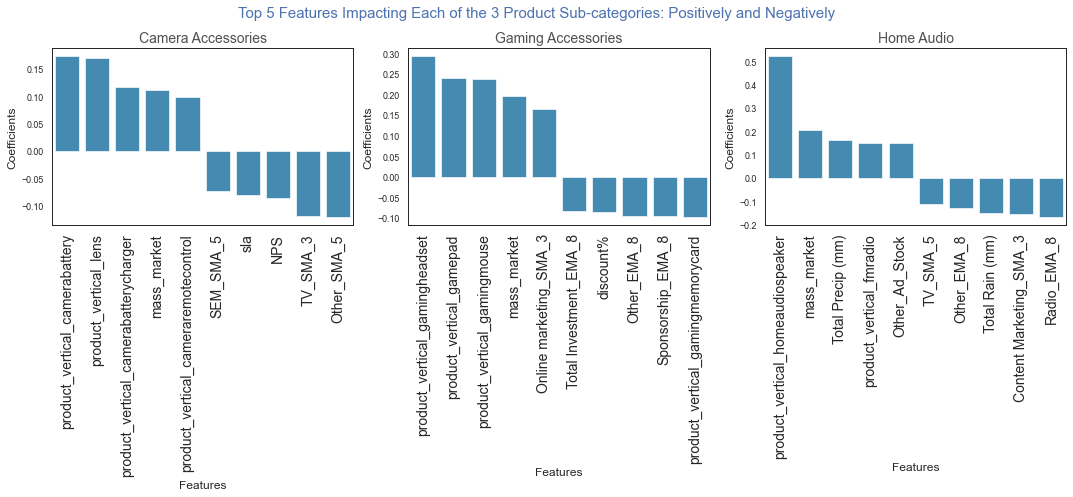

In [967]:
# Define a function for creating subplots
def create_subplots(data_df, title, subplot_title, x_label, y_label, subplot_num):
    plt.subplot(1, 3, subplot_num)
    sns.barplot(x='Features', y='Coefficients', color=colors[0], alpha=0.8, data=data_df, estimator=np.sum)
    plt.title(subplot_title, fontsize=14, alpha=0.8)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation='vertical', fontsize=14)

plt.figure(figsize=(15, 7))

# Create subplots for each product category
create_subplots(cameraaccessory_multiplicative_lr_coef_df, 'Top 5 Features Impacting Camera Accessories', 'Camera Accessories', 'Features', 'Coefficients', 1)
create_subplots(gamingaccessory_multiplicative_lr_coef_df, 'Top 5 Features Impacting Gaming Accessories', 'Gaming Accessories', 'Features', 'Coefficients', 2)
create_subplots(homeaudio_multiplicative_lr_coef_df, 'Top 5 Features Impacting Home Audio', 'Home Audio', 'Features', 'Coefficients', 3)

plt.suptitle('Top 5 Features Impacting Each of the 3 Product Sub-categories: Positively and Negatively', fontsize=15, color='b', alpha=1)

# Display the plot
plt.tight_layout()
plt.show()

### <font color="magenta">__Camera Accessory__: Recommendations</font>

- Focus on promoting and selling camera batteries and lenses, as they have the highest positive impact on revenue.
- Include camera battery chargers and remote controls in your product offerings to capture additional revenue opportunities.
- Target the mass market products with your camera accessory products, as it has a positive influence on revenue.
- Evaluate and optimize your Search Engine Marketing (SEM) strategy to reduce its negative impact on revenue.
- Work on improving your Net Promoter Score (NPS) and optimizing marketing strategies, including television advertising, to counter their negative effects on revenue.

### <font color="magenta">__Gaming Accessory__: Recommendations</font>

- Prioritize the promotion and sales of gaming headsets, gamepads, and gaming mice, as they have the highest positive impact on revenue.
- Target the mass market products with your gaming accessory products, as it has a significant positive influence on revenue.
- Invest in online marketing strategies, particularly those with a 3-day simple moving average (SMA_3), to boost revenue.
- Monitor and optimize your total investment, with an emphasis on an 8-day exponential moving average (EMA_8), to mitigate its negative impact on revenue.
- Pay attention to pricing strategies, such as discounts, to counteract their negative effects on revenue.
- Evaluate and refine sponsorship strategies (Sponsorship_EMA_8) to improve revenue performance.
- Consider revising or phasing out gaming memory card products if they are underperforming in terms of revenue generation.

### <font color="magenta">__Home Audio__: Recommendations</font>

- Focus on promoting and selling home audio speakers, as they have the highest positive impact on revenue.
- Target the mass market with your home audio products, as it significantly contributes to revenue generation.
- Leverage advertising and marketing strategies to enhance revenue, with a particular emphasis on the FM radio product vertical.
- Allocate resources to manage and optimize your ad stock for other products (Other_Ad_Stock) to drive revenue growth.
- Keep an eye on TV advertising with a 5-day simple moving average (SMA_5) to balance its impact on revenue.
- Evaluate and improve your advertising strategies for other products (Other_EMA_8) to mitigate their negative impact on revenue.

### <font color="magenta">Overall Summary of Recommendations based on EDA, etc.</font>

-  __Focus on Mass Market Products:__ Given that the majority of units sold come from the mass market category, Eleckart should continue to prioritize this segment. Camera and Gaming Accessories have been the top-selling subcategories within this segment, so efforts should be made to expand and optimize offerings in these areas.
-  __Product Performance:__ Home audio speakers, lens sales in camera accessories, and gamepads in gaming accessories have performed well. Eleckart should consider expanding and promoting these product categories.
-  __Discount Strategy:__ The data indicates that offering discounts of up to 20% tends to maximize revenue. Eleckart should carefully plan its discount strategies to maintain profitability while attracting customers.
-  __Payment Options:__ While Cash on Delivery (COD) is the most preferred payment method, it's essential to note that the maximum revenue comes from prepaid payment options. Encouraging and incentivizing prepaid payments can help boost revenue.
-  __Advertising and NPS:__ NPS (Net Promoter Score) was highest during weeks 32-35 when discounts were also highest. This suggests that customers respond positively to promotions. Eleckart should align advertising efforts with peak NPS periods to maximize impact.
-  __Ad Investment:__ Analyzing the relationship between total ad investment and revenue is crucial. Week 42, corresponding to Thanksgiving week, saw the highest revenue, but it also had the highest ad spend. Careful budget allocation and ROI analysis can help ensure efficient advertising strategies.
-  __Leverage Luxury Home Audio:__ Luxury Home Audio products have been favored by consumers. Eleckart can further capitalize on this trend by enhancing its luxury product offerings and marketing strategies.
-  __Week 32-35 Analysis:__ During weeks 32-35, both total ad investment and revenue were relatively low. This may suggest that this period experiences lower consumer interest. Eleckart should consider alternative marketing strategies or promotions during these weeks.

---------------------END OF PROJECT--------------------------